# Analysis of Leading Causes of Death

## Table of Contents <br>
#### I.  [Introduction to Mortality Data (NYC and US)](#Introduction_to_Mortality_Data)
&nbsp;&nbsp;&nbsp;   1.     [New York City Data](#New_York_City_Data)
<br>&nbsp;&nbsp;&nbsp;   2.     [US Data](#US_Data)
<br>&nbsp;&nbsp;&nbsp;   3.     [Analysis: Leading Causes of Death](#Analysis:_Leading_Causes_of_Death)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   a.    [Preparation of NYC Dataset](#Preparation_of_NYC_Dataset)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   b.    [Preparation of US Dataset](#Preparation_of_US_Dataset)
<br>&nbsp;&nbsp;&nbsp;   4.    [Population Averages](#Population_Averages)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  a.[NYC Population](#NYC_Population)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  b.[US Population](#US_Population)
<br>&nbsp;&nbsp;&nbsp;   5.     [Visualization of Leading Deaths](#Visualization_of_Leading_Deaths)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   a.    [Preparation of NYC Dataset](#Preparation_of_NYC_Dataset_-_Visualization)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   b.    [Preparation of US Dataset](#Preparation_of_US_Dataset_-_Visualization)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   c.    [Combined Visualization](#Combined_Visualization)
<br>&nbsp;&nbsp;&nbsp;   6.     [Results](#Results)
<br><br><br>

#### II. [Analysis of Heart Disease, Influenza, and Unintentional Injuries](#Analysis_of_Heart_Disease,_Influenza,_and_Accidental_Deaths)
&nbsp;&nbsp;&nbsp;   1.     [Heart Disease](#Heart_Disease)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   a.    [Risk Factors: Smoking](#Risk_Factors:_Smoking)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   b.    [Risk Factors: High Cholesterol](#Risk_Factors:_High_cholesterol)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   c.    [Risk Factors: High Blood Pressure](#Risk_Factors:_High_Blood_Pressure)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   d.    [Conclusion](#Conclusion_Heart_Disease)
<br>&nbsp;&nbsp;&nbsp;   2.     [Influenza and Pneumonia](#Influenza_and_Pneumonia)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   a.    [Population Density Regression Testing](#Population_Density_Regression_Testing)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   i.    [Population Density Regression Test](#PD_Regression_Test)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   ii.    [Visualization](#PD_Visualization)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   iii.    [Conclusion](#Conclusion_PD)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   b.    [Urgent Center Units per Capita Regression Testing](#uc_per_cap_reg)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   c.    [Hospitals per Capita Regression Testing](#hos_per_cap_reg)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   d.    [Relationship Between Influenza Analysis and COVID-19 Impact](#influ_covid)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   i.    [Visualization](#flu_covid_vis)
<br>&nbsp;&nbsp;&nbsp;   3.     [Unintentional Injuries](#Unintentional_Injuries)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   a.    [US Death Rate for Accidental Deaths](#AD_US)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   b.    [Breakdown of Unintentional Injury Mechanisms](#breakdown_unint)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [All Mechanisms](#all_mech)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [By Age Group](#age_group)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Drowning](#drowning)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Firearms](#firearms)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Cut/Pierce](#cp)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Fire/Hot Object or Substance](#fire)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Motor Vehicle Traffic](#m)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [All Other Transport](#o)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Poisoning](#p)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [Suffocation](#s)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   c.    [Comparison of Each Mechanism](#comparison_mechanisms)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   d.    [Regression](#regression_ui)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   e.    [NYC Unintentional Injuries](#nycui)
<br>&nbsp;&nbsp;&nbsp;   4.     [Conclusions on Death Rate Disparities between New York City and National Averages](#conclusion_deathrate)
<br><br><br>

#### III. [Effect of Race and Gender on Death Rates](#race_gender)
&nbsp;&nbsp;&nbsp;   1.     [NYC Visualization of Death by Gender](#nyc_vis_gen)
<br>&nbsp;&nbsp;&nbsp;   2.     [NYC Race Demographics](#nyc_race_dem)
<br>&nbsp;&nbsp;&nbsp;   3.     [NYC Visualization by Race Ethnicity](#nyc_vis_race)
<br>&nbsp;&nbsp;&nbsp;   4.     [US vs NYC Death to Population Ratio Comparison](#nusnyc_death_pop)
<br>&nbsp;&nbsp;&nbsp;   5.     [US Demographics Dataset](#us_dem)
<br><br><br>

#### IV. [Conclusion](#final_con)

Around 3 million Americans die each year, which means that the death rate is about 860 deaths per 100,000 people. The goal of our project is to take a closer look at the causal factors for these deaths across the US and analyze this data to see what factors pose a higher risk. Additionally, we explore these factors in the smaller region of New York City and compare it with the nationwide results.
https://www.cdc.gov/nchs/fastats/deaths.htm 

# <a name="Introduction_to_Mortality_Data"></a>*I. Introduction to Mortality Data*


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sb
import copy
from IPython.display import display
import plotly.graph_objects as go

%matplotlib inline

#### Data Sources
NYC mortality source: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

US mortality source: https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013

First, we need to read and clean the csv files by changing datatypes, correcting spelling, and checking for repetitions or unique characteristics. Here, we are going through our NYC and US datasets.

## <a name="New_York_City_Data"></a>New York City Data

In [2]:
nyc = pd.read_csv("nyc.csv")
nyc = nyc.replace(".",0)
nyc = nyc.astype({'Deaths': 'float64', 'Death Rate': 'float64', "Age Adjusted Death Rate":"float64"})
nyc

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,228.0,18.7,23.1
1,2008,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,68.0,5.8,6.6
2,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,271.0,20.1,17.9
3,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,140.0,12.3,21.4
4,2009,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,255.0,30.0,30.0
...,...,...,...,...,...,...,...
1089,2012,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,6.0,0.0,0.0
1090,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169.0,11.9,7.4
1091,2009,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3236.0,240.5,205.6
1092,2009,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,White Non-Hispanic,191.0,14.2,13.0


In [3]:
nyc.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

In [4]:
#misspelled "poisoning"
nyc["Leading Cause"] = nyc["Leading Cause"].replace("Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)","Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)")

In [5]:
print(nyc["Race Ethnicity"].unique())
print(nyc['Sex'].unique())
print(nyc['Year'].unique())

['Hispanic' 'White Non-Hispanic' 'Black Non-Hispanic'
 'Other Race/ Ethnicity' 'Asian and Pacific Islander' 'Not Stated/Unknown']
['F' 'M']
[2010 2008 2013 2009 2012 2011 2014 2007]


## <a name="US_Data"></a>US Data

In [6]:
us = pd.read_csv('agg.csv')
us

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,"1,035",16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [7]:
us.dtypes

Year                        int64
113 Cause Name             object
Cause Name                 object
State                      object
Deaths                     object
Age-adjusted Death Rate    object
dtype: object

In [8]:
us['State'].nunique()

52

In [9]:
us["State"].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

All 50 states are included in the dataset, additionally the District of Columbia is included along with the total for the United States, thus making the number of unique "States" equal to 52.

## <a name="Analysis:_Leading_Causes_of_Death"></a>Analysis: Leading Causes of Death

First, an overview of the most common causes of death in New York City versus the rest of the US. 

## <a name="Preparation_of_NYC_Dataset"></a>Preparation of NYC Dataset

2010 Census Data Source: https://www.census.gov/programs-surveys/popest/data/data-sets.All.html


In [10]:
#change names of NYC causes to match US data
#drop the rows that are not mutual

#replace the technical cause names in the NYC dataset with the common names in the US dataset
nyc.replace({'Influenza (Flu) and Pneumonia (J09-J18)':'Influenza and pneumonia',
             'Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)':'Unintentional injuries',
             'Alzheimer\'s Disease (G30)':'Alzheimer\'s disease',
             'Cerebrovascular Disease (Stroke: I60-I69)':'Stroke',
             'Chronic Liver Disease and Cirrhosis (K70, K73)':'CLRD',
             'Diabetes Mellitus (E10-E14)':'Diabetes',
             'Diseases of Heart (I00-I09, I11, I13, I20-I51)':'Heart disease',
             'Influenza (Flu) and Pneumonia (J09-J18)':'Influenza and pneumonia',
             'Intentional Self-Harm (Suicide: X60-X84, Y87.0)':'Suicide',
             'Malignant Neoplasms (Cancer: C00-C97)':'Cancer',
             'Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)':'Kidney disease'},
            inplace = True)
leading_causes = "Influenza and pneumonia|Unintentional injuries|Alzheimer\'s disease|Stroke|CLRD|Diabetes|Heart disease|Influenza and pneumonia|Suicide|Cancer|Kidney disease"

#drop non mutual rows
not_using = nyc[~nyc["Leading Cause"].str.contains(leading_causes, regex=True)].index
nyc.drop(not_using, inplace=True)
nyc

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza and pneumonia,F,Hispanic,228.0,18.7,23.1
1,2008,Unintentional injuries,F,Hispanic,68.0,5.8,6.6
2,2013,Unintentional injuries,M,White Non-Hispanic,271.0,20.1,17.9
3,2010,Stroke,M,Hispanic,140.0,12.3,21.4
6,2012,Stroke,F,Asian and Pacific Islander,102.0,17.5,20.7
...,...,...,...,...,...,...,...
1088,2008,CLRD,F,Other Race/ Ethnicity,0.0,0.0,0.0
1089,2012,Influenza and pneumonia,F,Not Stated/Unknown,6.0,0.0,0.0
1090,2014,Unintentional injuries,F,White Non-Hispanic,169.0,11.9,7.4
1091,2009,Cancer,M,White Non-Hispanic,3236.0,240.5,205.6


## <a name="Preparation_of_US_Dataset"></a>Preparation of US Dataset

Our target time frame are the years 2008-2014. These years overlap in our data sets, so we will be using them to conduct our analysis to ensure accurate data.

In [11]:
print("nyc sets years: ",nyc["Year"].unique())
print("us sets years: ", us["Year"].unique())

nyc sets years:  [2010 2008 2013 2012 2009 2011 2014 2007]
us sets years:  [2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004
 2003 2002 2001 2000 1999]


In [12]:
#get matching years from US data
#remove 113 cause name
us = us.loc[us["Year"] > 2007]
us = us.loc[us["Year"] < 2015]
del us["113 Cause Name"]
us

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1716,2014,Unintentional injuries,Alabama,"2,463",49.3
1717,2014,Unintentional injuries,Alaska,379,55.0
1718,2014,Unintentional injuries,Arizona,"3,322",47.0
1719,2014,Unintentional injuries,Arkansas,"1,458",47.4
1720,2014,Unintentional injuries,California,"11,804",29.2
...,...,...,...,...,...
5715,2008,Kidney disease,Virginia,"1,537",20.5
5716,2008,Kidney disease,Washington,471,7.1
5717,2008,Kidney disease,West Virginia,522,23.0
5718,2008,Kidney disease,Wisconsin,"1,007",15.5


## <a name="Population_Averages"></a>Population Averages 

First we need the average population of New York City between the years 2008-2014. We have to use two datasets from the US Census website.
Sources: https://www.census.gov/programs-surveys/popest/data/tables.html

### <a name="NYC_Population"></a> NYC population

Because our dataset is split between 2 decades, with 2008 and 2009 occurring during 2000-2010, and 2010-2014 occurring during 2010-2020, we need to merge this data to form our own dataframe for our analysis.

In [13]:
#2008-2010 nyc population sum
nyc_pop_00_10 = pd.read_csv("nyc_and_state_pop_00_10.csv", encoding='latin-1')
idx = nyc_pop_00_10.loc[nyc_pop_00_10["NAME"] == "New York city"].index[0]
nyc_avg_population = nyc_pop_00_10["POPESTIMATE2008"][idx] + nyc_pop_00_10["POPESTIMATE2009"][idx] + nyc_pop_00_10["CENSUS2010POP"][idx]

In [14]:
#2011 - 2014 population sum
nyc_pop_10_18 = pd.read_csv("nyc_and_city_pop_10_18.csv")
avg = int(nyc_pop_10_18["respop72011"][1]) + int(nyc_pop_10_18["respop72012"][1]) + int(nyc_pop_10_18["respop72013"][1]) + int(nyc_pop_10_18["respop72014"][1])
nyc_avg_population += avg
nyc_avg_population = round(nyc_avg_population/7)

#avg population 2008-2014
print("Average NYC population in the year 2008-2014: ", nyc_avg_population)
nyc_pop_10_18.head()

Average NYC population in the year 2008-2014:  8261718.0


,GEO.id,GEO.id2,GEO.display-label,GC_RANK.target-geo-id,GC_RANK.target-geo-id2,GC_RANK.rank-label,GC_RANK.display-label,GC_RANK.display-label.1,rescensus42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
0,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Rank,Geography,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - New York city, New York","New York city, New York",8175133,8174988,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748
2,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles city, California","Los Angeles city, California",3792621,3792820,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456
3,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598,2695624,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994
4,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston city, Texas","Houston city, Texas",2099451,2093615,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502


### <a name="US_Population"></a>US Population

In [15]:
#2008 - 2010 national population sum
us_pop_00_10 = pd.read_csv("us_pop_00_10.csv")

#Census norm is to use month of July
us_pop_00_10 = us_pop_00_10.loc[us_pop_00_10["MONTH"] == 6]
us_pop_00_10 = us_pop_00_10.iloc[-2:]
national_avg_population = us_pop_00_10["TOT_POP"][98] + us_pop_00_10["TOT_POP"][110]
us_pop_00_10


,YEAR,MONTH,TOT_POP
98,2008,6,303847001
110,2009,6,306541114


In [16]:
#2010 - 2014 national population sum
us_pop_10_19 = pd.read_csv("us_and_state_pop_10_19.csv")
us_pop_10_19.drop([1,2,3,4,13,56],inplace=True)
add = us_pop_10_19["CENSUS2010POP"][0] + us_pop_10_19["POPESTIMATE2011"][0] + us_pop_10_19["POPESTIMATE2012"][0] + us_pop_10_19["POPESTIMATE2013"][0] + us_pop_10_19["POPESTIMATE2014"][0]
national_avg_population += add
national_avg_population = round(national_avg_population/7)

print("Average national population in the year 2008-2014: ", national_avg_population)
us_pop_10_19.head()

Average national population in the year 2008-2014:  311259463.0


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
5,40,3,6,1,Alabama,4779736,4780125,4785437,4799069,4815588,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
6,40,4,9,2,Alaska,710231,710249,713910,722128,730443,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
7,40,4,8,4,Arizona,6392017,6392288,6407172,6472643,6554978,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
8,40,3,7,5,Arkansas,2915918,2916031,2921964,2940667,2952164,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429


## <a name="Visualization_of_Leading_Deaths"></a>Visualization of Leading Deaths

### <a name="Preparation_of_NYC_Dataset_-_Visualization"></a>Preparation of NYC Dataset

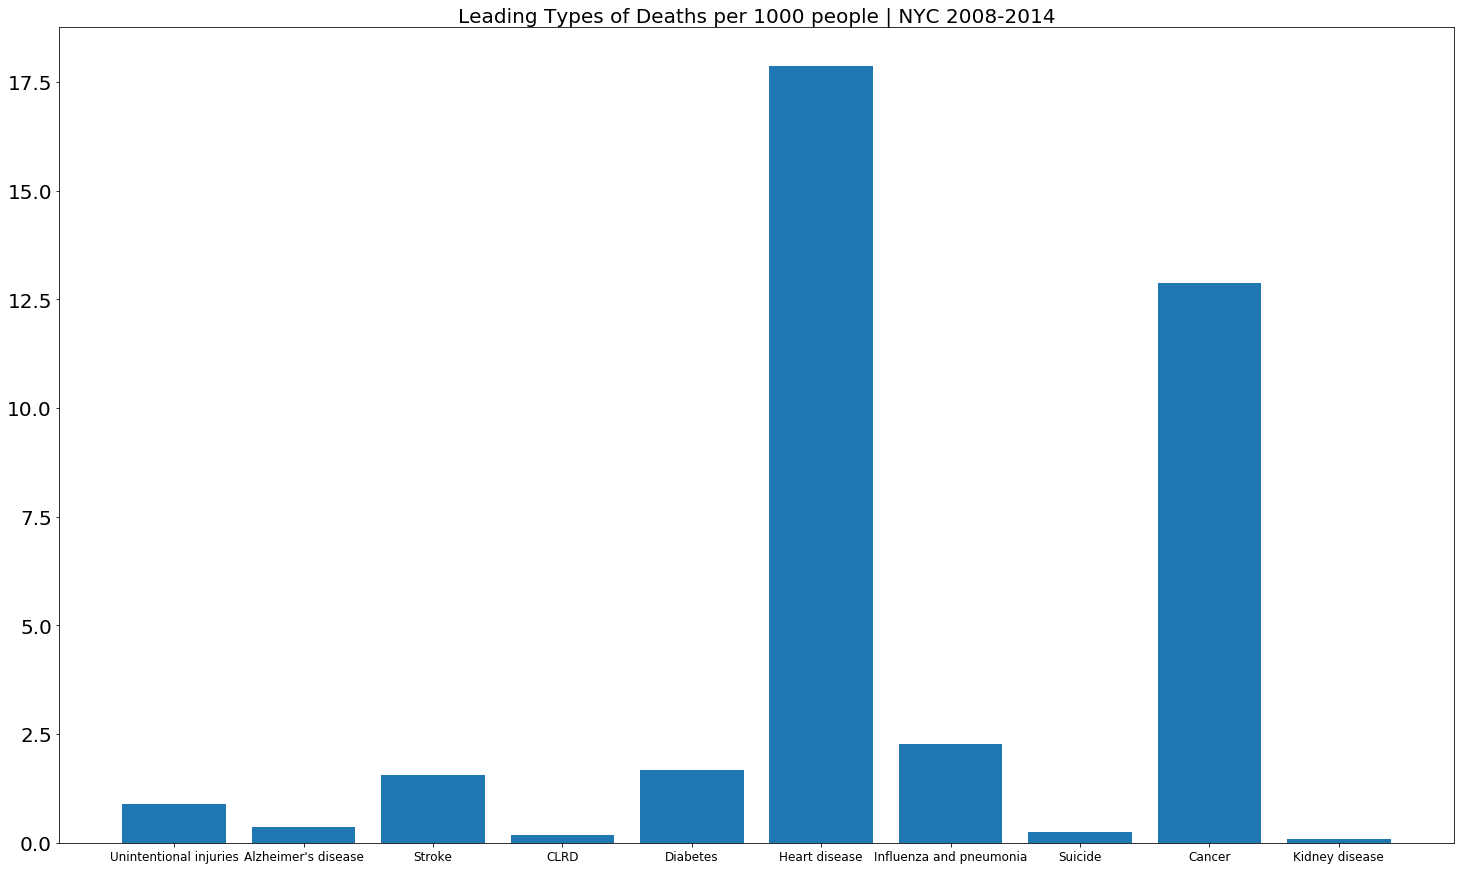

In [17]:
#Get per 1000 quotient
nyc_per_1000_quotient = nyc_avg_population / 1000

#use us data to make dict so we can combine later
nyc_causes = dict(zip(us["Cause Name"],[0]*len(nyc)))
del nyc_causes["All causes"]

#put leading causes in dict
for index, row in nyc.iterrows():
    nyc_causes[(nyc["Leading Cause"][index])] += nyc["Deaths"][index]

#dividing to get per 1000 ratio
for key in nyc_causes.keys():
    nyc_causes[key] = nyc_causes[key]/nyc_per_1000_quotient

#plot
figure, ax = plt.subplots(figsize=(25,15))
mpl.pyplot.bar(x=nyc_causes.keys(),height=nyc_causes.values())
ax.set_title("Leading Types of Deaths per 1000 people | NYC 2008-2014", size = 20)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=12)

### <a name="Preparation_of_US_Dataset_-_Visualization"></a>Preparation of US Dataset

In [18]:
#get rid of comma in us data
us["Deaths"] = us["Deaths"].str.replace(",","").astype(float)

#create quotient for per 1000 use. subtract nyc population
us_pop_minus_nyc = national_avg_population - nyc_avg_population
us_per_1000_quotient = us_pop_minus_nyc/1000

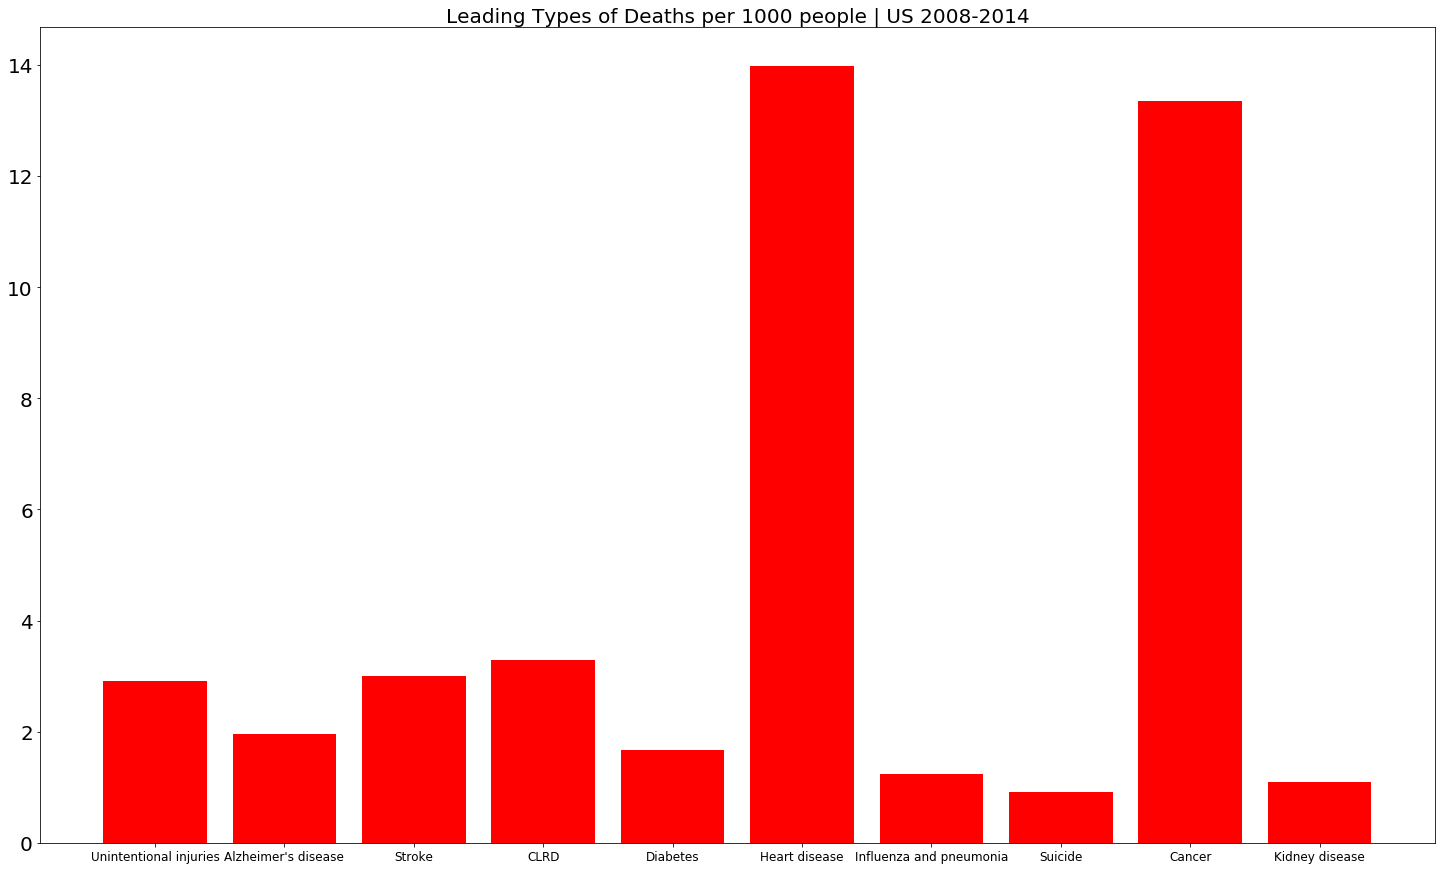

In [19]:
#create dict of causes
us_causes = dict(zip(us["Cause Name"],[0]*len(us)))
del us_causes["All causes"]

#add data to dict
for index, row in us.iterrows():
    if (us["Cause Name"][index]) == "All causes" or (us["State"][index] == "United States"):
        continue
    us_causes[(us["Cause Name"][index])] += us["Deaths"][index]

#create per 1000 ratio
for key in us_causes.keys():
    us_causes[key] = us_causes[key]/ us_per_1000_quotient

#plot
figure, ax = plt.subplots(figsize=(25,15))
mpl.pyplot.bar(x=us_causes.keys(),height=us_causes.values(),color="r")
ax.set_title("Leading Types of Deaths per 1000 people | US 2008-2014", size = 20)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=12)

### <a name="Combined_Visualization"></a> Combined Visualization

We have successfully created our own dataframe for our time range for both NYC and the US, now to visually compare the two, we will plot them on the same graph.

Text(0.5, 1.0, 'Leading Causes of Death per 1000 Indivudals | NYC vs National Avg.')

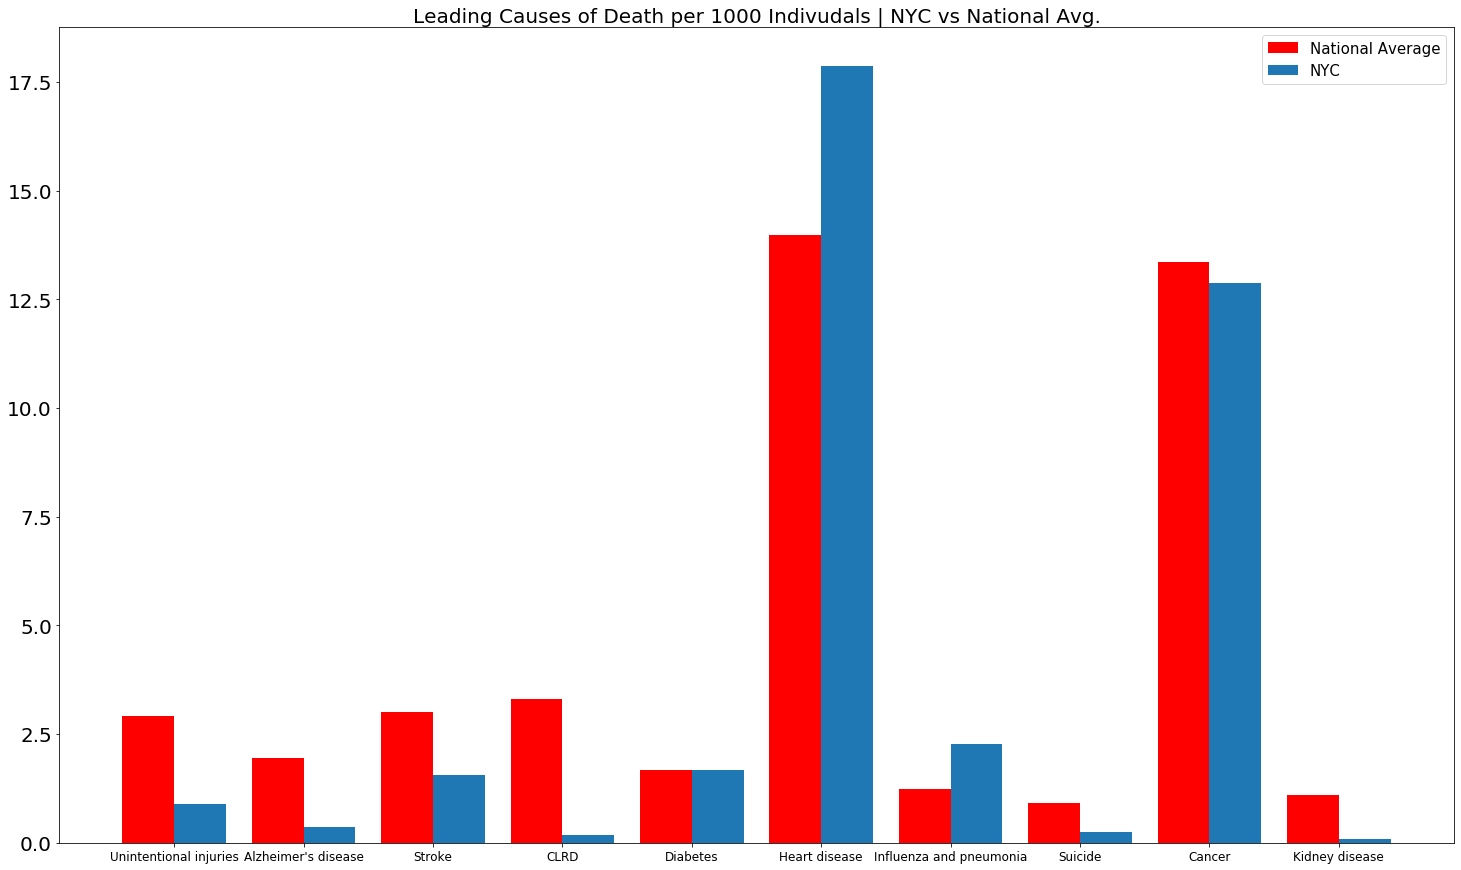

In [20]:
#plot on same figure
figure, ax = plt.subplots(figsize=(25,15))
N = 10
width = .4
ind = np.arange(N)  
p1 = mpl.pyplot.bar(ind,us_causes.values(),width, color = 'r')
p2 = mpl.pyplot.bar(ind+width,nyc_causes.values(), width)
ax.legend((p1, p2), ('National Average', 'NYC'),fontsize=15)
labels = tuple(us_causes.keys())
ax.set_xticklabels((labels[0],labels[1],labels[2],labels[3], labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]))
ax.set_xticks(ind + width / 2)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_title("Leading Causes of Death per 1000 Indivudals | NYC vs National Avg.", size = 20)

## <a name="Results"></a>Results

In [21]:
print("------------------------------------\n")
print('NYC Heart Disease Deaths per 1000 people: ', nyc_causes["Heart disease"], "\n")
print('US Heart Disease Deaths per 1000 people: ', us_causes["Heart disease"], "\n")
print("------------------------------------\n")
print('NYC Influenza and Pneumonia Deaths per 1000 people: ', nyc_causes["Influenza and pneumonia"], "\n")
print('US Influenza and pneumonia Deaths per 1000 people: ', us_causes["Influenza and pneumonia"], "\n")
print("------------------------------------\n")
print('NYC Accidental Deaths per 1000 people: ', nyc_causes["Unintentional injuries"], "\n")
print('US Accidental Deaths per 1000 people: ', us_causes["Unintentional injuries"], "\n")
print("------------------------------------\n")

------------------------------------

NYC Heart Disease Deaths per 1000 people:  17.85960256692373 

US Heart Disease Deaths per 1000 people:  13.979216247962505 

------------------------------------

NYC Influenza and Pneumonia Deaths per 1000 people:  2.2607888577170026 

US Influenza and pneumonia Deaths per 1000 people:  1.243378890493063 

------------------------------------

NYC Accidental Deaths per 1000 people:  0.903807174246325 

US Accidental Deaths per 1000 people:  2.909252674471224 

------------------------------------



From our results, we see that the leading causes of deaths are comparable across the board, however there are 3 areas we would like to emphasize: heart disease, influenza, and unintentional injuries. 

According to the data, New Yorkers are more likely to die from these first two causes than the rest of the country, and less likely to die from unintentional injuries. Heart disease has a significant increase in New York, the influenza/pneumonia death rate for NYC is almost double the rest of the country, and the rate at which New Yorkers die of unintentional injuries is less than half the national average. 

Concluding this section of our analysis, we will further examine these three specific causes of death.

# <a name="Analysis_of_Heart_Disease,_Influenza,_and_Accidental_Deaths"></a>*II. Analysis of Heart Disease, Influenza & Pneumonia, and Unintentional Injuries*

## <a name="Heart_Disease"></a>1. Heart Disease

Pre-existing health conditions, genetics, lifestyle, etc. are all reasons why an individual may develop heart disease. However, according to the CDC there are 3 primary risk factors for Heart Disease: 1) smoking 2) high cholesterol 3) high blood pressure. 

###### <a name="Risk_Factors:_Smoking"></a> a. Risk Factors: Smoking

Sources:

https://www.cdc.gov/heartdisease/risk_factors.htm

https://www1.nyc.gov/assets/doh/downloads/pdf/data/macroscope-smoking-factsheet.pdf

https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm

According to the CDC, 13.7% of all adult americans smoke cigarettes. The New York City local government reports that 15.2% of adults in New York smoke cigarettes. While slightly above the national average, this would not explain the large jump in deaths from heart disease.

###### <a name="Risk_Factors:_High_cholesterol"></a> b) Risk Factors: High cholesterol

Sources: https://www.health.ny.gov/statistics/brfss/reports/docs/1510_brfss_high_cholesterol.pdf

According to the CDC and measure in 2011 and 2013 (relevant dates to our data sets), the difference between the number of individuals with high cholesterol nationwide and in New York City holds no significant difference. Nationwide, 38.4% of adults sampled had high cholesterol, and in New York City this number was 38.1%. So this clearly does not explain the jump in our data.

###### <a name="Risk_Factors:_High_Blood_Pressure"></a> c) Risk Factors: High Blood Pressure

Sources: https://www.health.ny.gov/statistics/brfss/reports/docs/1507_brfss_high_blood_pressure.pdf

According to the CDC, high blood pressure is not more prevelant in New York City when compared to the rest of the country. What this means, is that the 3 primary risk factors do not explain our jump in deaths attributed to heart disease. 

#### <a name="Conclusion_Heart_Disease"></a>Conclusion

Given this information about all three primary risk factors for heart disease, this leaves us with two possibilities:

1) the difference in death rates between the years 2008-2014 is simply statistical variance and is not significant.

2) The causal factor that pushed the heart disease death rate up is unknown. While, there may or may not be other signifcant causal risk factors in New York that have produced the effect we see in the data, we see it more worthwhile to pursuit the other trends in the data, and leave this open ended to our audience.

Why might New Yorkers be at more risk to heart disease, given the primary risk factors are all at or below the national average? Our intuition would say this is simply variance in the data, however there maybe something there to investigate further.For now, we will turn out analysis into another trend seen in the data: Influenza.

## <a name="Influenza_and_Pneumonia"></a> 2. Influenza and Pneumonia

Based on our previous analysis, New York City's death rate for Influenza and Pneumonia was more than double the national average in the given time frame. This information is telling of the troubles to come in the age of COVID-19. We would like to explore why NYC may have a higher death rate of influenza and pneumonia, in hopes that it may shed some light on the current pandemic.

### <a name="Population_Density_Regression_Testing"></a> a. Testing Population Density Regression

First we want to examine population density and its role in the mortality rate of influenza. We will use the states to perform the test, however we will include New York City as an individual state as well. The goal of this test is to identify whether or not population density has an effect on the death rate of influenza, so it is ok to widen our scope statewide. Due to limited data, we will limit the breadth of the test to the 2010 census data.

#### Prepare and merge data into one dataframe

##### Get NYC death rate

In [22]:
# scatter plot 
# x = state population density 
# y = deaths per 1000 people from flu
nyc_per_1000_quotient
nat_popd = us.copy(deep=True)
nyc_popd = nyc.copy(deep=True)

nyc_popd = nyc_popd.loc[nyc_popd["Leading Cause"] == "Influenza and pneumonia"]
nyc_death_rate = nyc_popd['Deaths'].sum()/nyc_per_1000_quotient
print("Death rate of Influenza in NYC: ", nyc_death_rate)
nyc_popd


Death rate of Influenza in NYC:  2.2607888577170026


,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza and pneumonia,F,Hispanic,228.0,18.7,23.1
21,2009,Influenza and pneumonia,M,Hispanic,183.0,16.3,30.9
42,2009,Influenza and pneumonia,F,Black Non-Hispanic,281.0,26.8,24.5
71,2009,Influenza and pneumonia,M,White Non-Hispanic,555.0,41.3,34.3
83,2007,Influenza and pneumonia,F,Black Non-Hispanic,295.0,28.0,26.9
...,...,...,...,...,...,...,...
984,2012,Influenza and pneumonia,F,Black Non-Hispanic,295.0,28.2,24.1
987,2007,Influenza and pneumonia,M,Asian and Pacific Islander,66.0,13.6,25.7
1011,2010,Influenza and pneumonia,M,Asian and Pacific Islander,108.0,20.7,31.7
1031,2012,Influenza and pneumonia,F,Hispanic,209.0,16.9,19.6


#### Prepare and merge state death/population data to our nationwide dataset

In [23]:
#drop DOC and UNITED STATES rows
us_per_1000_quotient
nat_popd = nat_popd.loc[nat_popd["Cause Name"] == "Influenza and pneumonia"]
not_states = nat_popd.loc[nat_popd["State"] == "District of Columbia"].index
not_states = not_states.union(nat_popd.loc[nat_popd["State"] == "United States"].index)
nat_popd = nat_popd.drop(not_states)

#put states and total deaths in a dictionary
state_deaths = {}
for index, row in nat_popd.iterrows():
    try:
        state_deaths[nat_popd["State"][index]] += nat_popd["Deaths"][index]
    except:
        state_deaths[nat_popd["State"][index]] = nat_popd["Deaths"][index]

In [24]:
#Get all the states in a dictionary with total populations from 2008-2010

state_pops_00_10 = pd.read_csv("nyc_and_state_pop_00_10.csv",encoding='latin-1')
state_pops_00_10 = state_pops_00_10.drop(state_pops_00_10.loc[state_pops_00_10["NAME"]=="District of Columbia"].index)
states_population = {}
for index,row in state_pops_00_10.iterrows():
     if state_pops_00_10["NAME"][index] == state_pops_00_10["STNAME"][index]:
            states_population[state_pops_00_10["NAME"][index]] = state_pops_00_10["POPESTIMATE2008"][index] + state_pops_00_10["POPESTIMATE2009"][index] +state_pops_00_10["CENSUS2010POP"][index]
len(states_population.keys())

50

In [25]:
##Get all the states in a dictionary with total populations from 2011-2014
state_pops_10_19 = pd.read_csv("us_and_state_pop_10_19.csv")
state_pops_10_19

#get rid of extras
for index,row in state_pops_10_19.iterrows():
    if state_pops_10_19["NAME"][index] not in states_population.keys():
        state_pops_10_19.drop([index], inplace = True)
           
#add to our dict
for index,row in state_pops_10_19.iterrows():
    states_population[state_pops_10_19["NAME"][index]] += state_pops_10_19["POPESTIMATE2011"][index] + state_pops_10_19["POPESTIMATE2012"][index] + state_pops_10_19["POPESTIMATE2013"][index] + state_pops_10_19["POPESTIMATE2014"][index]

#get avg population
for key in states_population.keys():
    states_population[key] = round(states_population[key]/7)

In [26]:
#get per 1000 death rates for each state. These are avg values for years 2008-2014

for key in state_deaths.keys():
    state_deaths[key] = state_deaths[key] / (states_population[key]/1000)
state_deaths

{'Alabama': 1.4117944627605559,
 'Alaska': 0.5714285714285714,
 'Arizona': 0.8975399973391377,
 'Arkansas': 1.7623788940534817,
 'California': 1.1541322846823119,
 'Colorado': 0.8472529542475589,
 'Connecticut': 1.2461243715942876,
 'Delaware': 1.0634171283990779,
 'Florida': 0.8972745018728858,
 'Georgia': 1.0521908082938978,
 'Hawaii': 1.7899275892929785,
 'Idaho': 0.9389873091378756,
 'Illinois': 1.3215314005219632,
 'Indiana': 1.2105206421180104,
 'Iowa': 1.5400055370985604,
 'Kansas': 1.5751870665616077,
 'Kentucky': 1.532035246901929,
 'Louisiana': 1.3312964585276361,
 'Maine': 1.3325818905808056,
 'Maryland': 1.2101984052766228,
 'Massachusetts': 1.5020294486695955,
 'Michigan': 1.2193424594100062,
 'Minnesota': 0.8794081009181126,
 'Mississippi': 1.5035353762941133,
 'Missouri': 1.5036368581172062,
 'Montana': 1.2143680176343872,
 'Nebraska': 1.2005611318333569,
 'Nevada': 1.3582572063905562,
 'New Hampshire': 1.0893913706586051,
 'New Jersey': 1.0023170918907234,
 'New Mexico'

In [27]:
#fix death rate
#add new york to dataframe
#drop year column, using the averge population year not needed

nat_popd.drop(columns=["Year"],inplace=True)
states = list(state_deaths.keys())

#Change state deaths column to 1000 death rate instead of raw num of deaths
for index,row in nat_popd.iterrows():
    if nat_popd["State"][index] in states:
        nat_popd["Deaths"][index] = state_deaths[nat_popd["State"][index]]
        states.remove(nat_popd["State"][index])
    else:
        nat_popd.drop([index], inplace=True)

#add nyc to dataframe
df_nyc = pd.DataFrame([['Influenza and pneumonia', 'New York City',nyc_causes["Influenza and pneumonia"], np.nan]],columns=["Cause Name", "State", "Deaths", "Age-adjusted Death Rate"])
nat_popd = nat_popd.append(df_nyc)
nat_popd.rename(columns={"Deaths":"Death Rate"},inplace=True)
    
nat_popd

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cause Name,State,Death Rate,Age-adjusted Death Rate
2080,Influenza and pneumonia,Alabama,1.411794,18.8
2081,Influenza and pneumonia,Alaska,0.571429,14.1
2082,Influenza and pneumonia,Arizona,0.897540,10.0
2083,Influenza and pneumonia,Arkansas,1.762379,20.7
2084,Influenza and pneumonia,California,1.154132,14.7
2085,Influenza and pneumonia,Colorado,0.847253,13.3
2086,Influenza and pneumonia,Connecticut,1.246124,13.3
2087,Influenza and pneumonia,Delaware,1.063417,13.8
2089,Influenza and pneumonia,Florida,0.897275,9.6
2090,Influenza and pneumonia,Georgia,1.052191,16.2


#### Load in and merge population density data.

Because population density data is difficult to find and aggregate, we will be using the data from the 2010 census. 

In [28]:
#DENSITY EXPRESSED AS PEOPLE PER SQUARE MILE.
pop_density = pd.read_csv("pop_density.csv")
cols = list(pop_density.columns)

#rename our messed up column names
for k in range(len(cols)):
    pop_density.rename(columns = {cols[k]:pop_density[cols[k]][2]}, inplace=True)

#drop descriptive / DOC and United States  rows
pop_density.drop([0,1,2,3,12,55],inplace=True)

#get rid of commas in values
pop_density["2010_DENSITY"] = pop_density["2010_DENSITY"].str.replace(",","").astype(float)

pop_density_dic = {}
for index, row in pop_density.iterrows():
    pop_density_dic[pop_density["STATE_OR_REGION"][index]] = float(pop_density["2010_DENSITY"][index])
    
pop_density_dic

{'Alabama': 94.4,
 'Alaska': 1.2,
 'Arizona': 56.3,
 'Arkansas': 56.0,
 'California': 239.1,
 'Colorado': 48.5,
 'Connecticut': 738.1,
 'Delaware': 460.8,
 'Florida': 350.6,
 'Georgia': 168.4,
 'Hawaii': 211.8,
 'Idaho': 19.0,
 'Illinois': 231.1,
 'Indiana': 181.0,
 'Iowa': 54.5,
 'Kansas': 34.9,
 'Kentucky': 109.9,
 'Louisiana': 104.9,
 'Maine': 43.1,
 'Maryland': 594.8,
 'Massachusetts': 839.4,
 'Michigan': 174.8,
 'Minnesota': 66.6,
 'Mississippi': 63.2,
 'Missouri': 87.1,
 'Montana': 6.8,
 'Nebraska': 23.8,
 'Nevada': 24.6,
 'New Hampshire': 147.0,
 'New Jersey': 1195.5,
 'New Mexico': 17.0,
 'New York': 411.2,
 'North Carolina': 196.1,
 'North Dakota': 9.7,
 'Ohio': 282.3,
 'Oklahoma': 54.7,
 'Oregon': 39.9,
 'Pennsylvania': 283.9,
 'Rhode Island': 1018.1,
 'South Carolina': 153.9,
 'South Dakota': 10.7,
 'Tennessee': 153.9,
 'Texas': 96.3,
 'Utah': 33.6,
 'Vermont': 67.9,
 'Virginia': 202.6,
 'Washington': 101.2,
 'West Virginia': 77.1,
 'Wisconsin': 105.0,
 'Wyoming': 5.8}

In [29]:
#merge our data sets
nat_popd["Pop Density"] = np.nan
for index,row in nat_popd.iterrows():
    if nat_popd["State"][index] == "New York City":
        pass
        nat_popd["Pop Density"][index] = 27011.8 #hard code nyc 2010 pop density into our dataset
    else:
        nat_popd["Pop Density"][index] = pop_density_dic[nat_popd["State"][index]]

nat_popd.columns

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Cause Name', 'State', 'Death Rate', 'Age-adjusted Death Rate',
       'Pop Density'],
      dtype='object')

### <a name="PD_Regression_Test"></a> i. Population Density Regression Test

We will be regressing population density, so our y will be the influenza death rate and x will be the population density.

In [30]:
nat_popd_reg = nat_popd.copy(deep=True)
nat_popd_reg.columns = nat_popd_reg.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
list(nat_popd_reg.columns.values)

['cause_name', 'state', 'death_rate', 'age_adjusted_death_rate', 'pop_density']

In [31]:
reg = smf.ols("death_rate ~ pop_density", data = nat_popd_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     12.48
Date:                Wed, 13 May 2020   Prob (F-statistic):           0.000908
Time:                        20:04:28   Log-Likelihood:                -7.6312
No. Observations:                  51   AIC:                             19.26
Df Residuals:                      49   BIC:                             23.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2345      0.041     30.189      

### <a name="PD_Visualization"></a> ii. Visualization of Population Density Against Influenza Death Rate

(0, 2)

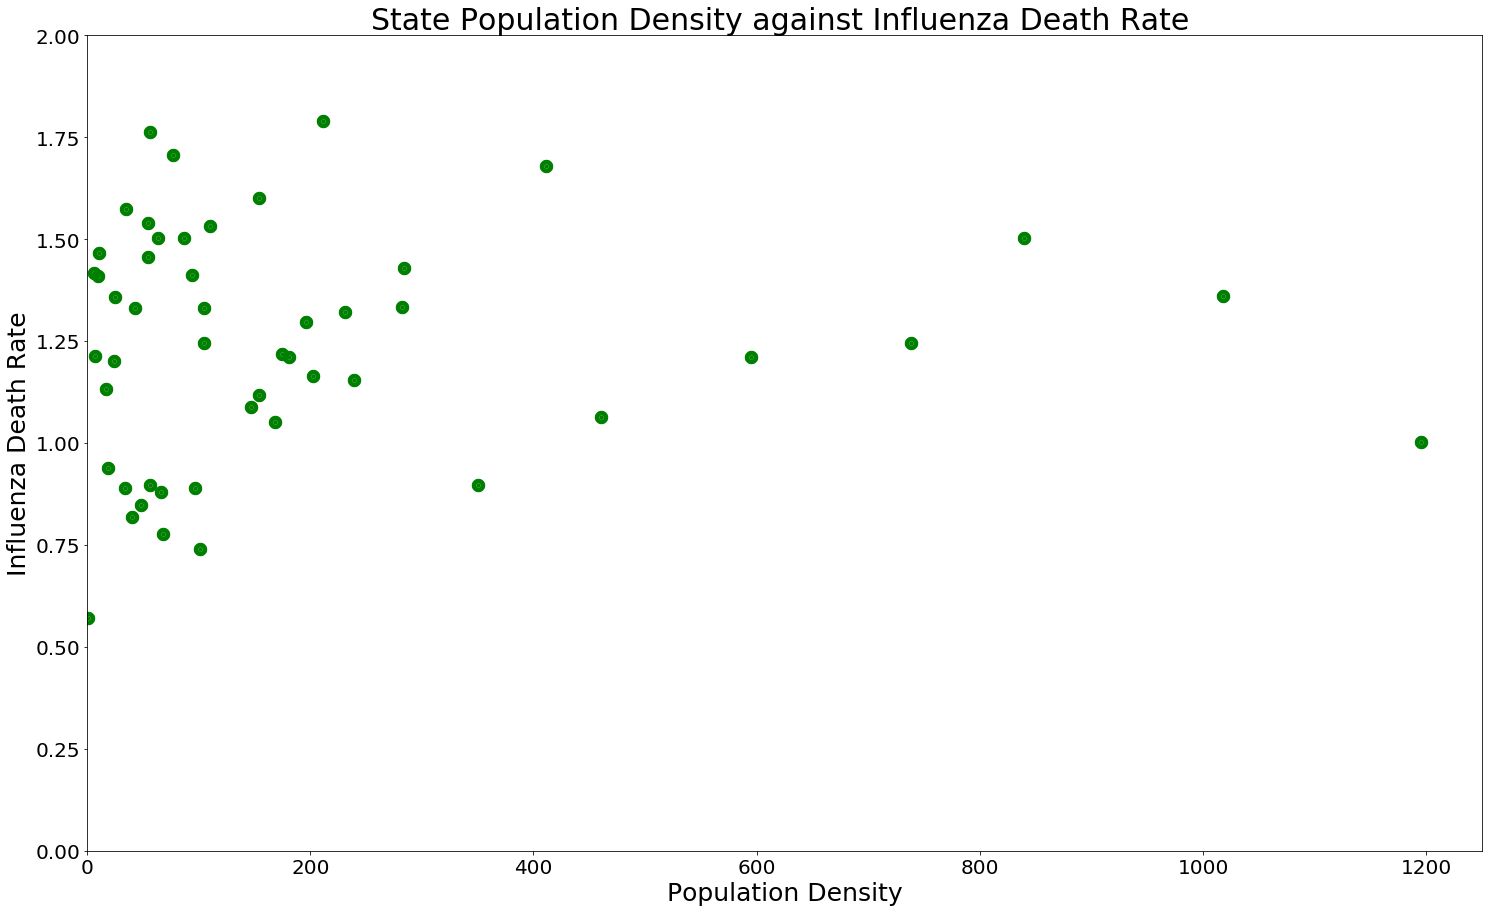

In [32]:
import itertools
import matplotlib
#nat_popd.drop([0],inplace=True)
figure, ax = plt.subplots(figsize=(25,15))
nat_popd.plot.scatter(x="Pop Density", y = "Death Rate",ax=ax,c='g',linewidths=9)
ax.set_title("State Population Density against Influenza Death Rate ",fontsize=30)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Population Density", size = 25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_xlim(0,1250)
ax.set_ylim(0,2)

(0, 2)

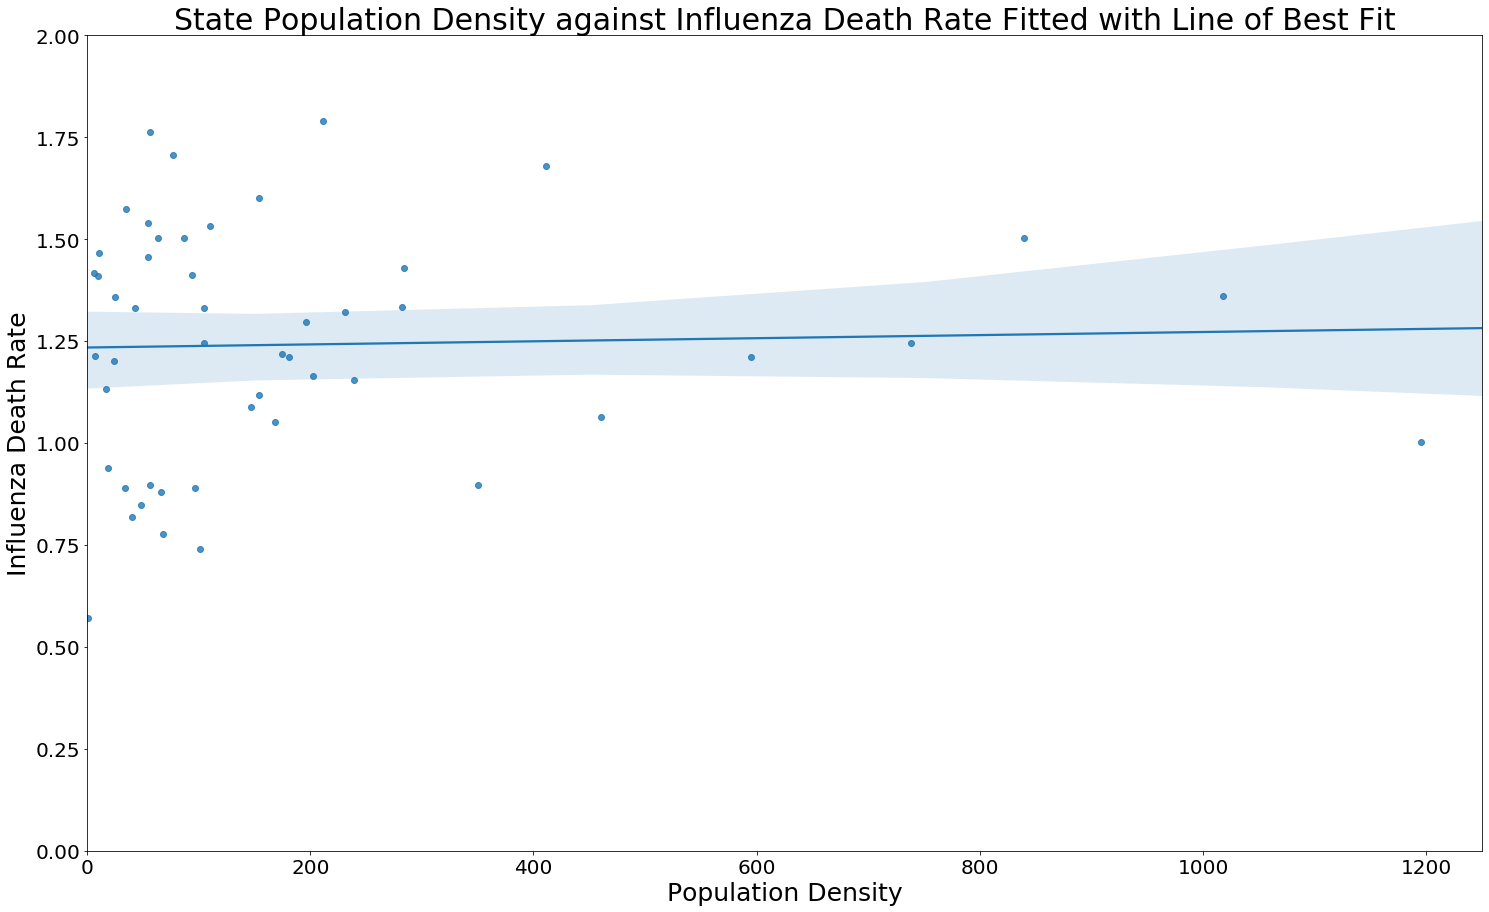

In [33]:
figure, ax = plt.subplots(figsize=(25,15))
ax = sb.regplot(x="Pop Density", y="Death Rate", data=nat_popd)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Population Density", size = 25)
ax.set_title("State Population Density against Influenza Death Rate Fitted with Line of Best Fit",fontsize=30)
ax.set_xlim(0,1250)
ax.set_ylim(0,2)

### <a name="Conclusion_PD"></a> iii. Conclusion

Based on our linear regression test, we can observe from the p-value that our results hold some weight, but do not tel us much. The density of a population does affect the influenza death rate, however, since our R-squared value is relatively low, we know that this may not be a deterministic factor. This is also logical, although a slight trend can be seen in the graphs above, the margin of error is high, and the correlation is very low. At this point, we are convinced that there are potentially other factors that lead to a high infuenza death rate.

From here, we would like to run another regression on the number of hospitals and the death rate of influenza. Once we have completed further analysis on this, we are curious if our results transer to the death rates of COVID-19 as well, as both death rates are viral. 

### <a name="uc_per_cap_reg"></a> b. Urgent Center Units per Capita Regression testing

sources:<br>
https://hifld-geoplatform.opendata.arcgis.com/datasets/urgent-care-facilities <br>
https://nyshealthfoundation.org/wp-content/uploads/2017/11/united-hospital-fund-convenient-care-report.pdf

In [34]:
#dictionary of abbreviations for all 52 regions included in the dataset
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'United States': 'US',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [35]:
urgent_centers = pd.read_csv("Urgent_Care_Facilities.csv")
#load in urgent care units
uc_states = urgent_centers["STATE"].unique()
states = nat_popd["State"].unique()
state_units = []

#get the amount of urgent care units per state
for state in states:
    if state == "New York City":
        continue
    num_units = round(len(urgent_centers.loc[urgent_centers["STATE"] == us_state_abbrev[state]]) / (states_population[state]/100000),2)
    state_units.append(num_units)

#hardcode nyc into df
state_units.append(round(103 / (8261718.0/100000),2)) #number of units in nyc
nat_popd["Urgent Care Units"] = state_units 
nat_popd.head()

,Cause Name,State,Death Rate,Age-adjusted Death Rate,Pop Density,Urgent Care Units
2080,Influenza and pneumonia,Alabama,1.411794,18.8,94.4,2.02
2081,Influenza and pneumonia,Alaska,0.571429,14.1,1.2,2.37
2082,Influenza and pneumonia,Arizona,0.897540,10.0,56.3,2.00
2083,Influenza and pneumonia,Arkansas,1.762379,20.7,56.0,1.19
2084,Influenza and pneumonia,California,1.154132,14.7,239.1,1.42


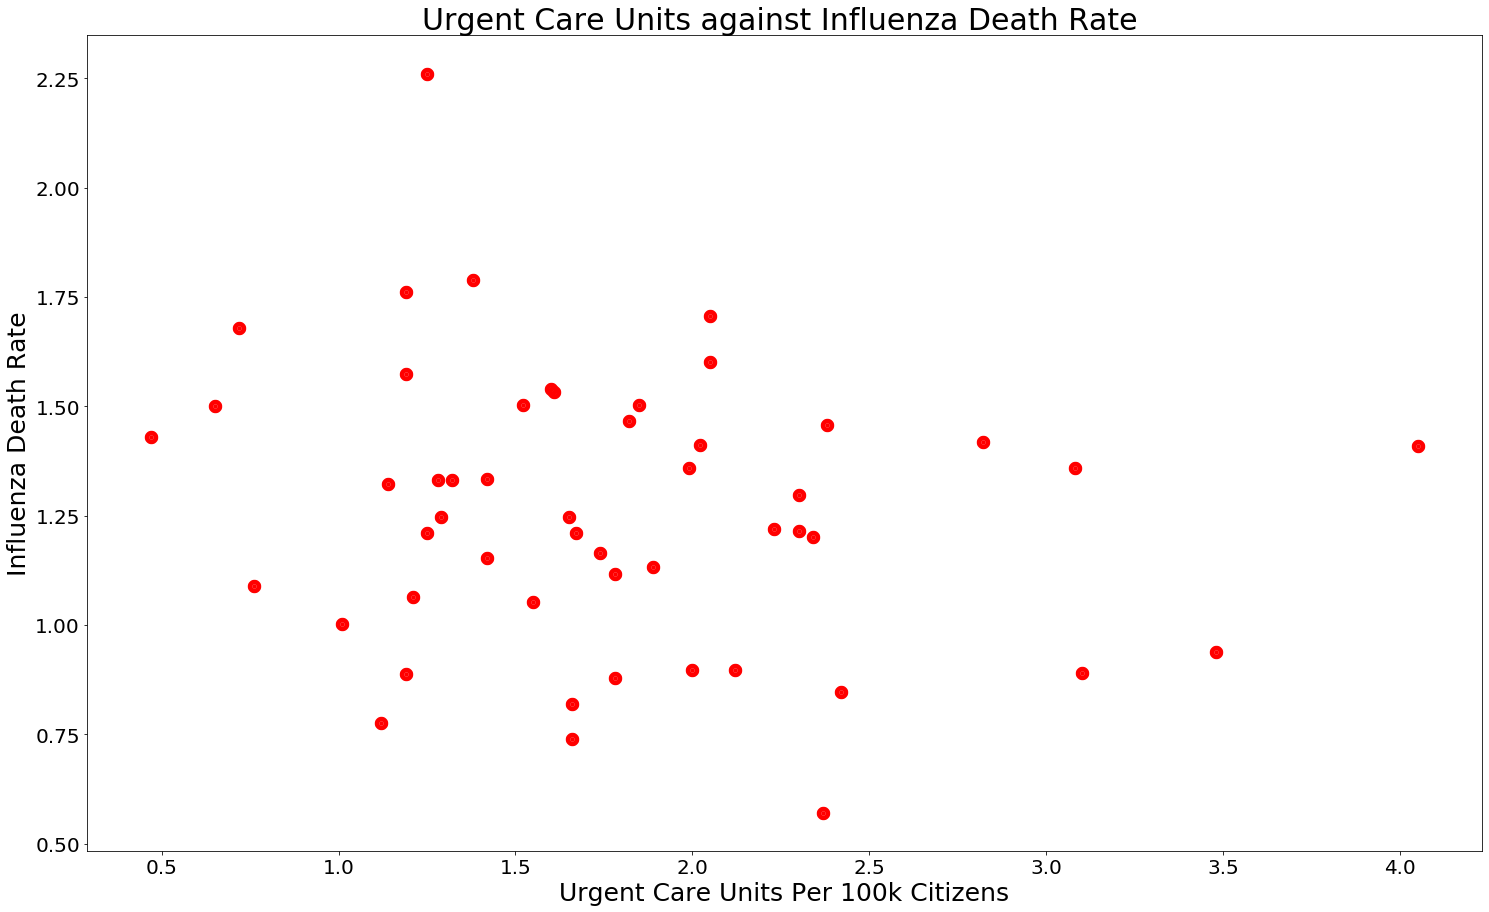

In [36]:
figure, ax = plt.subplots(figsize=(25,15))
nat_popd.plot.scatter(x="Urgent Care Units", y = "Death Rate",ax=ax,c='r',linewidths=9)
ax.set_title("Urgent Care Units against Influenza Death Rate ",fontsize=30)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Urgent Care Units Per 100k Citizens", size = 25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

Text(0.5, 1.0, 'Urgent Care Units Per 100k against Influenza Death Rate Fitted with Line of Best Fit')

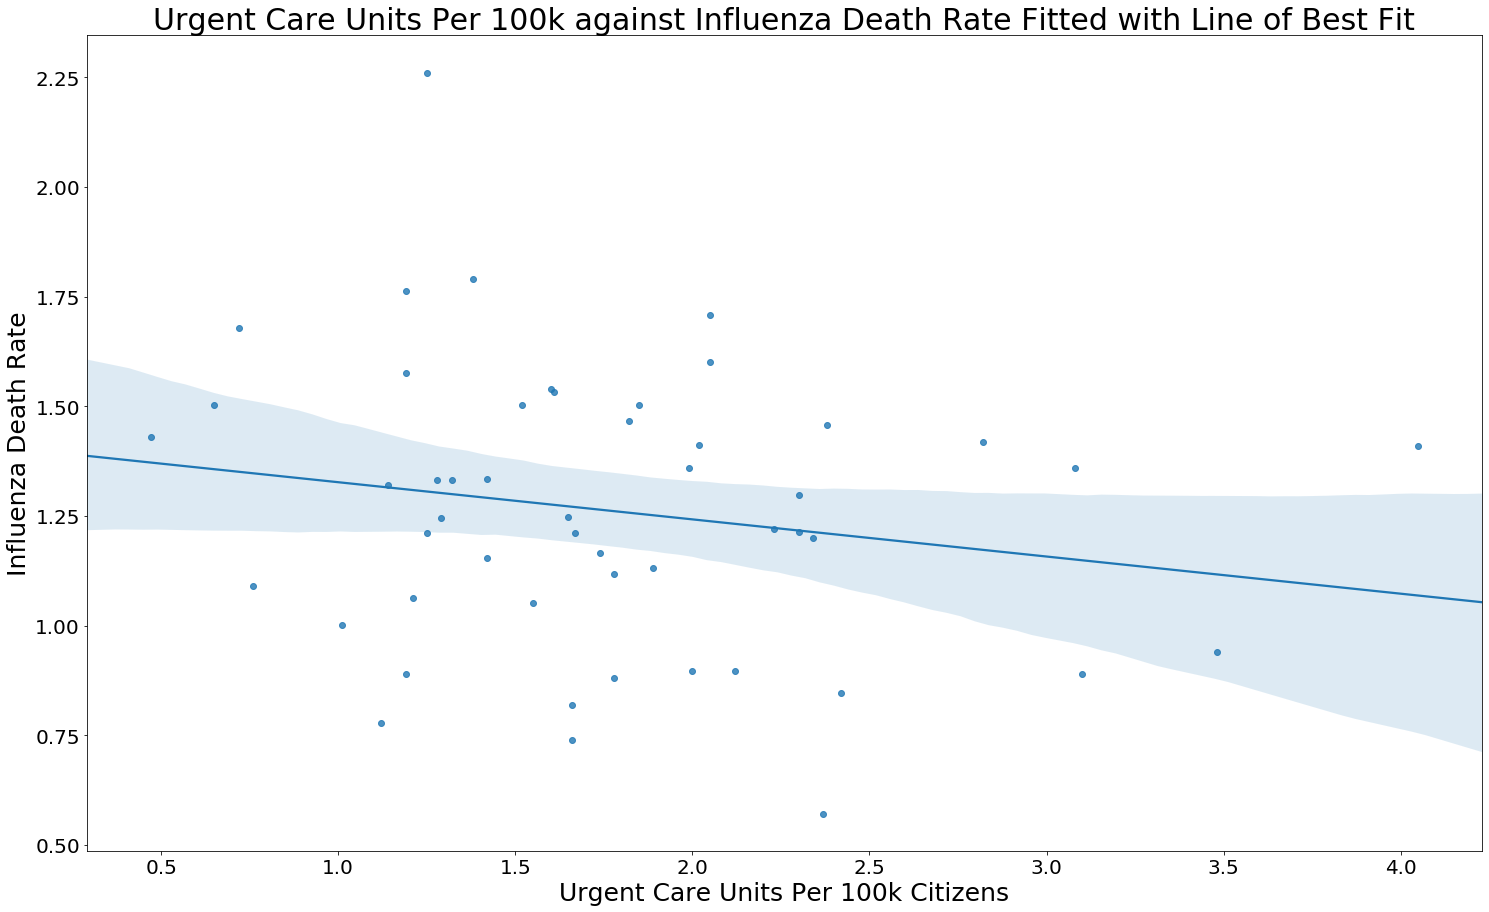

In [37]:
figure, ax = plt.subplots(figsize=(25,15))
ax = sb.regplot(x="Urgent Care Units", y="Death Rate", data=nat_popd)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Urgent Care Units Per 100k Citizens", size = 25)
ax.set_title("Urgent Care Units Per 100k against Influenza Death Rate Fitted with Line of Best Fit",fontsize=30)

### Urgent Care Units Regression

In [38]:
nat_popd_reg_uc = nat_popd.copy(deep=True)
nat_popd_reg_uc.columns = nat_popd_reg_uc.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
reg = smf.ols("death_rate ~ urgent_care_units", data = nat_popd_reg_uc).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.808
Date:                Wed, 13 May 2020   Prob (F-statistic):              0.185
Time:                        20:04:31   Log-Likelihood:                -12.493
No. Observations:                  51   AIC:                             28.99
Df Residuals:                      49   BIC:                             32.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4117      0.12

We can see from the regression test that while there is some correlation between the number of urgent care units and influenza dates, it is not causal with a 95% confidence interval. This implies there are other outside factors influencing the influenza death rate.

## <a name="hos_per_cap_reg"></a> c. Hospitals per Capita Regression testing

source: <br>
https://www.ahd.com/state_statistics.html <br>
https://www.beckershospitalreview.com/lists/62-acute-care-hospitals-in-new-york-city.html nyc hospitals<br> 

This dataset available for hospitals per state on the American Hospital Directory pulls data from each states individual webpage, so we will have to webscrape the table, since no csv is offered.

### Webscrape the data

In [39]:
import requests
from lxml import html

PLEASE NOTE: for the below cell to work, you may have to open the url in another tab and enter a captcha for it to work. 
url = https://www.ahd.com/state_statistics.html

In [40]:
#You might have to go to this website and first enter a captcha for this to work

url = "https://www.ahd.com/state_statistics.html"
page = requests.get(url)

#Store the contents of the website under doc
doc = html.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr',remove_blank_text=True)

#get rid of wrong table
tr_elements = tr_elements[1:58]

#get the columns from the header
hosp_cols = []
for i in tr_elements[0]:
    hosp_cols.append((i.text_content(),[]))
    
#extract values from the table
for row in tr_elements[1:]:
    col_idx = 0
    #for each column
    for col_value in row.iterchildren():
        hosp_cols[col_idx][1].append(col_value.text_content())
        col_idx += 1
        
#create dataframe
hosp_cols_dic = {column:value for (column,value) in hosp_cols}
hospitals = pd.DataFrame(hosp_cols_dic)
hospitals.head()

,State,NumberHospitals,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,AK - Alaska,10,"1,235","45,209","243,272","$5,374,320"
1,AL - Alabama,89,"15,330","592,368","2,818,440","$60,726,101"
2,AR - Arkansas,52,"7,873","315,200","1,385,087","$27,777,922"
3,AS - American Samoa,1,0,0,0,$0
4,AZ - Arizona,73,"13,416","610,133","2,660,941","$79,447,094"


In [41]:
#get state in correct format
hospitals["State"] = hospitals['State'].str[5:]

# sort the states into alphabetical order so we can merge and drop nonstates (american samoa, PR, etc)
hospitals.sort_values("State",inplace=True)
for index,row in hospitals.iterrows():
    if hospitals["State"][index] not in states:
        hospitals.drop(index, inplace=True)

#reset the index
hospitals.reset_index(drop=True, inplace=True)
hospitals.head(10)

#hardcode nyc row
hospitals = hospitals.append({"State":"New York City", "NumberHospitals":62, "StaffedBeds":0, "TotalDischarges":0, "PatientDays":0, "Gross PatientRevenue ($000)":0},ignore_index=True)
hospitals = hospitals.replace(np.nan,0)
hospitals.head()

,State,NumberHospitals,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,Alabama,89,"15,330","592,368","2,818,440","$60,726,101"
1,Alaska,10,"1,235","45,209","243,272","$5,374,320"
2,Arizona,73,"13,416","610,133","2,660,941","$79,447,094"
3,Arkansas,52,"7,873","315,200","1,385,087","$27,777,922"
4,California,343,"74,624","3,084,295","14,352,052","$484,959,610"


### Merge the data

In [42]:
main_data = nat_popd.copy(deep=True)
main_data = main_data.merge(hospitals)
main_data.head()

,Cause Name,State,Death Rate,Age-adjusted Death Rate,Pop Density,Urgent Care Units,NumberHospitals,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,Influenza and pneumonia,Alabama,1.411794,18.8,94.4,2.02,89,"15,330","592,368","2,818,440","$60,726,101"
1,Influenza and pneumonia,Alaska,0.571429,14.1,1.2,2.37,10,"1,235","45,209","243,272","$5,374,320"
2,Influenza and pneumonia,Arizona,0.897540,10.0,56.3,2.00,73,"13,416","610,133","2,660,941","$79,447,094"
3,Influenza and pneumonia,Arkansas,1.762379,20.7,56.0,1.19,52,"7,873","315,200","1,385,087","$27,777,922"
4,Influenza and pneumonia,California,1.154132,14.7,239.1,1.42,343,"74,624","3,084,295","14,352,052","$484,959,610"


In [43]:
#get the amount of hospitals per 100k citizens
for index,row in main_data.iterrows():
    if main_data["State"][index] == "New York City":
        continue
    main_data["NumberHospitals"][index] = float(main_data["NumberHospitals"][index]) / round((states_population[main_data["State"][index]]/100000),2)

#hardcode nyc into df
main_data["NumberHospitals"][50] = float(round(62 / (8261718.0/100000),2)) #number of units in

#change hospital rows ot float
main_data["NumberHospitals"] = main_data["NumberHospitals"].astype(float)
main_data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cause Name,State,Death Rate,Age-adjusted Death Rate,Pop Density,Urgent Care Units,NumberHospitals,StaffedBeds,TotalDischarges,PatientDays,Gross PatientRevenue ($000)
0,Influenza and pneumonia,Alabama,1.411794,18.8,94.4,2.02,1.857262,"15,330","592,368","2,818,440","$60,726,101"
1,Influenza and pneumonia,Alaska,0.571429,14.1,1.2,2.37,1.392758,"1,235","45,209","243,272","$5,374,320"
2,Influenza and pneumonia,Arizona,0.897540,10.0,56.3,2.00,1.125328,"13,416","610,133","2,660,941","$79,447,094"
3,Influenza and pneumonia,Arkansas,1.762379,20.7,56.0,1.19,1.774744,"7,873","315,200","1,385,087","$27,777,922"
4,Influenza and pneumonia,California,1.154132,14.7,239.1,1.42,0.912016,"74,624","3,084,295","14,352,052","$484,959,610"


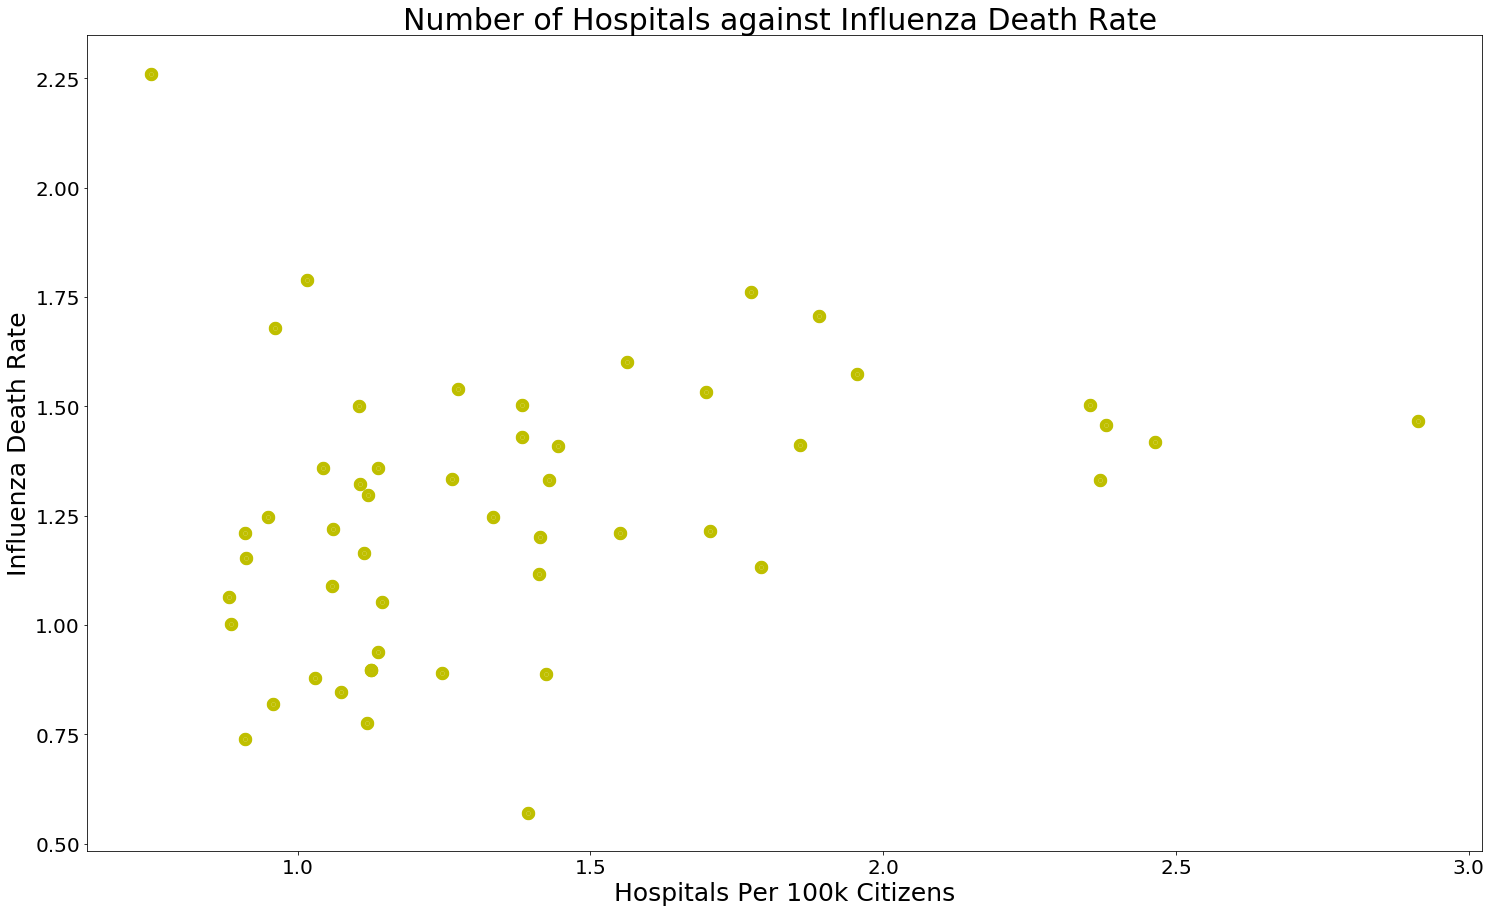

In [44]:
figure, ax = plt.subplots(figsize=(25,15))
main_data.plot.scatter(x="NumberHospitals", y = "Death Rate",ax=ax,c='y',linewidths=9)
ax.set_title("Number of Hospitals against Influenza Death Rate ",fontsize=30)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Hospitals Per 100k Citizens", size = 25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

Text(0.5, 1.0, 'Urgent Care Units Per 100k against Influenza Death Rate Fitted with Line of Best Fit')

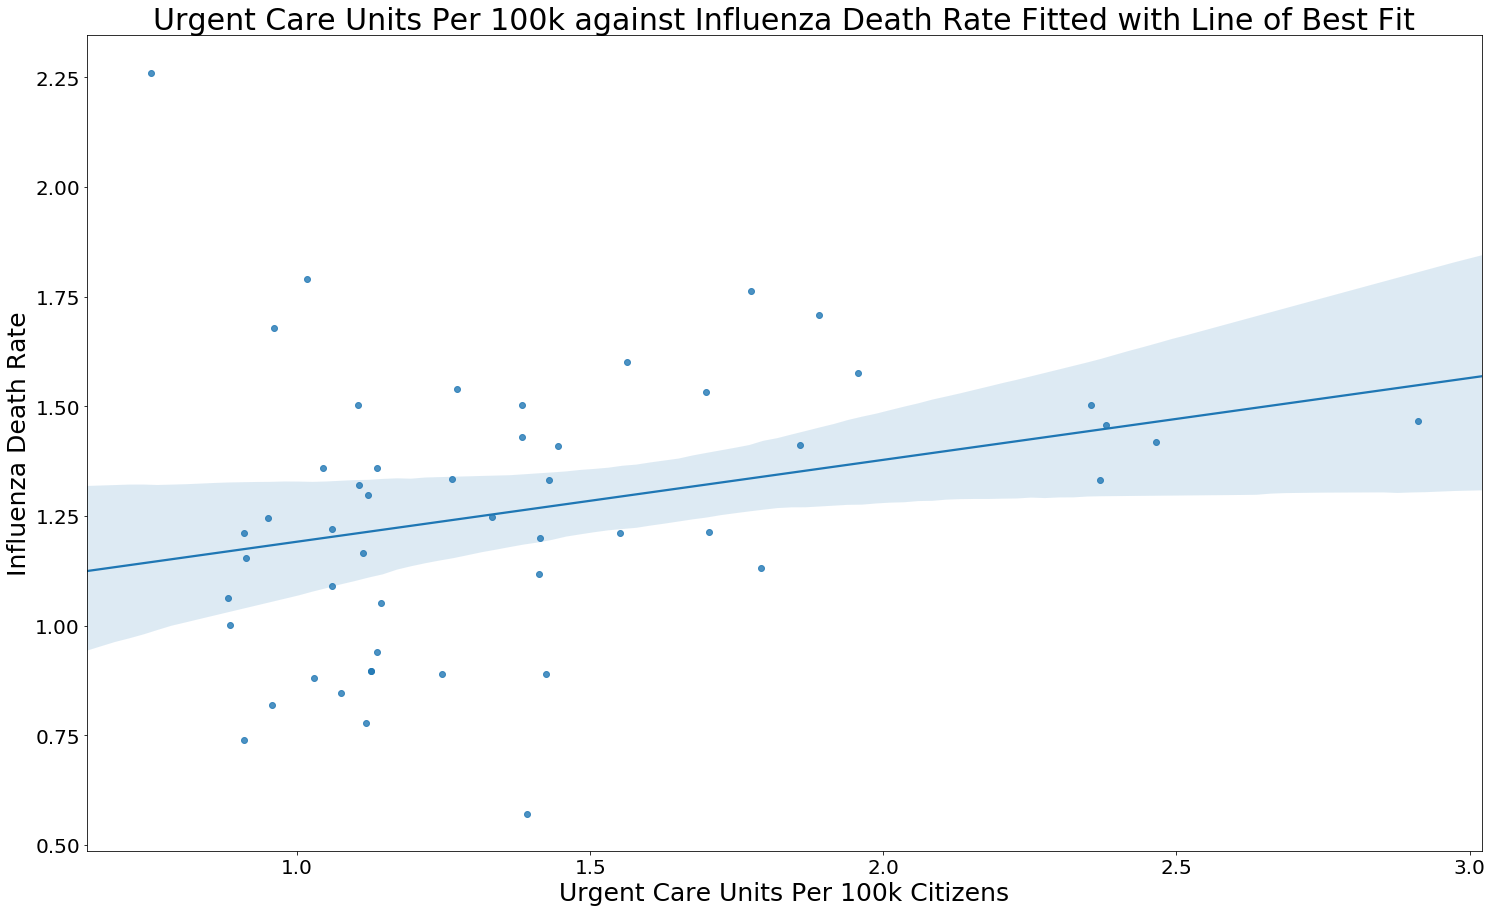

In [45]:
figure, ax = plt.subplots(figsize=(25,15))
#sb.set(color_codes=True)
x = main_data["NumberHospitals"].astype(float)
y = main_data["Death Rate"].astype(float)
ax = sb.regplot(x=x, y=y, data=main_data)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel("Influenza Death Rate", size = 25)
ax.set_xlabel("Urgent Care Units Per 100k Citizens", size = 25)
ax.set_title("Urgent Care Units Per 100k against Influenza Death Rate Fitted with Line of Best Fit",fontsize=30)

### Hospitals  Regression

In [46]:
hosp_reg = main_data.copy(deep=True)
hosp_reg.columns = hosp_reg.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
reg = smf.ols("death_rate ~ numberhospitals", data = hosp_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.158
Date:                Wed, 13 May 2020   Prob (F-statistic):             0.0468
Time:                        20:04:34   Log-Likelihood:                -11.340
No. Observations:                  51   AIC:                             26.68
Df Residuals:                      49   BIC:                             30.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0046      0.133     

Based on the regression, there is a causal correlation between the amount of hosptials in a state, and the deaths to the flu, however not in the trend we expected. The more hospitals there are in a state, the more influenza deaths there are. On top of this, the results are not strongly explanatory, holding a R-squared value of only .078.

An explanation here could be that more hospitals means people have more access to medical care for influenza. Therefore, the greater number of hospitals could increase the number of reported incidents, meanwhile, areas with fewer hospitals could have an equal or higher rate but simply fewer reported incidents.

### Combined Regression

In [47]:
reg = smf.ols("death_rate ~ urgent_care_units + pop_density + numberhospitals", data = hosp_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     10.09
Date:                Wed, 13 May 2020   Prob (F-statistic):           3.02e-05
Time:                        20:04:34   Log-Likelihood:               -0.73932
No. Observations:                  51   AIC:                             9.479
Df Residuals:                      47   BIC:                             17.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.9955      0.13

### Conclusion

We ran three regression tests. None were particiularly explanatory of influenza, however they did provide some food for thought. Between the three regressions we see that there is strong collinearity, which means is that the factors we are tested have high correlation between each other.

Given what we  tested, we think it is safe to conclude that the larger prescence of influenza deaths in New York certainly is statistically significant, however the root causes of cannot be drawn from these variables. At this point, it is likely that there are other factors that influence the influenza death rate that were not accounted for. For example, New York City receives a large number of visitors each year, each of whom could be carriers of illness thus making it faster spread, especially with the prolific use of public transportation.

Looking at the combined regression, while it does hold some explanatory value, as shown by the R-squared value, p-value, and F-statistic, it fails to provide a thorough and robust explanation of the the root causes of high or low influenza rates. A worthwhile next step that we would like to further investigate is the relationship between these variables and the spread of COVID-19 in the United States. It would be interesting to see how these variables behave with a different virus, and if perhaps this tells an overall story about the state of viral infection in NYC vs the US, and if our variables behave in a similar way.

## <a name="influ_covid"></a> d. Relationship Between Influenza Analysis and COVID-19 Impact

source:

https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
https://projects.thecity.nyc/2020_03_covid-19-tracker nyc data

In [48]:
#load in data
covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
#get todays statistics
covid = covid.tail(55)

#drop nonstates
for index,row in covid.iterrows():
    if covid["state"][index] not in states:
        covid.drop(index, inplace=True)
#reset index
covid.reset_index(inplace=True,drop=True)

covid.head()

,date,state,fips,cases,deaths
0,2020-05-12,Alabama,1,10464,435
1,2020-05-12,Alaska,2,383,8
2,2020-05-12,Arizona,4,11736,562
3,2020-05-12,Arkansas,5,4164,95
4,2020-05-12,California,6,71150,2902


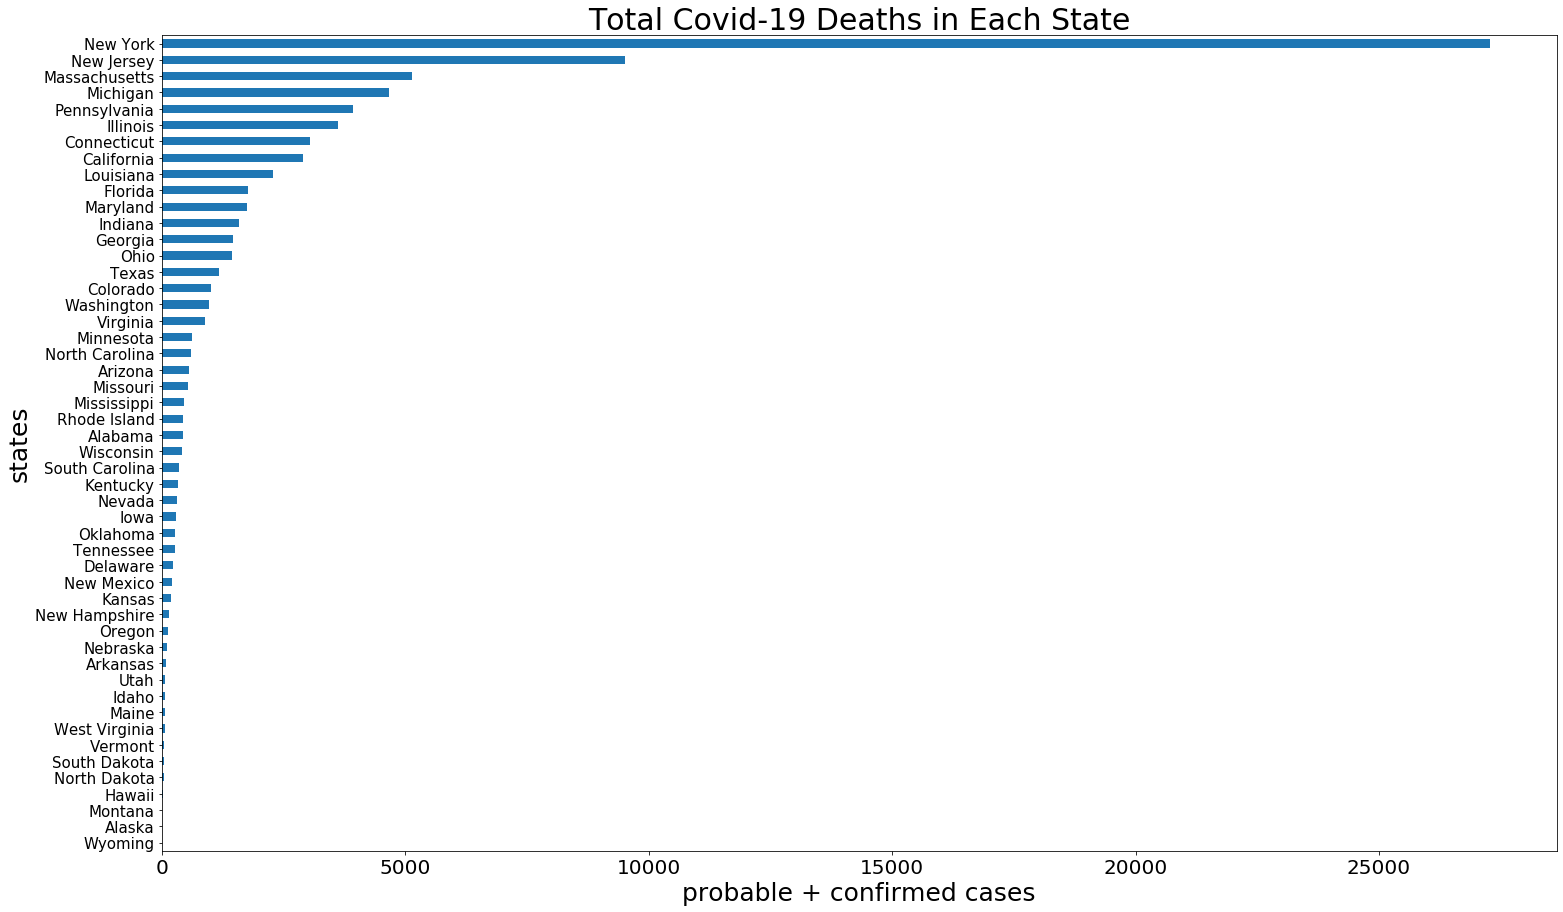

In [49]:
#change the index to the state name, sort values
covid = covid.set_index("state", drop=True)
covid = covid.sort_values("deaths",ascending=True)

#plot
figure, ax = plt.subplots(figsize=(25,15))
covid["deaths"].plot.barh(ax=ax, x = "state")
ax.set_title("Total Covid-19 Deaths in Each State",fontsize=30)
ax.set_ylabel("states", size = 25)
ax.set_xlabel("probable + confirmed cases", size = 25)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.tick_params(axis='x', which='major', labelsize=20)

In [50]:
#read in data
ir = pd.read_csv("agg.csv")

#drop nonstates and wrong death types
ir = ir.loc[ir["Cause Name"] == "Influenza and pneumonia"]
ir.drop(ir.loc[ir["State"]=="United States"].index,inplace=True)

#get correct years, will need for accurate test later
ir = ir.loc[ir["Year"] > 2007]
ir = ir.loc[ir["Year"] < 2015]

#turn deaths to floats
ir["Deaths"] = ir["Deaths"].str.replace(",","").astype(float)
grouped = ir.groupby(["State"],as_index=False)["Deaths"].sum()
grouped

,State,Deaths
0,Alabama,6765.0
1,Alaska,410.0
2,Arizona,5822.0
3,Arkansas,5163.0
4,California,43406.0
5,Colorado,4336.0
6,Connecticut,4460.0
7,Delaware,965.0
8,District of Columbia,560.0
9,Florida,17141.0


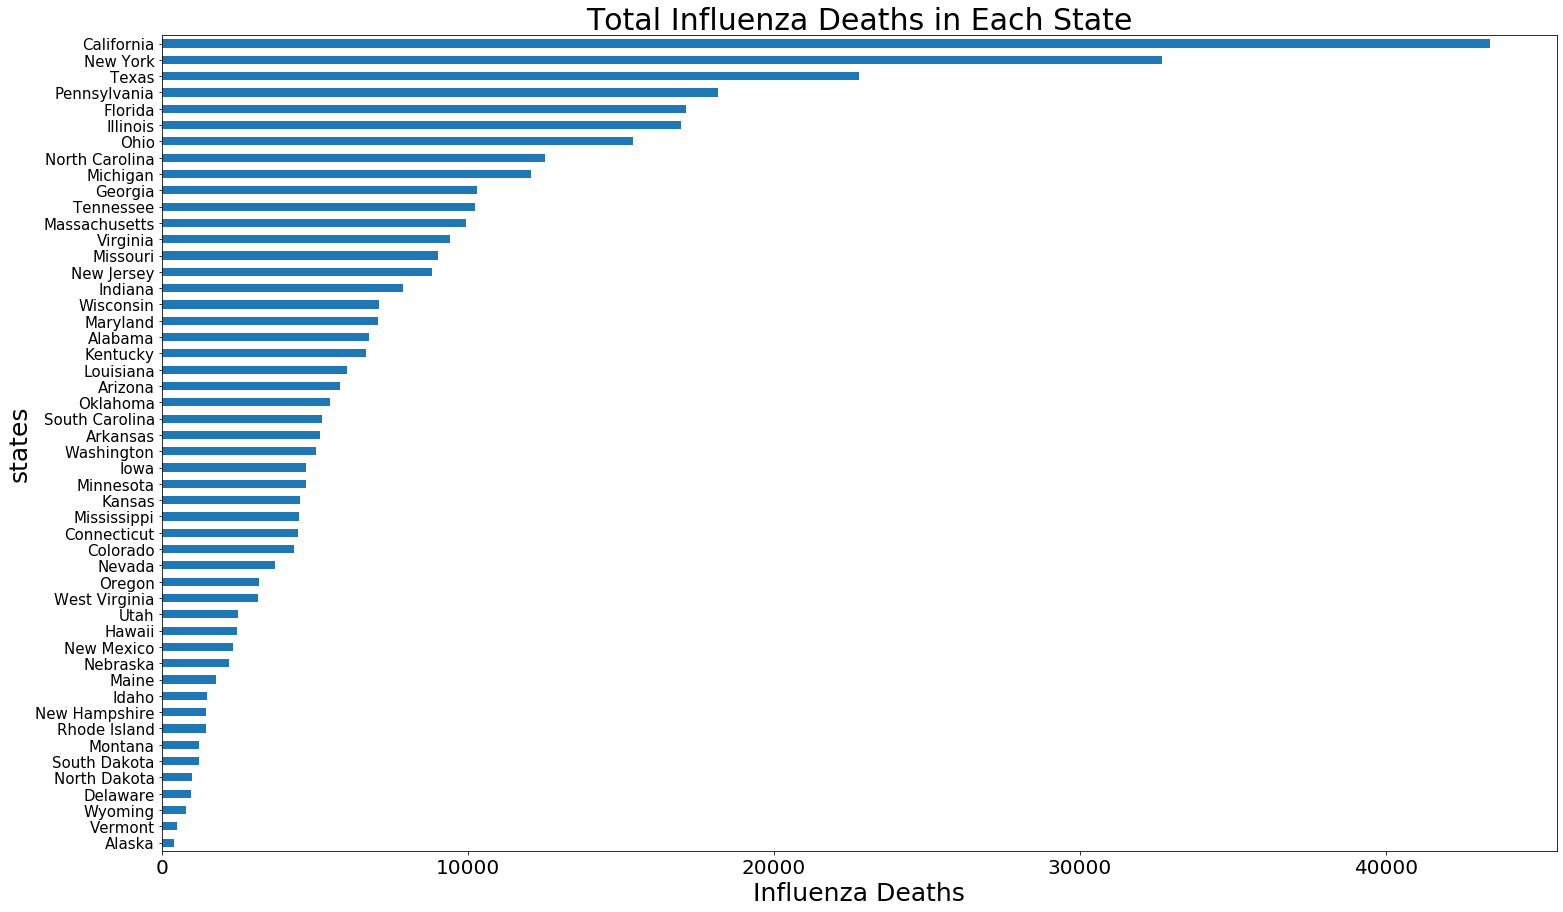

In [51]:
#change the index to the state name, sort values, drop nonstates
grouped = grouped.set_index("State", drop=True)
grouped= grouped.sort_values("Deaths",ascending=True)
grouped.drop("District of Columbia", inplace=True)
#plot
figure, ax = plt.subplots(figsize=(25,15))
grouped["Deaths"].plot.barh(ax=ax, x = "State")
ax.set_title("Total Influenza Deaths in Each State",fontsize=30)
ax.set_ylabel("states", size = 25)
ax.set_xlabel("Influenza Deaths", size = 25)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.tick_params(axis='x', which='major', labelsize=20)

In [52]:
#top 10 states with most deaths to covid
covid.tail(10)

,date,fips,cases,deaths
state,,,,
Florida,2020-05-12,12,41915,1778
Louisiana,2020-05-12,22,32050,2281
California,2020-05-12,6,71150,2902
Connecticut,2020-05-12,9,34333,3041
Illinois,2020-05-12,17,83168,3617
Pennsylvania,2020-05-12,42,61407,3924
Michigan,2020-05-12,26,47946,4674
Massachusetts,2020-05-12,25,79332,5141
New Jersey,2020-05-12,34,140743,9508


In [53]:
#top 10 states with most deaths to flu
grouped.tail(10)

,Deaths
State,
Georgia,10305.0
Michigan,12081.0
North Carolina,12512.0
Ohio,15403.0
Illinois,16973.0
Florida,17141.0
Pennsylvania,18186.0
Texas,22783.0
New York,32691.0


sources:

https://worldpopulationreview.com/states/ most populous states

Looking at the two graphs visually, the trends look incredibly similar. In fact, 7 of the top states for deaths from COVID-19, are also in the top 10 for deaths from influenza between 2008-2017. This seems to imply that the areas hit hardest by COVID-19 are correlated with the same factors that lead to increased deaths from Influenza. While we have already explored several factors previously, there is a very obvious factor that we have not yet test, population. We test population density yes, but not yet population. Given these 7 shared states that were hit hardest by both COVID-19 and Influenze are all in the top 10 most populous states, this seems to be a likely causal factor.

Initially, this may seem like a trivial test, given that it should be obvious that a place with more people should have more viral cases, however, please consider two facts. The first being that our population density did not have a large amount of explanatory power, so it seems that perhaps population should also not be explanatory. The second fact being that if this were a one-to-one ratio, countries like China, India, and Indonesia would have the highest rates of COVID-19 deaths alongside the US, but they do not.

In [54]:
#reset the index to merge, sort alphabetically, then rest the index again after sorting
covid = covid.reset_index()
covid.sort_values("state", inplace=True)
covid.reset_index(drop=True,inplace=True)
grouped = grouped.reset_index()
grouped.sort_values("State",inplace=True)
grouped.reset_index(inplace=True,drop=True)

### regression population vs covid and influenza deaths

In [55]:
#merge the dataframes together
cov_inf = pd.concat([covid,grouped["Deaths"]],axis=1)
cov_inf = cov_inf.rename(columns={"cases": "Covid Cases", "deaths":"Covid Deaths", "Deaths":"Influenza Deaths"})
cov_inf.drop(columns= {"date", "fips"},inplace=True)
cov_inf

,state,Covid Cases,Covid Deaths,Influenza Deaths
0,Alabama,10464,435,6765.0
1,Alaska,383,8,410.0
2,Arizona,11736,562,5822.0
3,Arkansas,4164,95,5163.0
4,California,71150,2902,43406.0
5,Colorado,20103,1009,4336.0
6,Connecticut,34333,3041,4460.0
7,Delaware,6741,237,965.0
8,Florida,41915,1778,17141.0
9,Georgia,33311,1470,10305.0


In [56]:
population = []
for key in states_population.keys():
    population.append(states_population[key])
cov_inf["population"] = population
cov_inf

,state,Covid Cases,Covid Deaths,Influenza Deaths,population
0,Alabama,10464,435,6765.0,4791774.0
1,Alaska,383,8,410.0,717500.0
2,Arizona,11736,562,5822.0,6486619.0
3,Arkansas,4164,95,5163.0,2929563.0
4,California,71150,2902,43406.0,37609207.0
5,Colorado,20103,1009,4336.0,5117716.0
6,Connecticut,34333,3041,4460.0,3579097.0
7,Delaware,6741,237,965.0,907452.0
8,Florida,41915,1778,17141.0,19103407.0
9,Georgia,33311,1470,10305.0,9793851.0


### <a name="flu_covid_vis"></a> Visualization

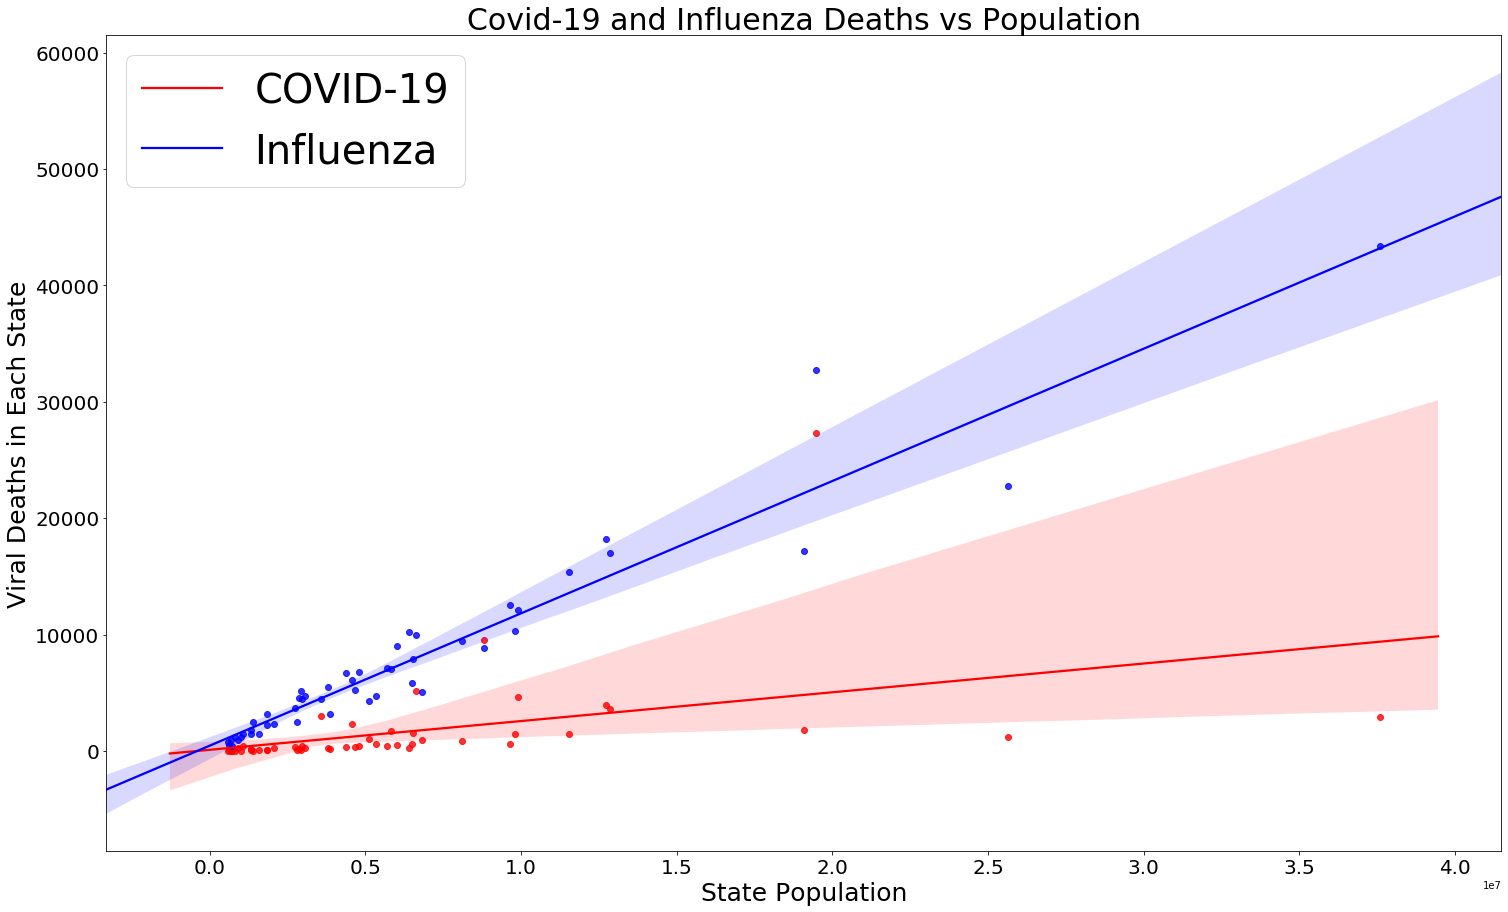

In [57]:
figure, ax = plt.subplots(figsize=(25,15))

#plot
x = cov_inf["population"].astype(float)
y = cov_inf["Covid Deaths"].astype(float)
ax = sb.regplot(x=x, y=y, data=cov_inf, color="r")
ax = sb.regplot(x=x, y=cov_inf["Influenza Deaths"].astype(float), color = "b")
ax.set_title("Covid-19 and Influenza Deaths vs Population",fontsize=30)
ax.set_ylabel("Viral Deaths in Each State", size = 25)
ax.set_xlabel("State Population", size = 25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.legend(["COVID-19", "Influenza"], fontsize = 40, loc="upper left")

PLEASE NOTE: The above graph was obtained with usage of LIVE data, what you see might be different than what we saw when we did our testing.

In [58]:
cov_reg = cov_inf.copy(deep=True)
cov_reg.columns = cov_inf.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
reg = smf.ols("covid_deaths ~ population", data = cov_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:           covid_deaths   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     10.16
Date:                Wed, 13 May 2020   Prob (F-statistic):            0.00252
Time:                        20:04:39   Log-Likelihood:                -481.47
No. Observations:                  50   AIC:                             966.9
Df Residuals:                      48   BIC:                             970.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.6133    716.897      0.143      0.8

In [59]:
cov_reg = cov_inf.copy(deep=True)
cov_reg.columns = cov_inf.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
reg = smf.ols("influenza_deaths ~ population", data = cov_reg).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:       influenza_deaths   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     590.7
Date:                Wed, 13 May 2020   Prob (F-statistic):           1.25e-28
Time:                        20:04:39   Log-Likelihood:                -456.22
No. Observations:                  50   AIC:                             916.4
Df Residuals:                      48   BIC:                             920.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    461.2597    432.612      1.066      0.2

Looking at the graph first, it is clear that while population nearly explains all of the rise in deaths attributed to Influenza, it fails to explain the total deaths from COVID-19. One explanation could be that the Flu season occurs every year. What this means is that people do not take much precautions with it, and merely accept that it will be back every year. Given that there are minimal precautions in place, states with more population simply have more cases and more deaths. However, the circumstances with COVID-19 are very different. The deaths that can be attributed to it are not simply because of population, but rather other factors likely to do with how well a city, or state, or country has prepared for the virus. This explains why countries like India and Indonesia have relatively low COVID-19 deaths in comparison to the United States.

While these results likely bolster the claim that New York City's Influenza disparity is caused largely by the population of the city, along with the other factors we tested, they do give us a reason as to believe this is true for COVID-19, at least not completely.

## <a name="Unintentional_Injuries"></a> 3. Unintentional Injuries

### <a name="AD_US"></a> a. US Death Rate for Accidental Deaths

First, using the file "major_causes_rates.csv", visualize the trend for age adjusted death rates for accidental deaths in the US. <br/>
Source: https://catalog.data.gov/dataset/nchs-age-adjusted-death-rates-for-selected-major-causes-of-death


In [60]:
rates = pd.read_csv("major_causes_rates.csv")
rates

,Year,Cause,Age Adjusted Death Rate
0,1900,Heart Disease,265.4
1,1901,Heart Disease,272.6
2,1902,Heart Disease,285.2
3,1903,Heart Disease,304.5
4,1904,Heart Disease,331.5
...,...,...,...
600,1900,Influenza and Pneumonia,40362.0
601,1900,Tuberculosis,38820.0
602,1900,Diarrhea/Enteritis/Ulcerative Colitis,28491.0
603,1900,Heart Disease,27427.0


In [61]:
rates.dtypes

Year                         int64
Cause                       object
Age Adjusted Death Rate    float64
dtype: object

In [62]:
rates['Cause'].unique()

array(['Heart Disease', 'Cancer', 'Accidents', 'Stroke',
       'Influenza and Pneumonia', 'Chronic Respiratory Diseases',
       'Vascular Lesions', 'Certain Diseases of Infancy', 'Tuberculosis',
       'Diarrhea/Enteritis/Ulcerative Colitis'], dtype=object)

In [63]:
#create dataframe of only 'Accidents' rates, and eliminate outliers
acc = rates.loc[rates['Cause'] == 'Accidents']
acc = acc.loc[acc['Age Adjusted Death Rate'] <= 1000]
acc

,Year,Cause,Age Adjusted Death Rate
236,1900,Accidents,90.3
237,1901,Accidents,109.3
238,1902,Accidents,93.6
239,1903,Accidents,106.9
240,1904,Accidents,112.8
...,...,...,...
349,2013,Accidents,39.4
350,2014,Accidents,40.5
351,2015,Accidents,43.2
352,2016,Accidents,47.4


In [64]:
#sort based on the year in ascending order
acc = acc.sort_values('Year')

Text(0.5, 1.0, 'Accidental Death Rate in US from 1900 to Today')

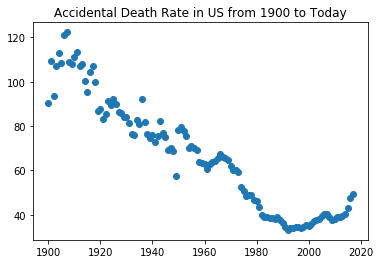

In [65]:
x = acc['Year']
y = acc['Age Adjusted Death Rate']
plt.scatter(x, y)
plt.title("Accidental Death Rate in US from 1900 to Today")


In [66]:
acc = acc.loc[acc['Year'] <= 2014 ]
acc = acc.loc[acc['Year'] >= 2008 ]
acc

,Year,Cause,Age Adjusted Death Rate
344,2008,Accidents,39.2
345,2009,Accidents,37.5
346,2010,Accidents,38.0
347,2011,Accidents,39.1
348,2012,Accidents,39.1
349,2013,Accidents,39.4
350,2014,Accidents,40.5


Text(0.5, 1.0, 'Accidental Death Rate in US 2008-2014')

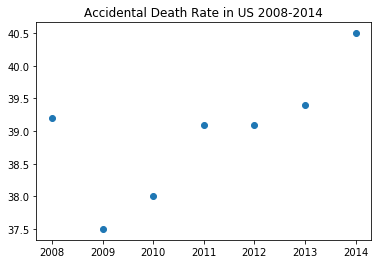

In [67]:
x = acc['Year']
y = acc['Age Adjusted Death Rate']
plt.scatter(x, y)
plt.title("Accidental Death Rate in US 2008-2014")

As we can see from the plot, the death rate for accidents has decreased significantly since the beginning of the 20th century, however, there has been a gradual increase in the recent years.

### <a name="breakdown_unint"></a> b. Breakdown of Unintentional Injury Mechanisms

Now, let us explore the various unintentional injuries leading to death in the US.
<br/>
Source: https://catalog.data.gov/dataset/nchs-injury-mortality-united-states-65366

In [68]:
injury = pd.read_csv("injury_mortality.csv")
injury

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
0,2016,Both sexes,All Ages,All races,All Mechanisms,All Intentions,231991,323127513,71.795496,0.149060,71.503338,72.087654,68.982236,0.1460097,68.696057,69.268415
1,2015,Both sexes,All Ages,All races,All Mechanisms,All Intentions,214008,321418820,66.582287,0.143928,66.300189,66.864384,63.866114,0.140507,63.59072,64.141508
2,2014,Both sexes,All Ages,All races,All Mechanisms,All Intentions,199752,318857056,62.646254,0.140168,62.371524,62.920983,60.127242,0.136713,59.859285,60.3952
3,2013,Both sexes,All Ages,All races,All Mechanisms,All Intentions,192945,316128839,61.033660,0.138948,60.761321,61.305998,58.771709,0.1357892,58.505562,59.037856
4,2012,Both sexes,All Ages,All races,All Mechanisms,All Intentions,190385,313914040,60.648769,0.138997,60.376334,60.921203,58.696255,0.1362913,58.429124,58.963386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98275,2003,Female,75+,Hispanic,Unspecified,Legal intervention/war,0,488417,0.000000,NaN,0.000000,0.000000,,,,
98276,2002,Female,75+,Hispanic,Unspecified,Legal intervention/war,0,460962,0.000000,NaN,0.000000,0.000000,,,,
98277,2001,Female,75+,Hispanic,Unspecified,Legal intervention/war,0,435880,0.000000,NaN,0.000000,0.000000,,,,
98278,2000,Female,75+,Hispanic,Unspecified,Legal intervention/war,0,403973,0.000000,NaN,0.000000,0.000000,,,,


In [69]:
injury.dtypes

Year                                          int64
Sex                                          object
Age Group (Years)                            object
Race                                         object
Injury Mechanism                             object
Injury Intent                                object
Deaths                                        int64
Population                                    int64
Age Specific Rate                           float64
Age Specific Rate Standard Error            float64
Age Specific Rate Lower Confidence Limit    float64
Age Specific Rate Upper Confidence Limit    float64
Age Adjusted Rate                            object
Age Adjusted Rate Standard Error             object
Age Adjusted Rate Lower Confidence Limit     object
Age Adjusted Rate Upper Confidence Limit     object
dtype: object

In [70]:
injury['Injury Intent'].unique()

array(['All Intentions', 'Suicide', 'Unintentional', 'Undetermined',
       'Homicide', 'Legal intervention/war'], dtype=object)

In [71]:
unint = injury.loc[injury['Injury Intent'] == 'Unintentional']
unint = unint.loc[unint['Year'] <= 2014]
unint = unint.loc[unint['Year'] >= 2008]
unint = unint.sort_values('Year')
unint

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
92249,2008,Female,75+,Hispanic,Unspecified,Unintentional,65,631049,10.300309,1.277596,7.949561,13.128590,,,,
65146,2008,Both sexes,65–74,All races,Poisoning,Unintentional,725,20505679,3.535606,0.131309,3.278240,3.792972,,,,
65164,2008,Both sexes,75+,All races,Poisoning,Unintentional,571,18271942,3.125010,0.130778,2.868686,3.381334,,,,
20195,2008,Male,All Ages,All races,Drowning,Unintentional,2726,149489951,1.823534,0.034926,1.755079,1.891989,1.8208068,0.0351758,1.7518621,1.8897514
65183,2008,Both sexes,All Ages,Non-Hispanic white,Poisoning,Unintentional,24855,199783797,12.440949,0.078913,12.286280,12.595618,12.39103,0.0799878,12.234254,12.547807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28415,2014,Female,25–44,Non-Hispanic white,Fall,Unintentional,119,24387162,0.487962,0.044731,0.400288,0.575635,,,,
2879,2014,Female,65–74,Non-Hispanic black,All Mechanisms,Unintentional,390,1409606,27.667306,1.400988,24.921368,30.413243,,,,
44902,2014,Female,All Ages,All races,Firearm,Unintentional,64,161920569,0.039526,0.004941,0.030439,0.050473,0.0502157,0.0078692,0.0360357,0.0681233
66352,2014,Female,15–24,Non-Hispanic black,Poisoning,Unintentional,64,3367586,1.900471,0.237559,1.463594,2.426859,,,,


In [72]:
unint['Injury Mechanism'].unique()

array(['Unspecified', 'Poisoning', 'Drowning', 'All Other Transport',
       'Fire/hot object or substance', 'Suffocation', 'Cut/pierce',
       'Firearm', 'Fall', 'Motor vehicle traffic', 'All Mechanisms',
       'All Other Specified'], dtype=object)

In [73]:
unint['Race'].unique()

array(['Hispanic', 'All races', 'Non-Hispanic white',
       'Non-Hispanic black'], dtype=object)

In [74]:
unint['Age Group (Years)'].unique()

array(['75+', '65–74', 'All Ages', '< 15', '15–24', '25–44', '45–64'],
      dtype=object)

In [75]:
all_age = unint.loc[unint['Age Group (Years)'] == 'All Ages']
all_age_race = all_age.loc[all_age['Race']=='All races']
all_age_race_sex = all_age_race.loc[all_age_race['Sex'] == 'Both sexes']
all_age_race_sex_mech = all_age_race_sex.loc[all_age_race_sex['Injury Mechanism'] == 'All Mechanisms']
all_age_race_sex_mech = all_age_race_sex_mech.sort_values('Year')
all_age_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
1528,2008,Both sexes,All Ages,All races,All Mechanisms,Unintentional,121902,304093966,40.086951,0.114815,39.861914,40.311988,39.248854,0.1130948,39.027188,39.470519
1527,2009,Both sexes,All Ages,All races,All Mechanisms,Unintentional,118021,306771529,38.471954,0.111986,38.252461,38.691446,37.491477,0.1100012,37.275875,37.707079
1526,2010,Both sexes,All Ages,All races,All Mechanisms,Unintentional,120859,308745538,39.145181,0.112600,38.924485,39.365877,37.989518,0.1102952,37.77334,38.205697
1525,2011,Both sexes,All Ages,All races,All Mechanisms,Unintentional,126438,311591917,40.578074,0.114118,40.354404,40.801745,39.134328,0.111336,38.91611,39.352547
1524,2012,Both sexes,All Ages,All races,All Mechanisms,Unintentional,127792,313914040,40.709234,0.113878,40.486032,40.932435,39.058447,0.1106795,38.841516,39.275379
1523,2013,Both sexes,All Ages,All races,All Mechanisms,Unintentional,130557,316128839,41.298668,0.114297,41.074645,41.522691,39.384641,0.1106219,39.167822,39.60146
1522,2014,Both sexes,All Ages,All races,All Mechanisms,Unintentional,135928,318857056,42.629761,0.115627,42.403132,42.856389,40.476837,0.1115838,40.258133,40.695542


#### <a name="all_mech"></a> All Mechanisms

Below is a graph displaying the total accidental deaths each year for both sexes, all ages, all races, and for all injury mechanisms.

Text(0.5, 1.0, 'Number of Accidental Deaths by Year')

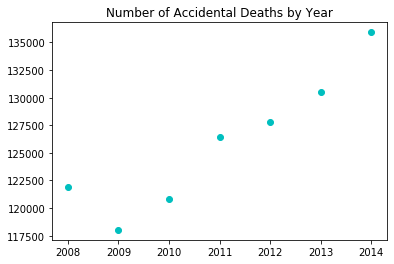

In [76]:
x = all_age_race_sex_mech['Year']
y1 = all_age_race_sex_mech['Deaths']
plt.scatter(x, y1, color = 'c')
plt.title("Number of Accidental Deaths by Year")


In [77]:
all_age_race_male = all_age_race.loc[all_age_race['Sex'] == 'Male']
all_age_race_male_mech = all_age_race_male.loc[all_age_race_male['Injury Mechanism'] == 'All Mechanisms']
all_age_race_male_mech = all_age_race_male_mech.sort_values('Year')

all_age_race_female = all_age_race.loc[all_age_race['Sex'] == 'Female']
all_age_race_female_mech = all_age_race_female.loc[all_age_race_female['Injury Mechanism'] == 'All Mechanisms']
all_age_race_female_mech = all_age_race_female_mech.sort_values('Year')

The below graph is the same as the one above, but broken down by sex, the blue markers are for males, while the yellow color is for females.

Text(0.5, 1.0, 'Deaths per Year by Sex')

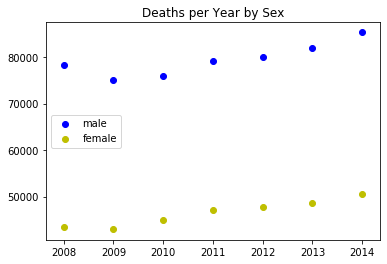

In [78]:
x = all_age_race_sex_mech['Year']
y_male = all_age_race_male_mech['Deaths']
y_female = all_age_race_female_mech['Deaths']
plt.scatter(x, y_male, color = 'b', label='male')
plt.scatter(x, y_female, color = 'y', label='female')
plt.legend(loc = "center left")
plt.title("Deaths per Year by Sex")


As we can see, regardless of the year, males have a significantly higher chance of dying as a result of unintentional injuries compared to those of females. 

#### <a name="age_group"></a> By Age Group

Now, lets break this down by age groups, while keeping both sexes, all races, all mechanisms constant.

In [79]:
#compare based off of age group, keep all races, both sexes, all mechanisms
race = unint.loc[unint['Race']=='All races']
mech = unint.loc[unint['Injury Mechanism'] == 'All Mechanisms']
race_mech = race.loc[race['Injury Mechanism'] == 'All Mechanisms']
race_sex = race.loc[race['Sex'] == 'Both sexes']
race_sex_mech = race_sex.loc[race_sex['Injury Mechanism'] == 'All Mechanisms']



In [80]:
# age = < 15
child_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '< 15']
child_race_sex_mech = child_race_sex_mech.sort_values('Year')
child_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
1546,2008,Both sexes,< 15,All races,All Mechanisms,Unintentional,4643,60907384,7.623049,0.111874,7.403776,7.842323,,,,
1545,2009,Both sexes,< 15,All races,All Mechanisms,Unintentional,4336,61087581,7.098006,0.107793,6.886731,7.309281,,,,
1544,2010,Both sexes,< 15,All races,All Mechanisms,Unintentional,4147,61227213,6.773132,0.105177,6.566984,6.979280,,,,
1543,2011,Both sexes,< 15,All races,All Mechanisms,Unintentional,4175,61201106,6.821772,0.105577,6.614841,7.028703,,,,
1542,2012,Both sexes,< 15,All races,All Mechanisms,Unintentional,4072,61144098,6.659678,0.104364,6.455125,6.864231,,,,
1541,2013,Both sexes,< 15,All races,All Mechanisms,Unintentional,3993,61089123,6.536352,0.103439,6.333611,6.739093,,,,
1540,2014,Both sexes,< 15,All races,All Mechanisms,Unintentional,3856,61067955,6.314277,0.101685,6.114975,6.513579,,,,


In [81]:
#age =  15-24
teen_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '15–24']
teen_race_sex_mech = teen_race_sex_mech.sort_values('Year')
teen_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
1564,2008,Both sexes,15–24,All races,All Mechanisms,Unintentional,14089,43391492,32.469499,0.273549,31.933342,33.005655,,,,
1563,2009,Both sexes,15–24,All races,All Mechanisms,Unintentional,12458,43576932,28.588520,0.256134,28.086497,29.090543,,,,
1562,2010,Both sexes,15–24,All races,All Mechanisms,Unintentional,12341,43626342,28.287955,0.254640,27.788861,28.787049,,,,
1561,2011,Both sexes,15–24,All races,All Mechanisms,Unintentional,12330,43797875,28.152051,0.253530,27.655133,28.648969,,,,
1560,2012,Both sexes,15–24,All races,All Mechanisms,Unintentional,11908,43943905,27.098183,0.248325,26.611466,27.584901,,,,
1559,2013,Both sexes,15–24,All races,All Mechanisms,Unintentional,11619,43954402,26.434212,0.245235,25.953552,26.914873,,,,
1558,2014,Both sexes,15–24,All races,All Mechanisms,Unintentional,11797,43979821,26.823665,0.246963,26.339617,27.307713,,,,


In [82]:
#age = 25–44
ya_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '25-44']
ya_race_sex_mech = ya_race_sex_mech.sort_values('Year')
ya_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit


In [83]:
# age = 45–64
a_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '45-64']
a_race_sex_mech = a_race_sex_mech.sort_values('Year')
a_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit


In [84]:
# age = 65–74
ret_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '65-74']
ret_race_sex_mech = ret_race_sex_mech.sort_values('Year')
ret_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit


In [85]:
# age = 75+
eld_race_sex_mech = race_sex_mech.loc[race_sex_mech['Age Group (Years)'] == '75+']
eld_race_sex_mech = eld_race_sex_mech.sort_values('Year')
eld_race_sex_mech

,Year,Sex,Age Group (Years),Race,Injury Mechanism,Injury Intent,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit,Age Adjusted Rate,Age Adjusted Rate Standard Error,Age Adjusted Rate Lower Confidence Limit,Age Adjusted Rate Upper Confidence Limit
1636,2008,Both sexes,75+,All races,All Mechanisms,Unintentional,30365,18271942,166.18376,0.953678,164.31455,168.05297,,,,
1635,2009,Both sexes,75+,All races,All Mechanisms,Unintentional,30171,18390076,164.06131,0.944520,162.21005,165.91257,,,,
1634,2010,Both sexes,75+,All races,All Mechanisms,Unintentional,31893,18554555,171.88771,0.962492,170.00123,173.77420,,,,
1633,2011,Both sexes,75+,All races,All Mechanisms,Unintentional,33244,18912403,175.77883,0.964073,173.88924,177.66841,,,,
1632,2012,Both sexes,75+,All races,All Mechanisms,Unintentional,34140,19159964,178.18405,0.964355,176.29391,180.07419,,,,
1631,2013,Both sexes,75+,All races,All Mechanisms,Unintentional,34975,19487308,179.47579,0.959681,177.59481,181.35677,,,,
1630,2014,Both sexes,75+,All races,All Mechanisms,Unintentional,36381,19844921,183.32650,0.961143,181.44266,185.21034,,,,


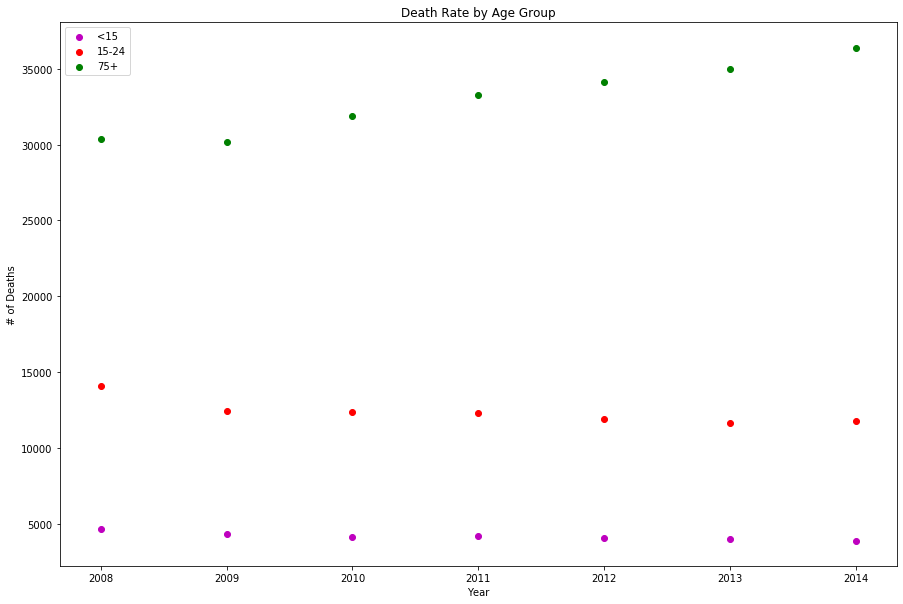

In [86]:
#graph with number of deaths as y-var
x = all_age_race_sex_mech['Year']

y_child = child_race_sex_mech['Deaths']
y_teen = teen_race_sex_mech['Deaths']
y_eld = eld_race_sex_mech['Deaths']

plt.figure(figsize=(15,10))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_child, color = 'm', label="<15")
plt.title("Death Rate by Age Group")
plt.scatter(x, y_teen, color = 'r', label="15-24")
plt.scatter(x, y_eld, color = 'g', label='75+')
plt.legend()



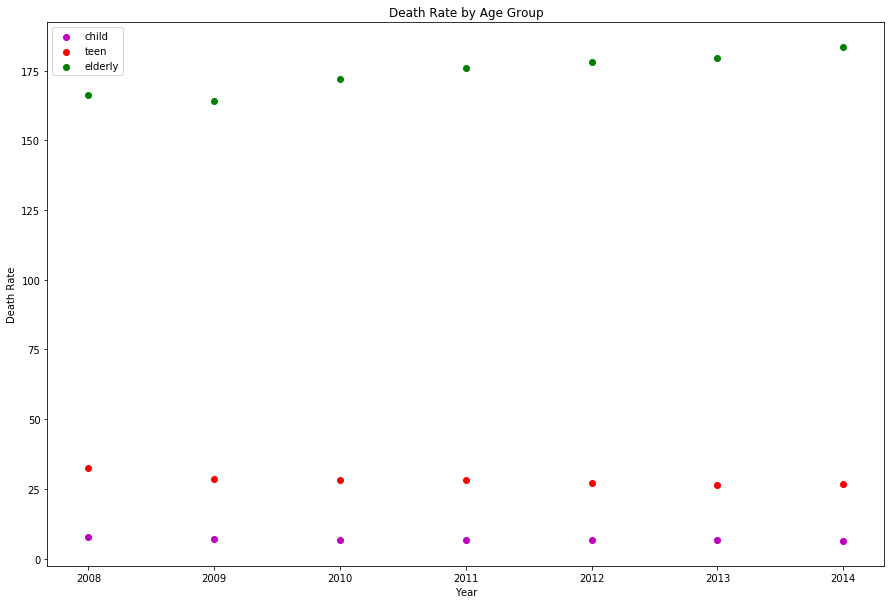

In [87]:
#graph with death rate as y-var
x = all_age_race_sex_mech['Year']

y_child = child_race_sex_mech['Age Specific Rate']
y_teen = teen_race_sex_mech['Age Specific Rate']
y_eld = eld_race_sex_mech['Age Specific Rate']

plt.figure(figsize=(15,10))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_child, color = 'm',label="child")
plt.scatter(x, y_teen, color = 'r',label="teen")
plt.scatter(x, y_eld, color = 'g',label="elderly")
plt.title("Death Rate by Age Group")
plt.legend()


Based off of the previous analysis, it is evident that as the population becomes older, they are more likely to die as a result of an unintentional injury. This is based off of both the number of deaths annually along with the adjusted age specific rate for each age group. While there is data missing for both sexes of all races in the ages 25-74, it is still clear that th elderly population is more suseptible to accidental deaths.



Now, let's break down each injury mechanism while we hold all ages and races constant. We will compare the death rates of each mechanism amongst females and males.

#### <a name="drowning"></a> Drowning

In [88]:
drown = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Drowning']
drown = drown.sort_values('Year')
drown_both = drown.loc[drown['Sex'] == 'Both sexes']
drown_f = drown.loc[drown['Sex'] == 'Female']
drown_m = drown.loc[drown['Sex'] == 'Male']

Graph with number of deaths annually

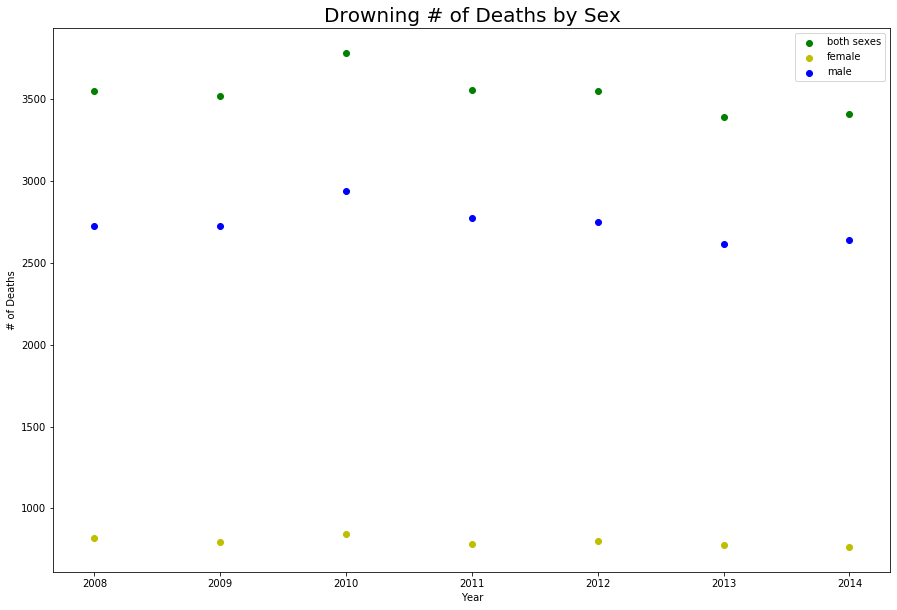

In [89]:
x = drown_both['Year']

y_both = drown_both['Deaths']
y_f = drown_f['Deaths']
y_m = drown_m['Deaths']

plt.figure(figsize=(15,10))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = "both sexes")
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Drowning # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

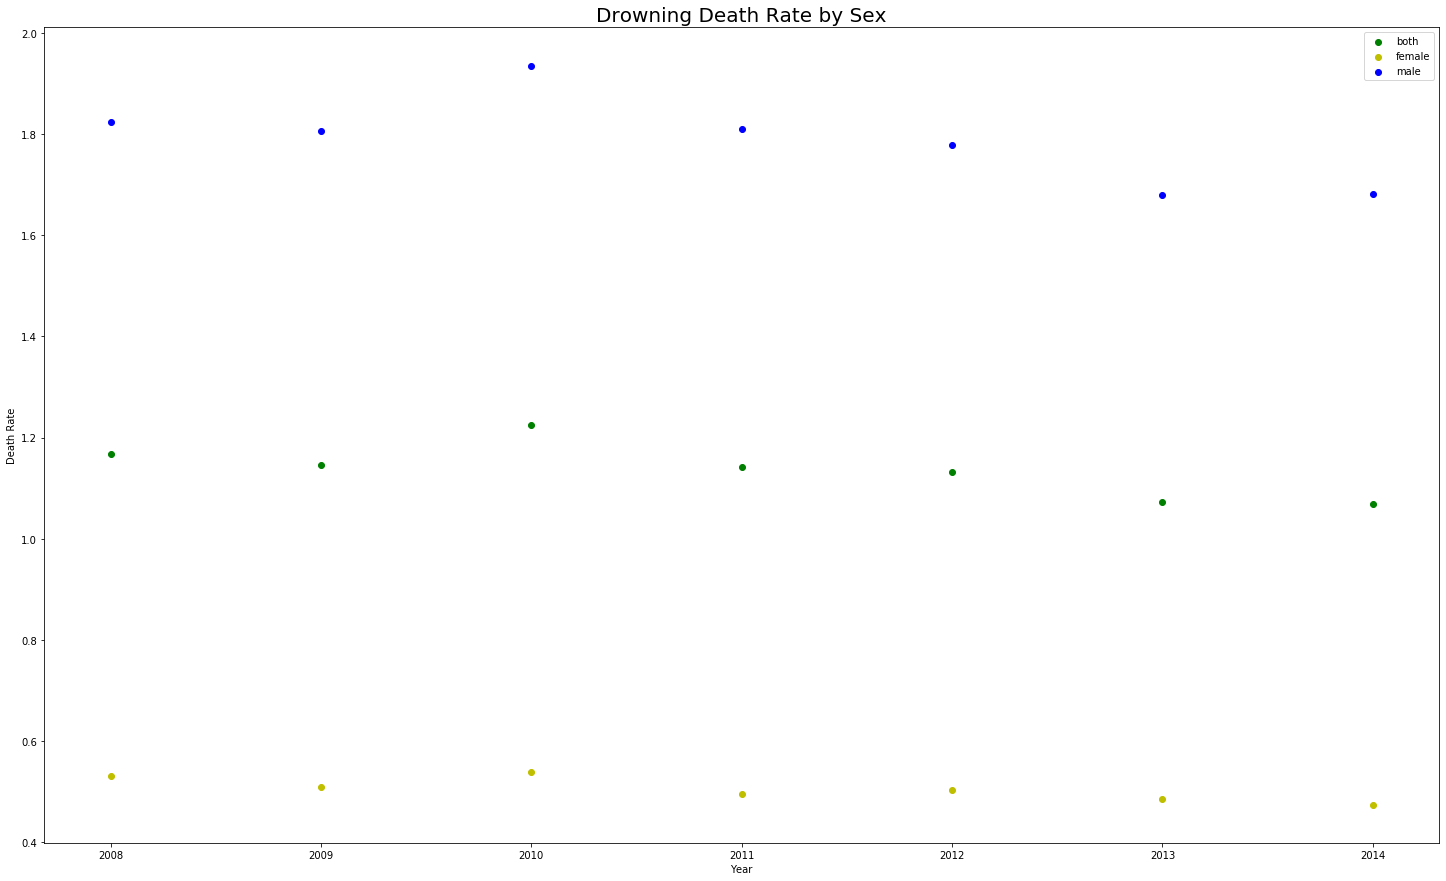

In [90]:
x = drown_both['Year']

y_both = drown_both['Age Specific Rate']
y_f = drown_f['Age Specific Rate']
y_m = drown_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Drowning Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="fall"></a> Fall

In [91]:
fall = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Fall']
fall = fall.sort_values('Year')
fall_both = fall.loc[fall['Sex'] == 'Both sexes']
fall_f = fall.loc[fall['Sex'] == 'Female']
fall_m = fall.loc[fall['Sex'] == 'Male']


Graph with number of deaths annually

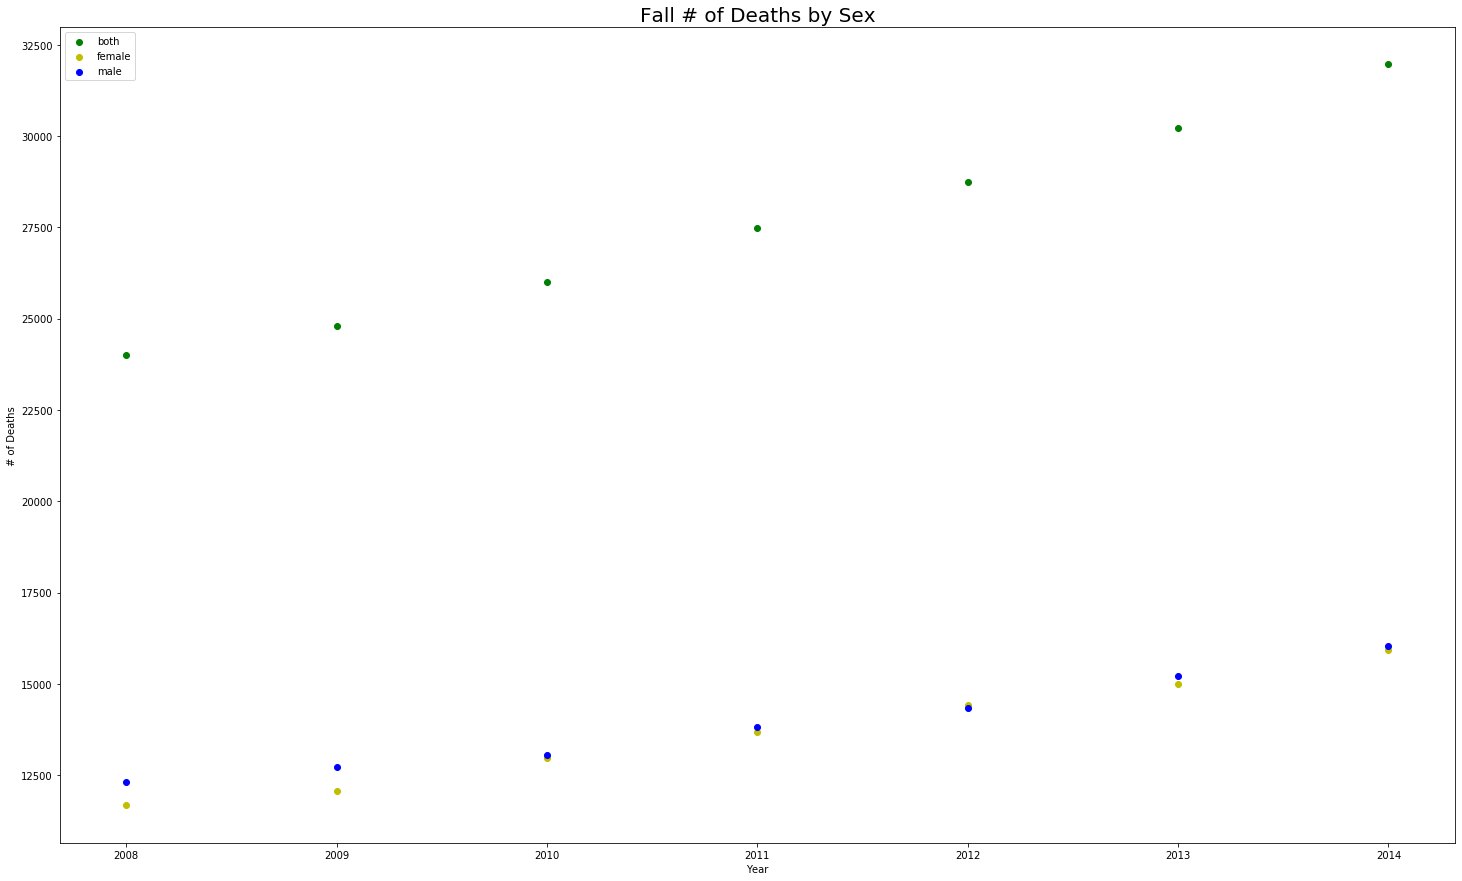

In [92]:
x = fall_both['Year']

y_both = fall_both['Deaths']
y_f = fall_f['Deaths']
y_m = fall_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Fall # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

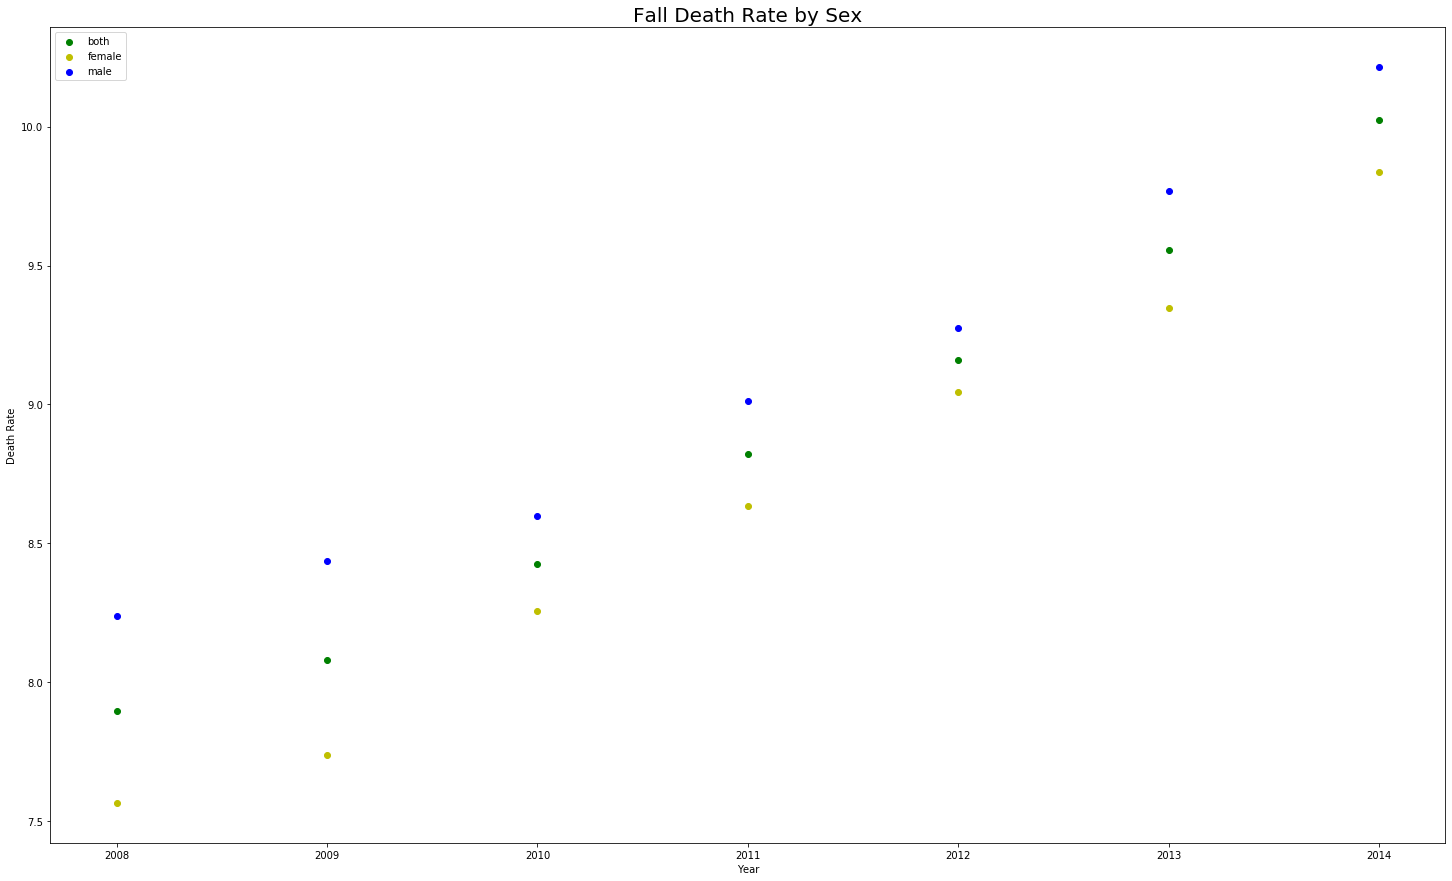

In [93]:
x = fall_both['Year']

y_both = fall_both['Age Specific Rate']
y_f = fall_f['Age Specific Rate']
y_m = fall_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Fall Death Rate by Sex", fontsize=20)
plt.legend()

There is not a large difference in death due to falls in terms of gender, they are actually almost equal. This is different from previous analyses.

#### <a name="firearms"></a> Firearms

In [94]:
fa = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Firearm']
fa = fa.sort_values('Year')
fa_both = fa.loc[fa['Sex'] == 'Both sexes']
fa_f = fa.loc[fa['Sex'] == 'Female']
fa_m = fa.loc[fa['Sex'] == 'Male']


Graph with number of deaths annually

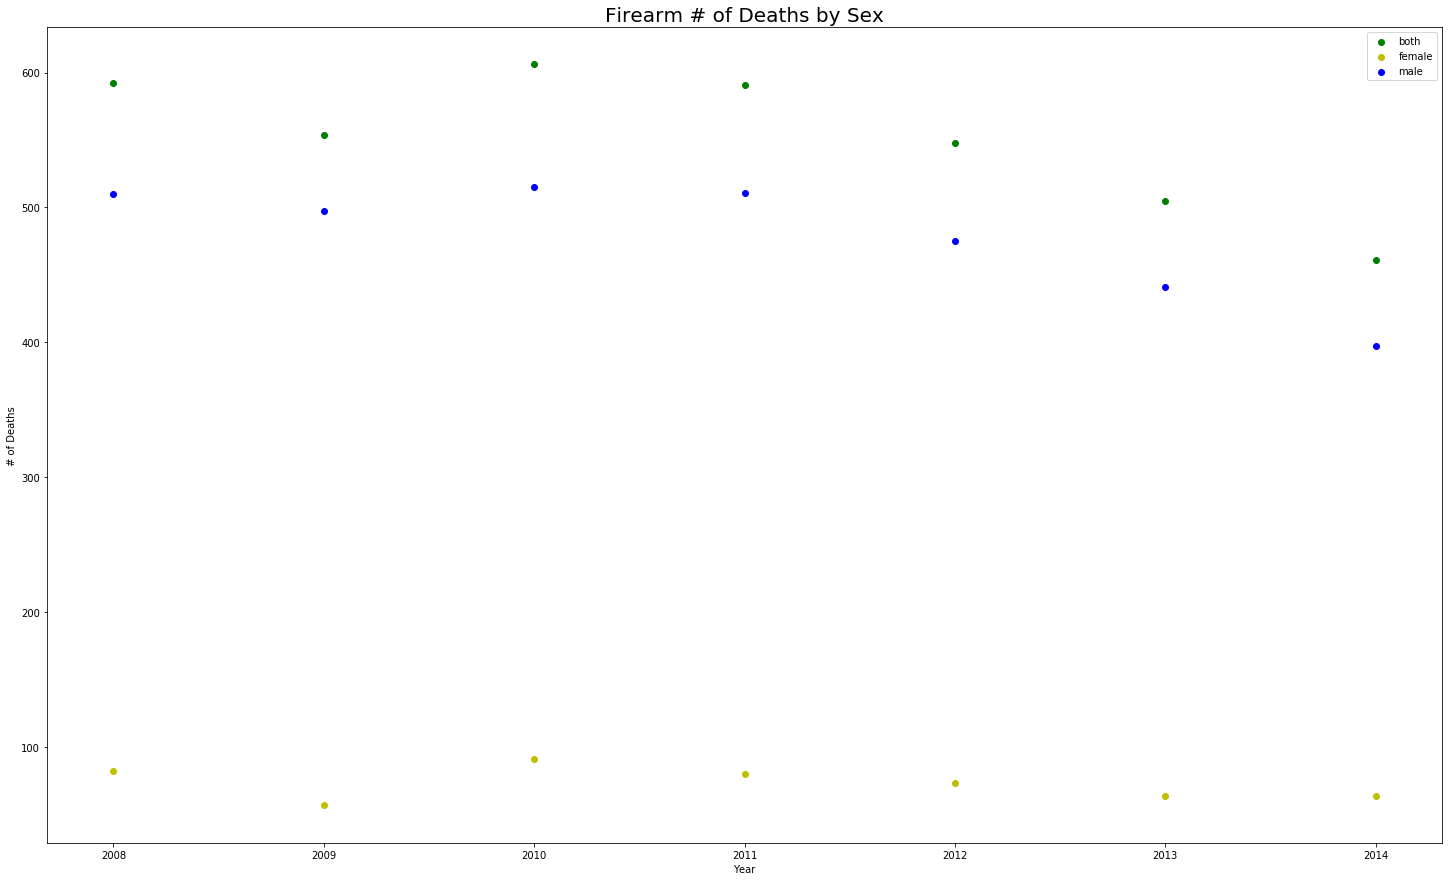

In [95]:
x = fa_both['Year']

y_both = fa_both['Deaths']
y_f = fa_f['Deaths']
y_m = fa_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Firearm # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

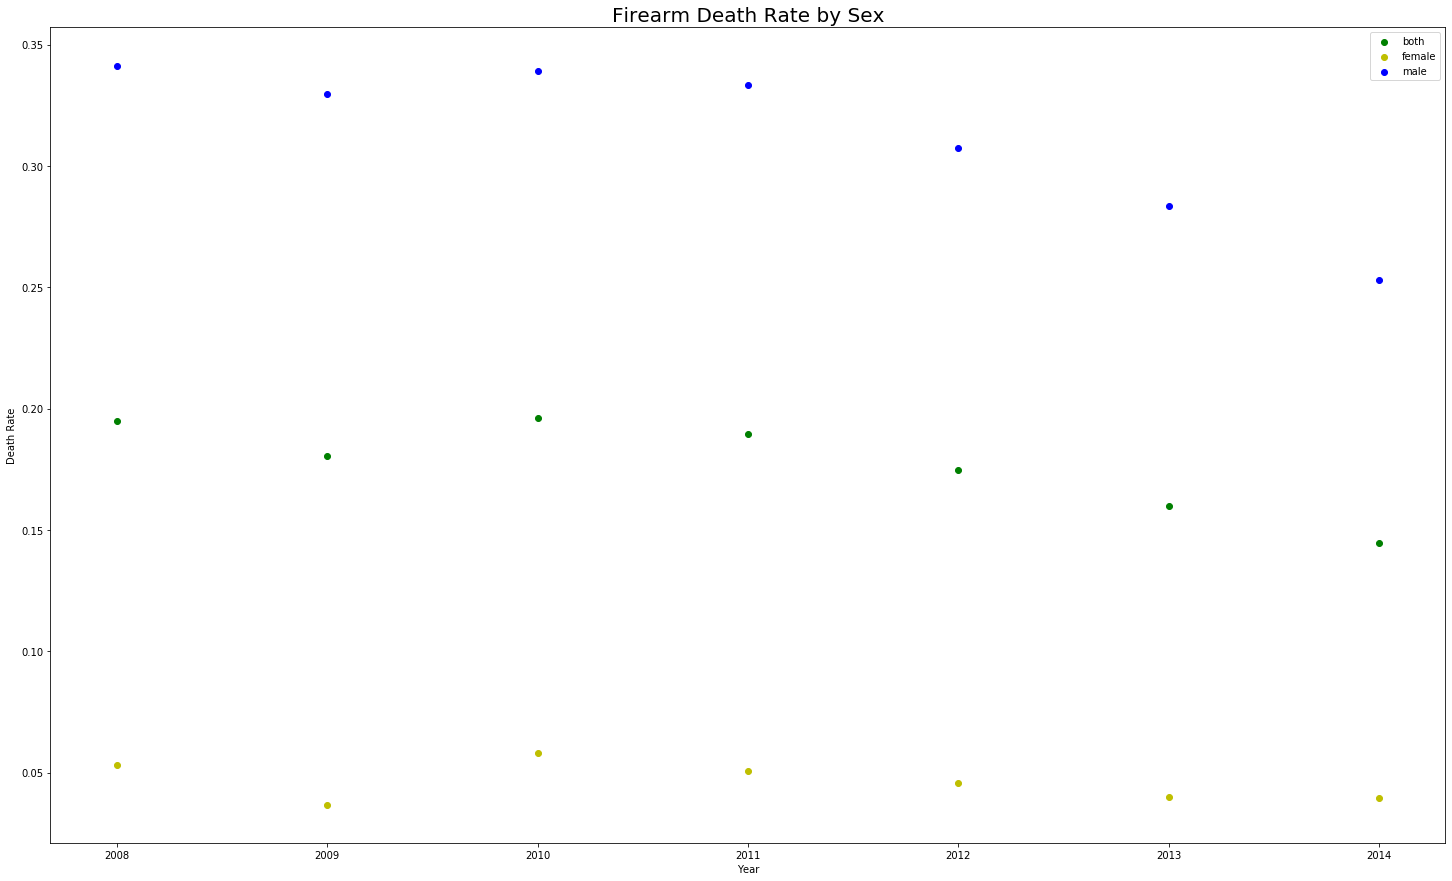

In [96]:
x = fa_both['Year']

y_both = fa_both['Age Specific Rate']
y_f = fa_f['Age Specific Rate']
y_m = fa_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Firearm Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="cp"></a> Cut/pierce

In [97]:
cp = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Cut/pierce']
cp = cp.sort_values('Year')
cp_both = cp.loc[cp['Sex'] == 'Both sexes']
cp_f = cp.loc[cp['Sex'] == 'Female']
cp_m = cp.loc[cp['Sex'] == 'Male']

Graph with number of deaths annually

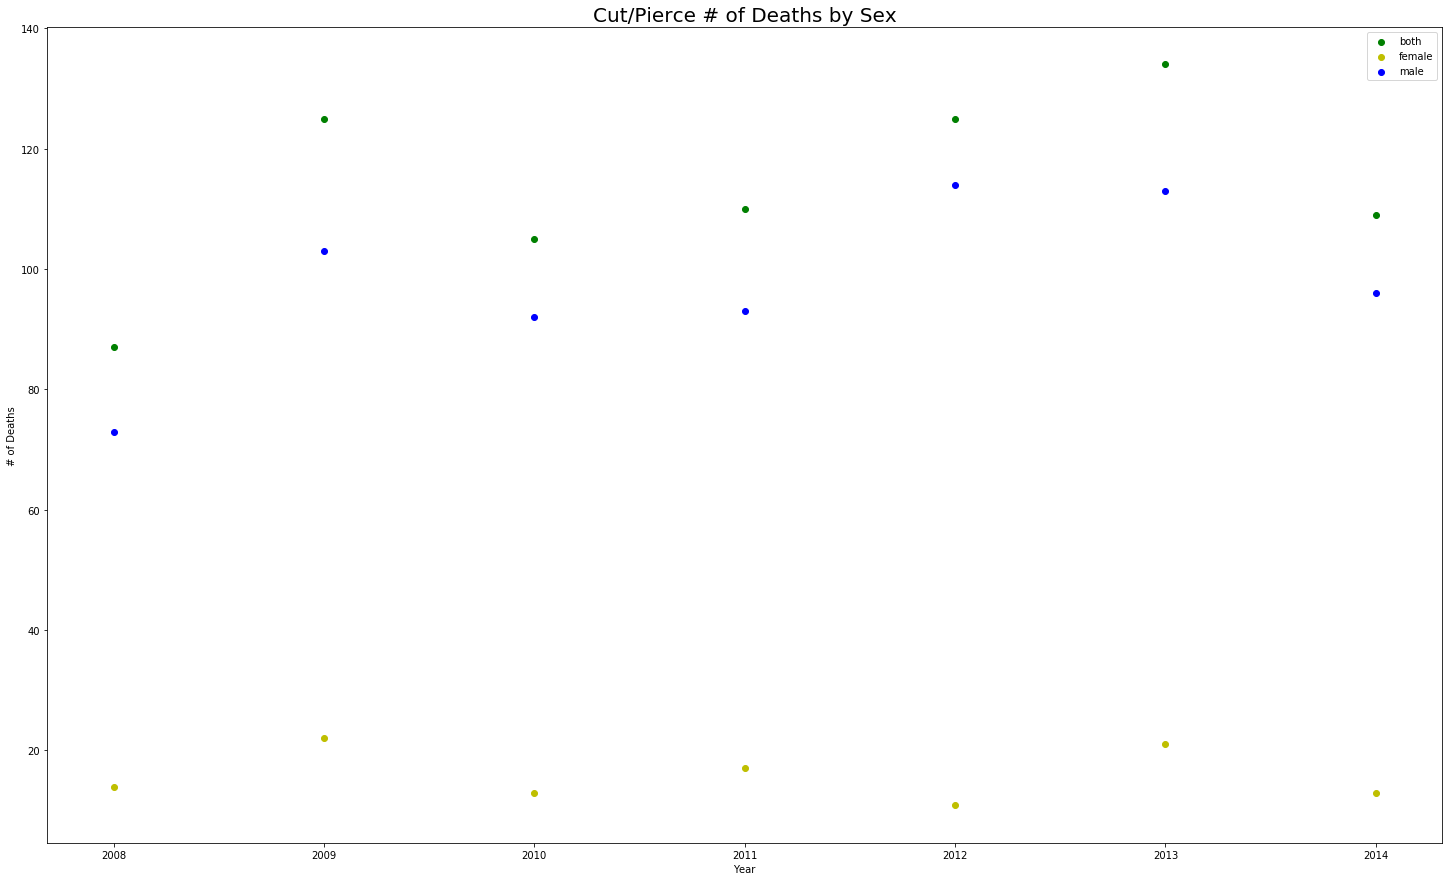

In [98]:
x = cp_both['Year']

y_both = cp_both['Deaths']
y_f = cp_f['Deaths']
y_m = cp_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Cut/Pierce # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

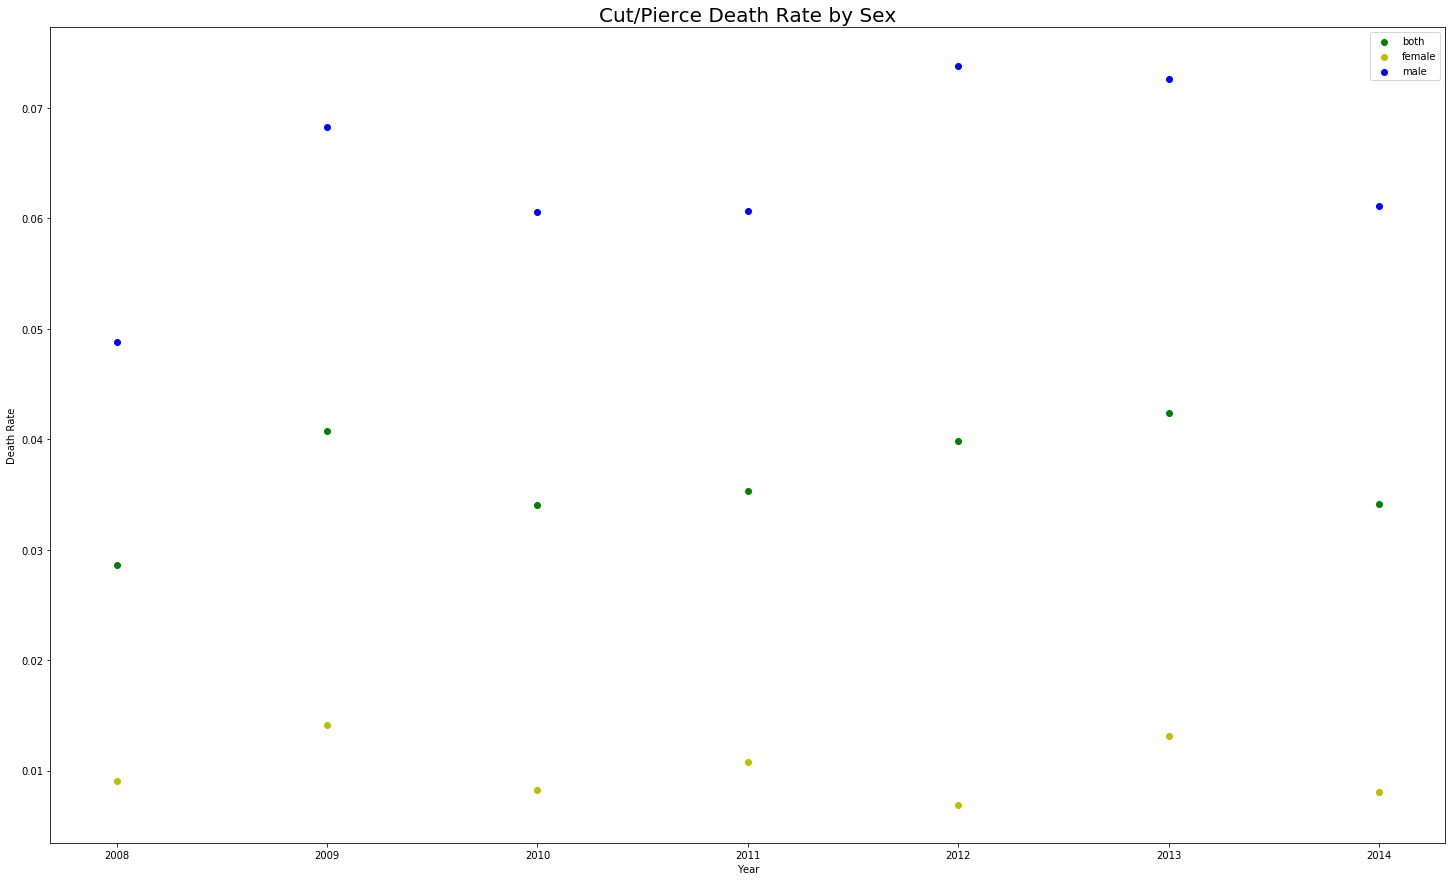

In [99]:
x = cp_both['Year']

y_both = cp_both['Age Specific Rate']
y_f = cp_f['Age Specific Rate']
y_m = cp_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Cut/Pierce Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="fire"></a> Fire/hot object or substance

In [100]:
fire = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Fire/hot object or substance']
fire = fire.sort_values('Year')
fire_both = fire.loc[fire['Sex'] == 'Both sexes']
fire_f = fire.loc[fire['Sex'] == 'Female']
fire_m = fire.loc[fire['Sex'] == 'Male']

Graph with number of deaths annually

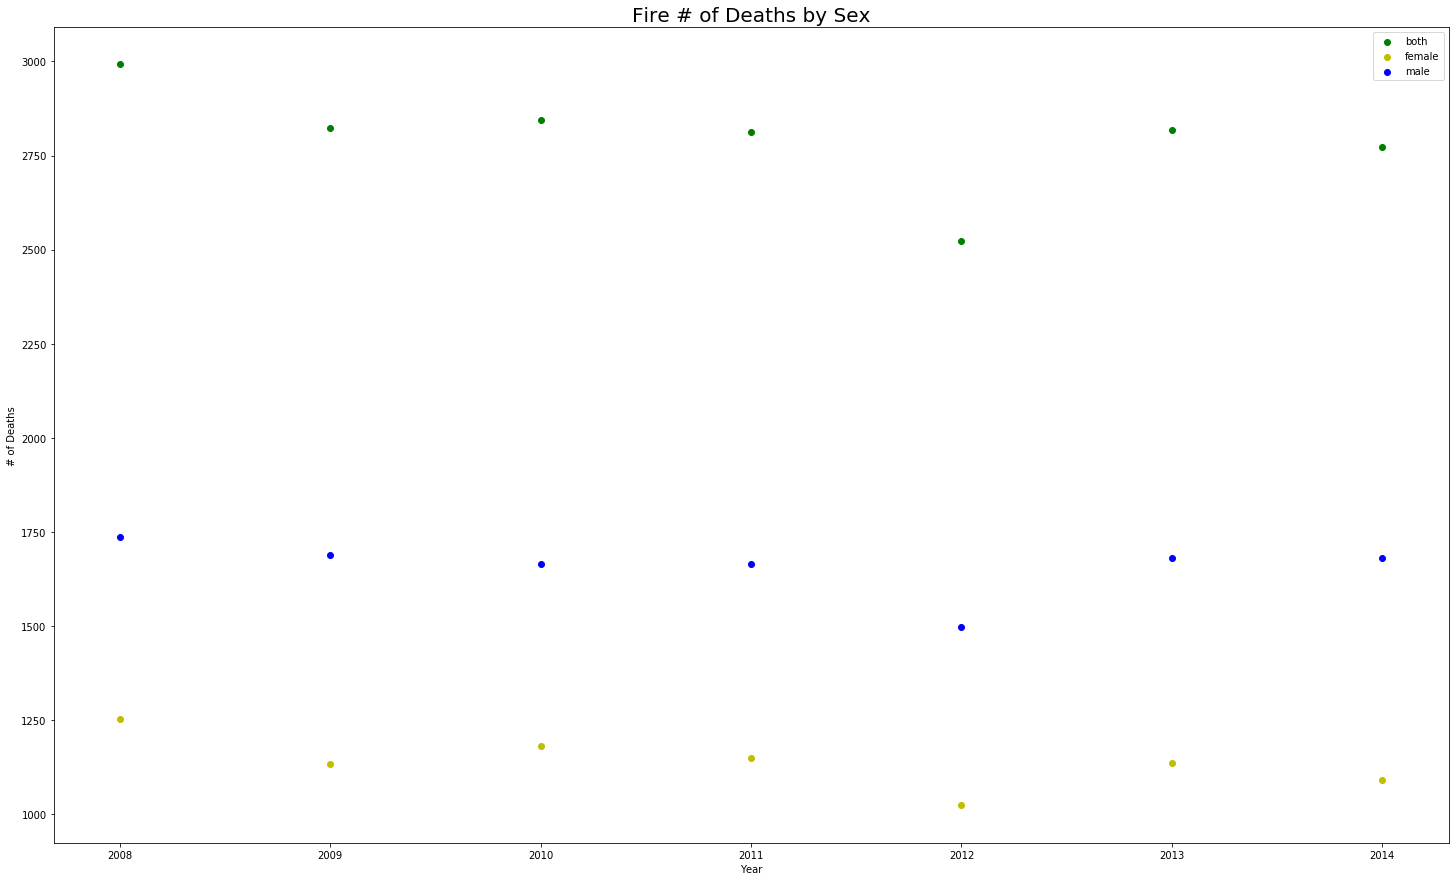

In [101]:
x = fire_both['Year']

y_both = fire_both['Deaths']
y_f = fire_f['Deaths']
y_m = fire_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Fire # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

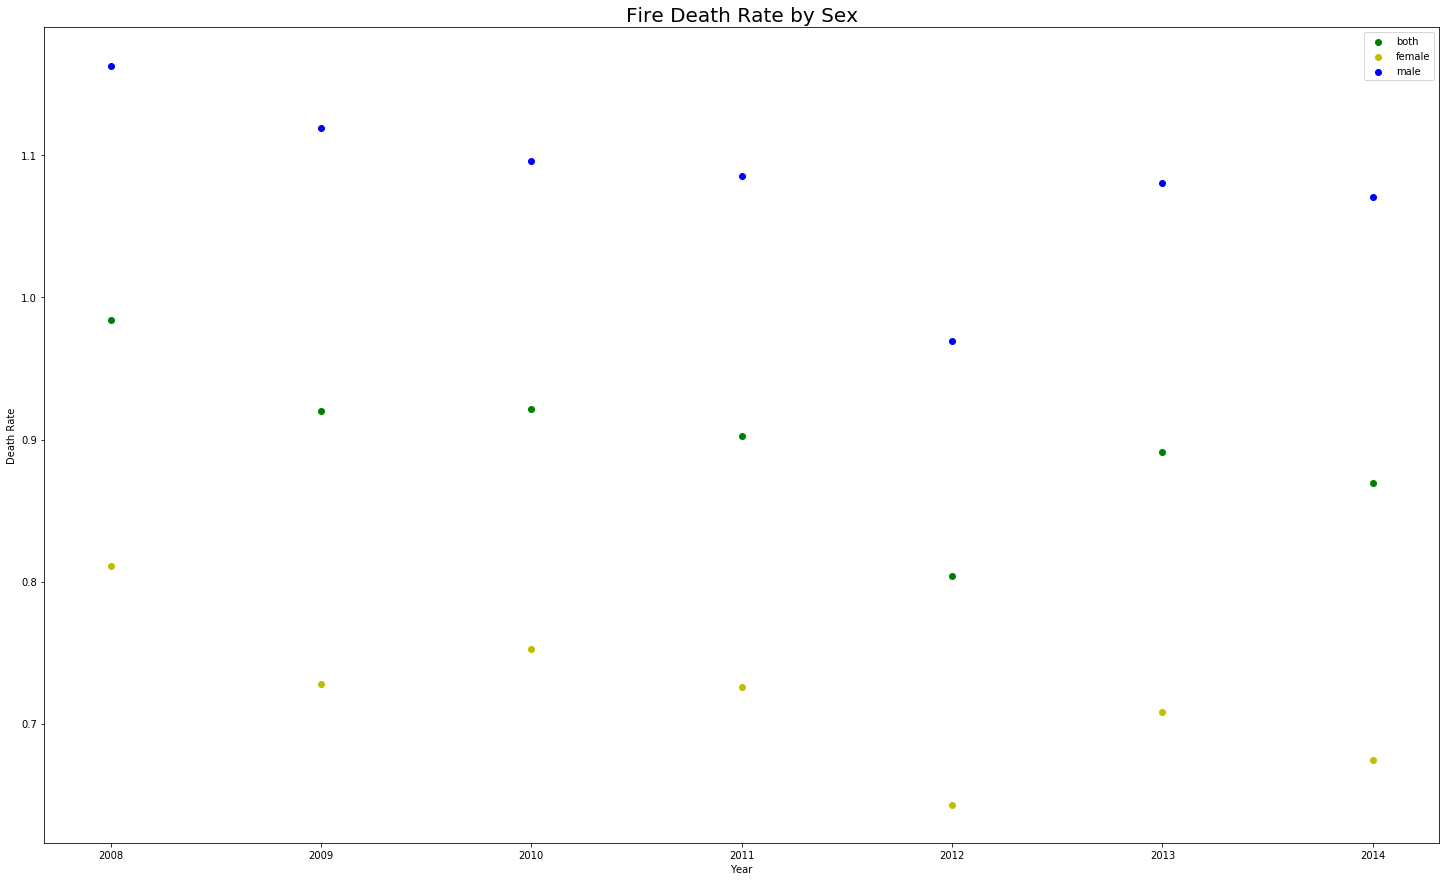

In [102]:
x = fire_both['Year']

y_both = fire_both['Age Specific Rate']
y_f = fire_f['Age Specific Rate']
y_m = fire_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Fire Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="m"></a> Motor vehicle traffic

In [103]:
m = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Motor vehicle traffic']
m = m.sort_values('Year')
m_both = m.loc[m['Sex'] == 'Both sexes']
m_f = m.loc[m['Sex'] == 'Female']
m_m = m.loc[m['Sex'] == 'Male']

Graph with number of deaths annually

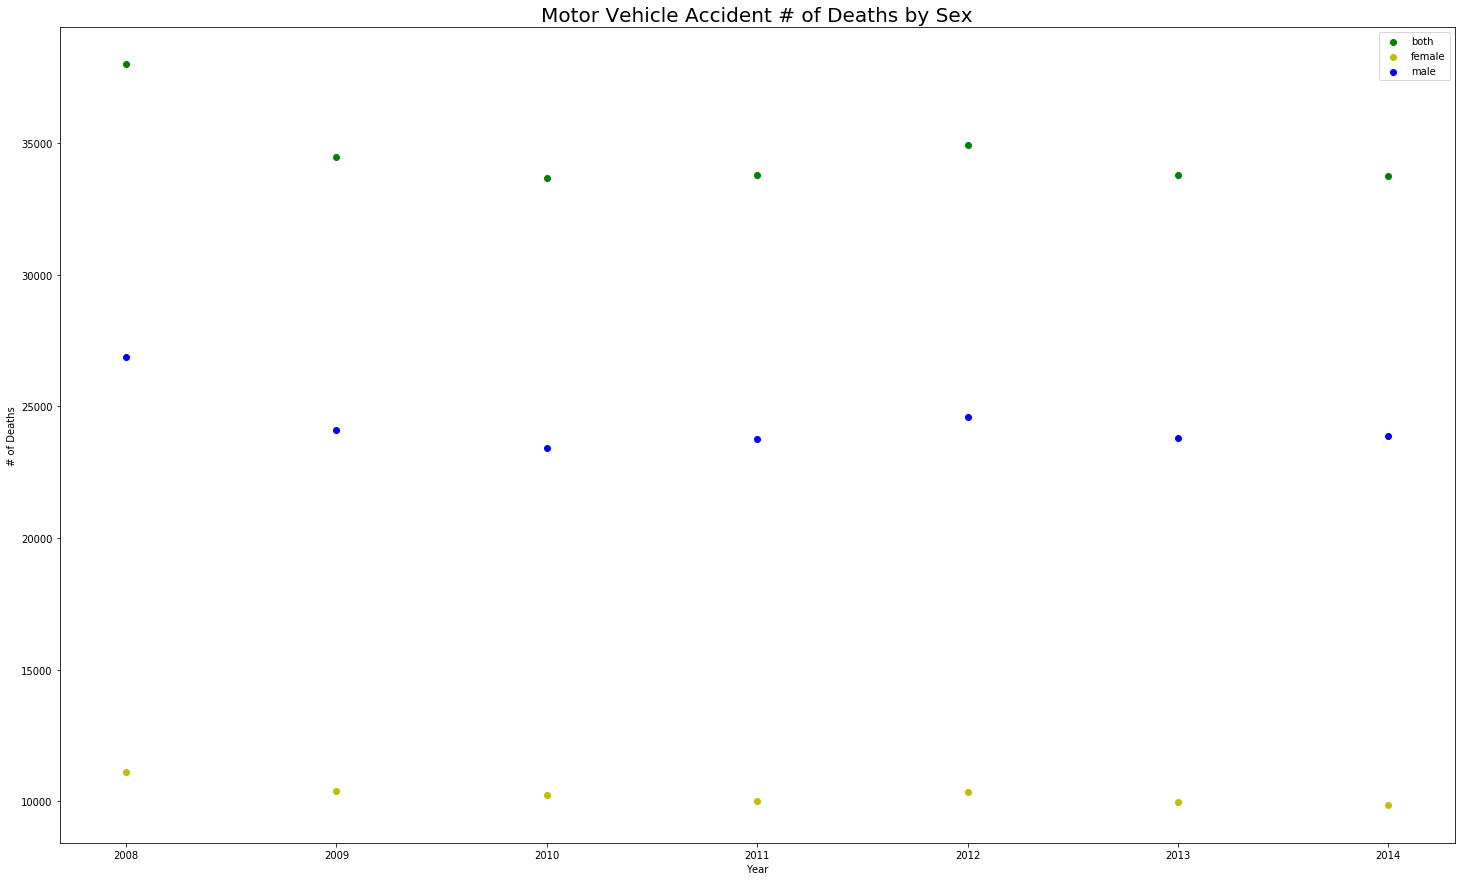

In [104]:
x = m_both['Year']

y_both = m_both['Deaths']
y_f = m_f['Deaths']
y_m = m_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Motor Vehicle Accident # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

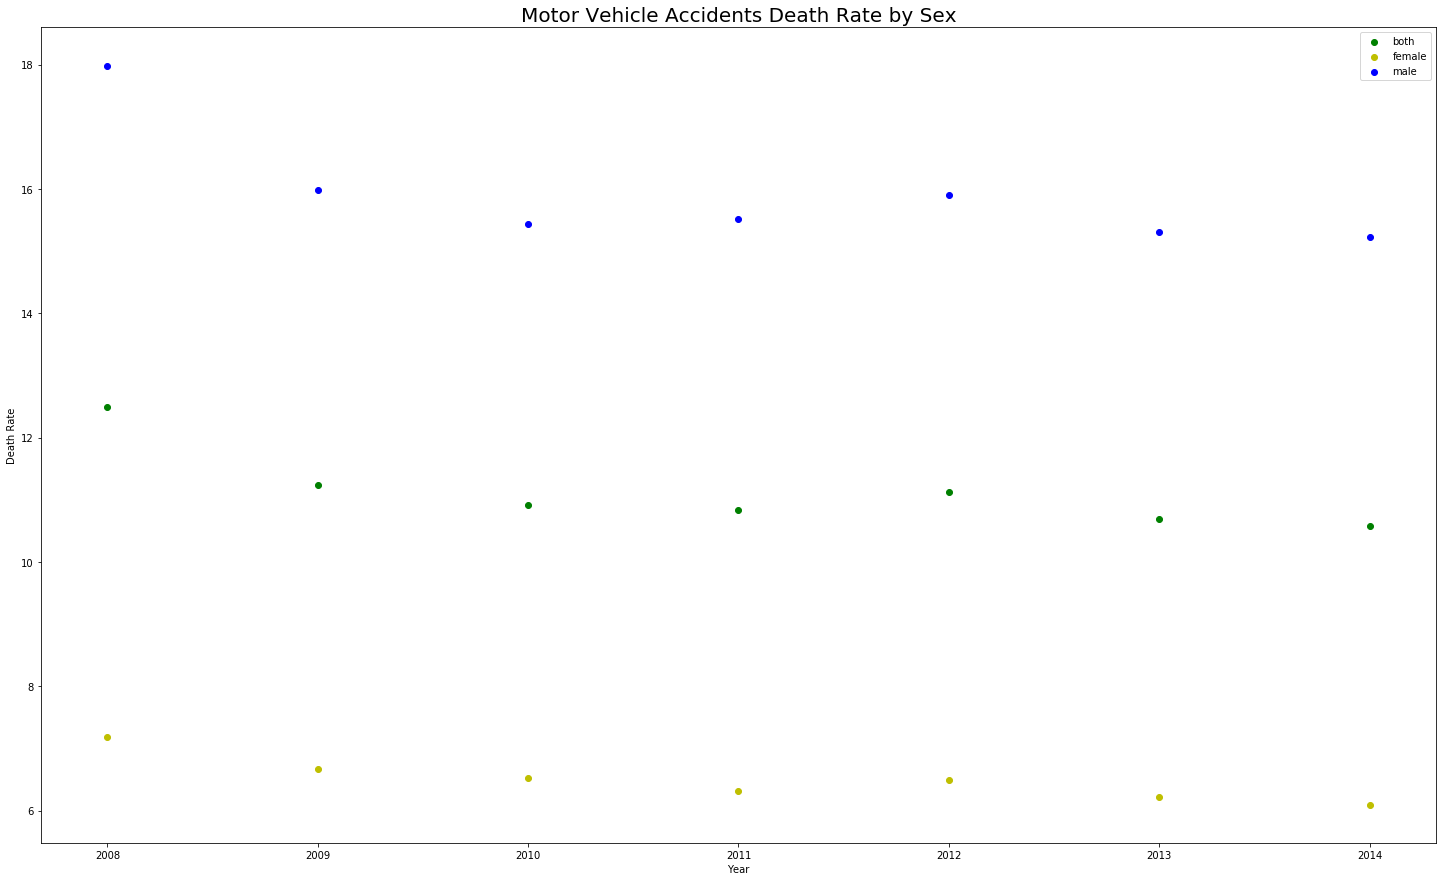

In [105]:
x = m_both['Year']

y_both = m_both['Age Specific Rate']
y_f = m_f['Age Specific Rate']
y_m = m_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Motor Vehicle Accidents Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="o"></a> All Other Transport

In [106]:
o = all_age_race.loc[all_age_race['Injury Mechanism'] == 'All Other Transport']
o = o.sort_values('Year')
o_both = o.loc[o['Sex'] == 'Both sexes']
o_f = o.loc[o['Sex'] == 'Female']
o_m = o.loc[o['Sex'] == 'Male']

Graph with number of deaths annually

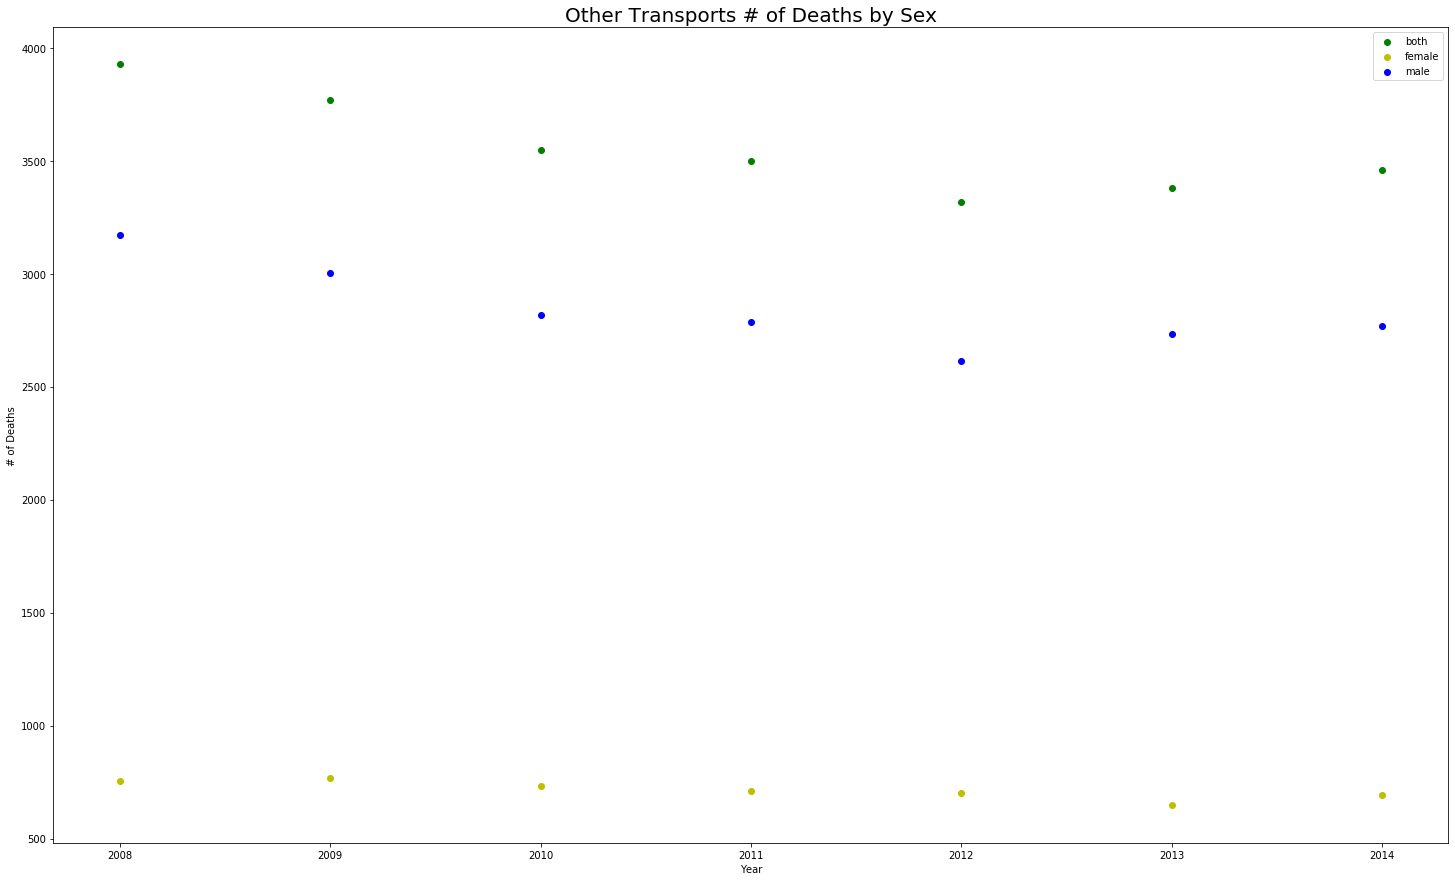

In [107]:
x = o_both['Year']

y_both = o_both['Deaths']
y_f = o_f['Deaths']
y_m = o_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Other Transports # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

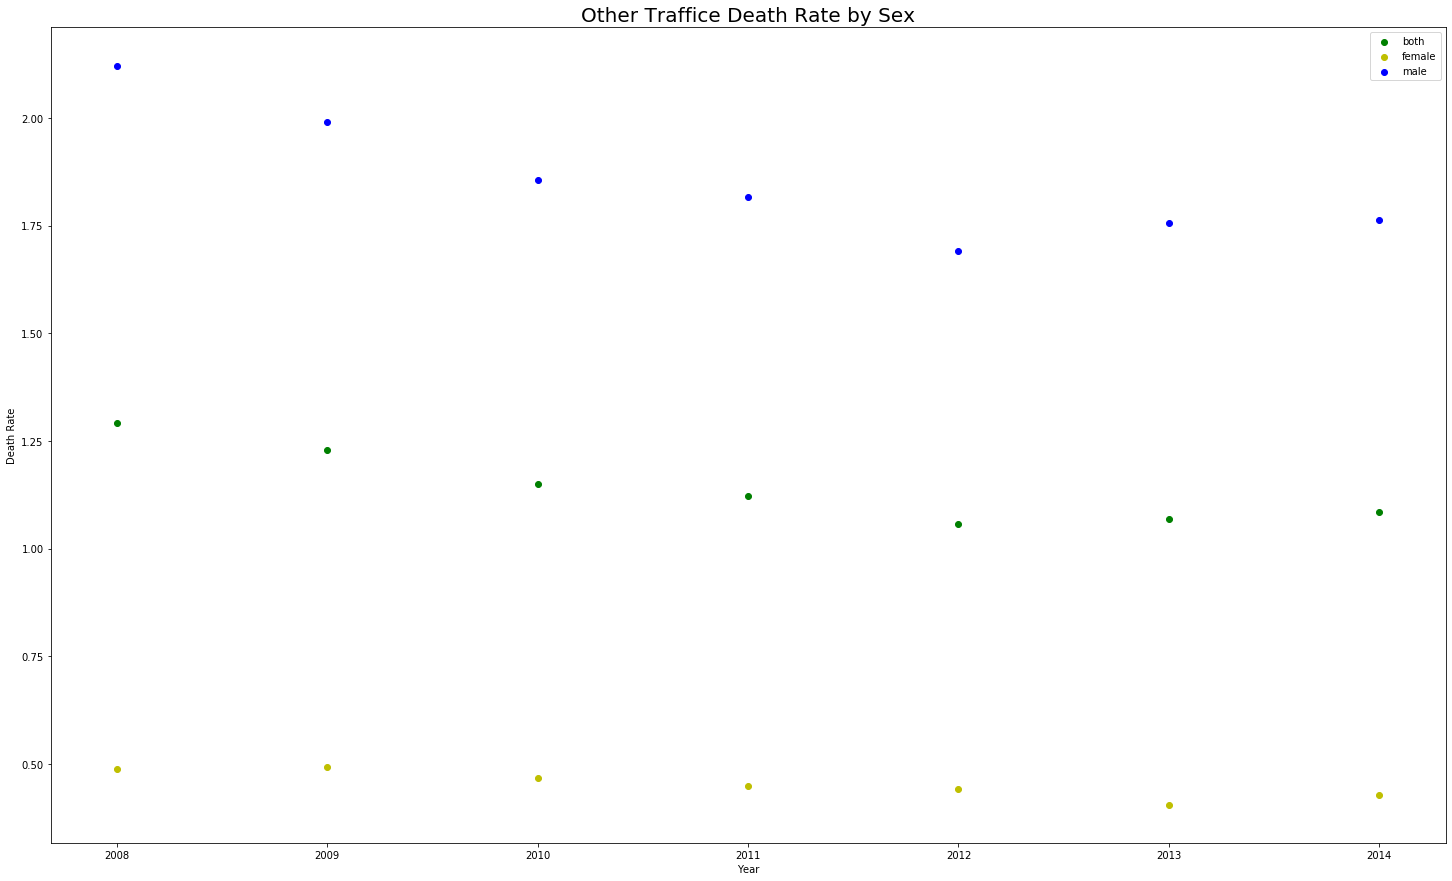

In [108]:
x = o_both['Year']

y_both = o_both['Age Specific Rate']
y_f = o_f['Age Specific Rate']
y_m = o_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Other Traffice Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="p"></a> Poisoning

In [109]:
p = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Poisoning']
p = p.sort_values('Year')
p_both = p.loc[p['Sex'] == 'Both sexes']
p_f = p.loc[p['Sex'] == 'Female']
p_m = p.loc[p['Sex'] == 'Male']

Graph with number of deaths annually

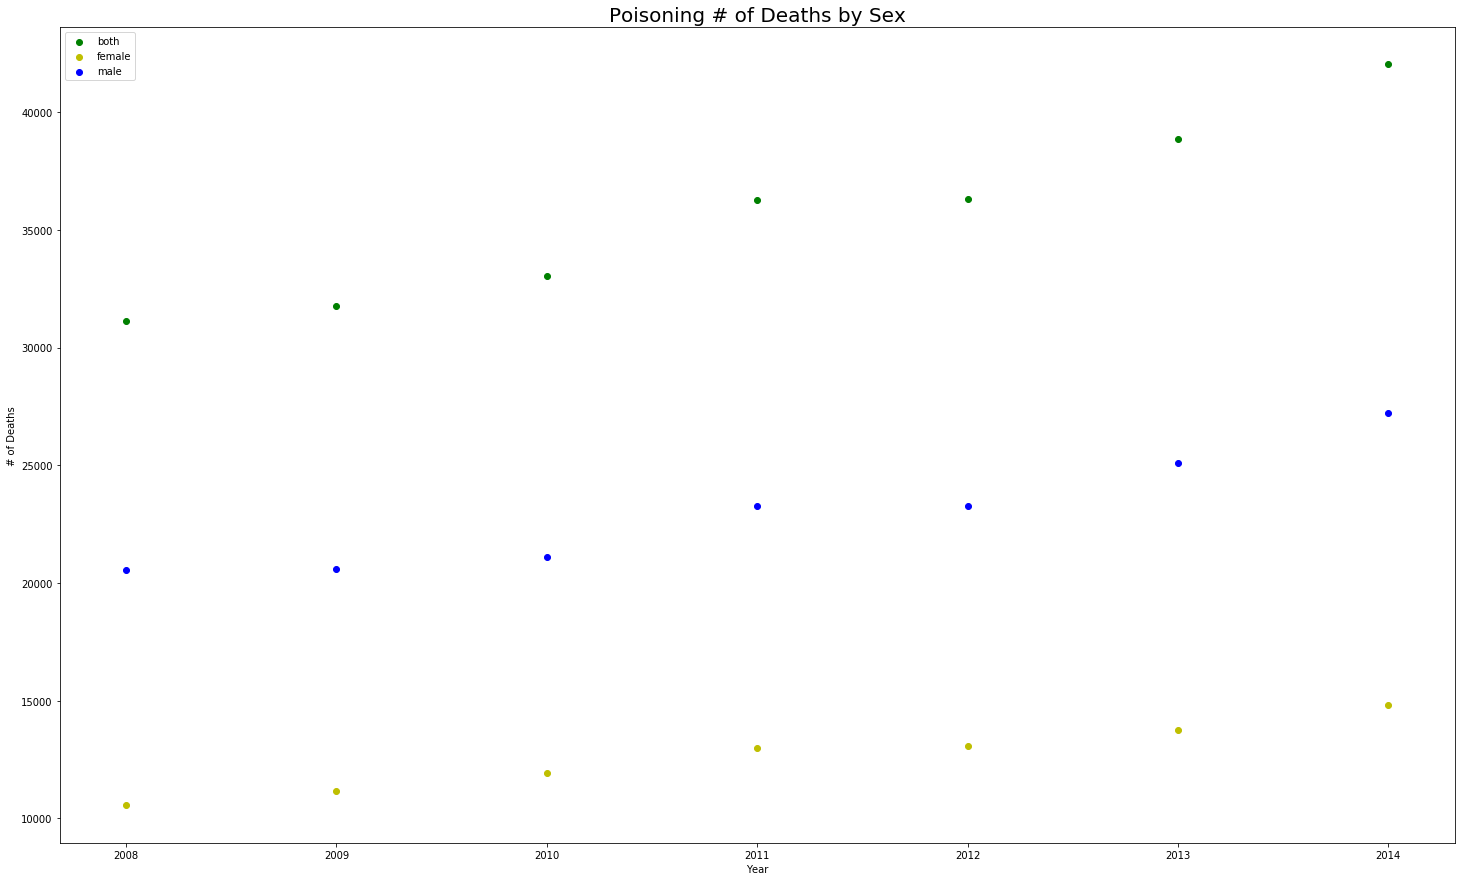

In [110]:
x = p_both['Year']

y_both = p_both['Deaths']
y_f = p_f['Deaths']
y_m = p_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Poisoning # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

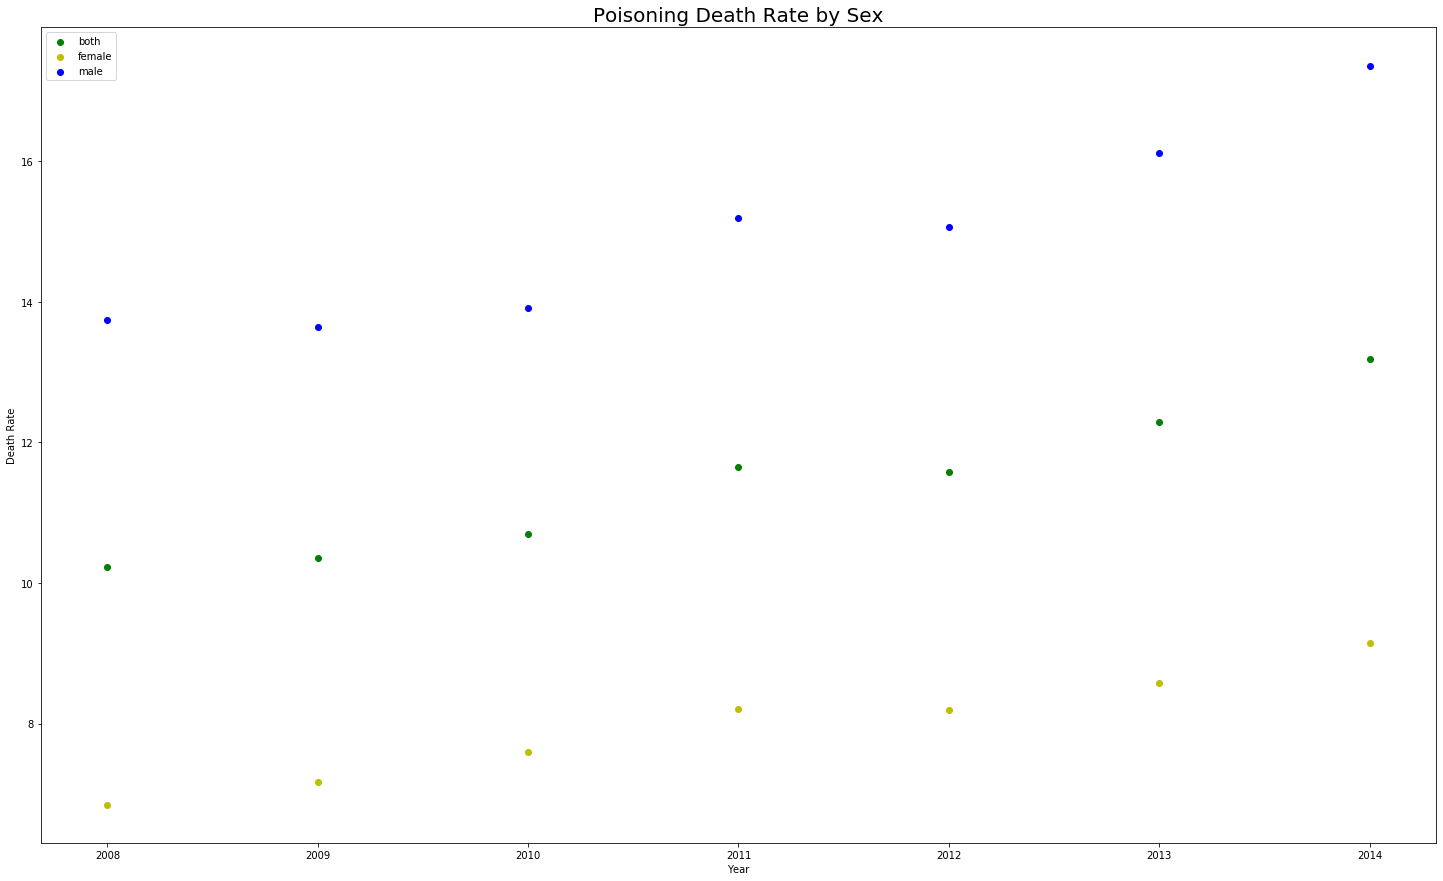

In [111]:
x = p_both['Year']

y_both = p_both['Age Specific Rate']
y_f = p_f['Age Specific Rate']
y_m = p_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Poisoning Death Rate by Sex", fontsize = 20)
plt.legend()

#### <a name="s"></a> Suffocation

In [112]:
s = all_age_race.loc[all_age_race['Injury Mechanism'] == 'Suffocation']
s = s.sort_values('Year')
s_both = s.loc[s['Sex'] == 'Both sexes']
s_f = s.loc[s['Sex'] == 'Female']
s_m = s.loc[s['Sex'] == 'Male']

Graph with number of deaths annually

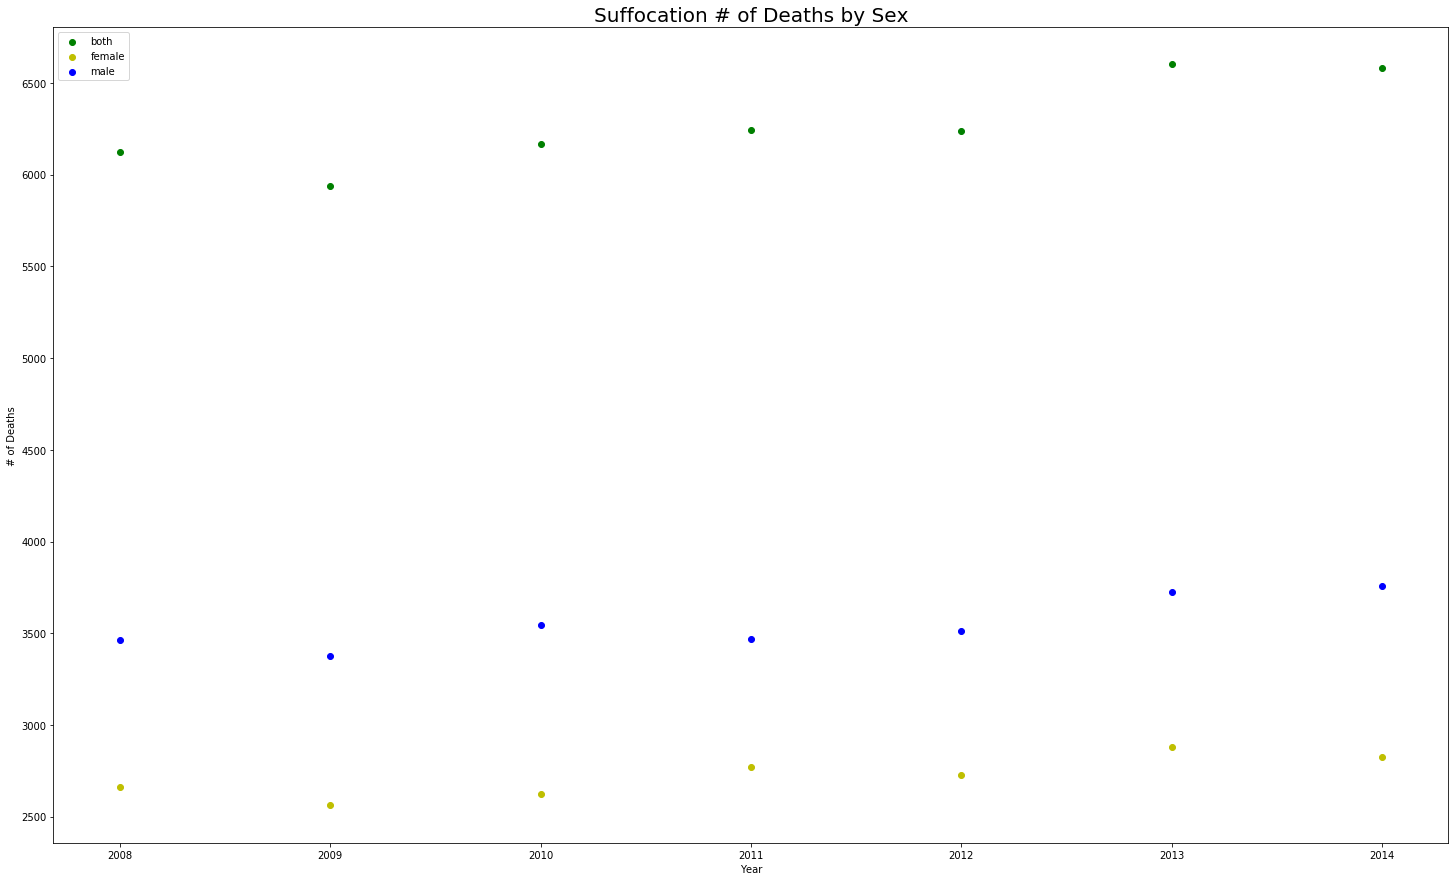

In [113]:
x = s_both['Year']

y_both = s_both['Deaths']
y_f = s_f['Deaths']
y_m = s_m['Deaths']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g', label = 'both')
plt.scatter(x, y_f, color = 'y', label = 'female')
plt.scatter(x, y_m, color = 'b', label = 'male')
plt.title("Suffocation # of Deaths by Sex", fontsize = 20)
plt.legend()

Graph with annual death rate

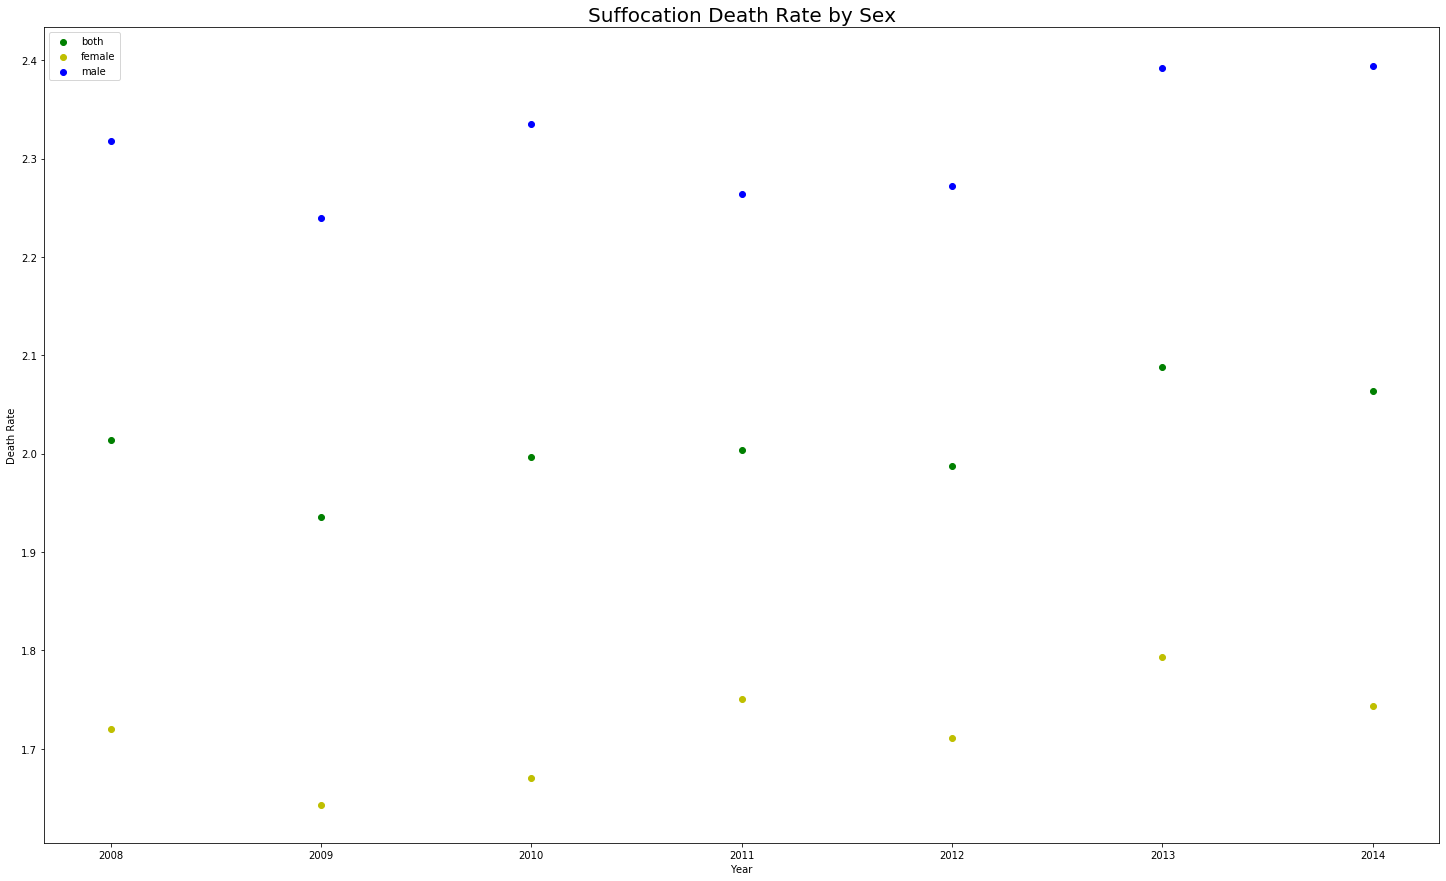

In [114]:
x = s_both['Year']

y_both = s_both['Age Specific Rate']
y_f = s_f['Age Specific Rate']
y_m = s_m['Age Specific Rate']

plt.figure(figsize=(25,15))
plt.ylabel('Death Rate')
plt.xlabel('Year')

plt.scatter(x, y_both, color = 'g',label='both')
plt.scatter(x, y_f, color = 'y', label='female')
plt.scatter(x, y_m, color = 'b', label='male')
plt.title("Suffocation Death Rate by Sex",fontsize=20)
plt.legend()

As we can see from the above graphs, the results are quite consistent. Males typically have a higher death rate from each injury mechanism, which makes sense as they have a high death rate when comparing it with all injury mechanisms. However, the only mechanism that fell outside of this pattern was for falls. Females and males had a very close death rater due to falls, which was unique.

### <a name="comparison_mechanisms"></a> c. Comparison of Each Mechanism

Comparison of all races, sexes, ages and their annual death rate for each cause of unintentional injury

In [115]:
labels = s_both['Year']
y_s = s_both['Age Specific Rate'] #suffocation
y_p = p_both['Age Specific Rate'] #poisoning
y_o = o_both['Age Specific Rate'] #all other transport
y_m = m_both['Age Specific Rate'] #motor vehicle traffic
y_fire = fire_both['Age Specific Rate'] #fire/hot object or substance
y_cp = cp_both['Age Specific Rate'] #cut/pierce
y_fa = fa_both['Age Specific Rate'] #firearm
y_fall = fall_both['Age Specific Rate'] #fall
y_drown = drown_both['Age Specific Rate'] #drown

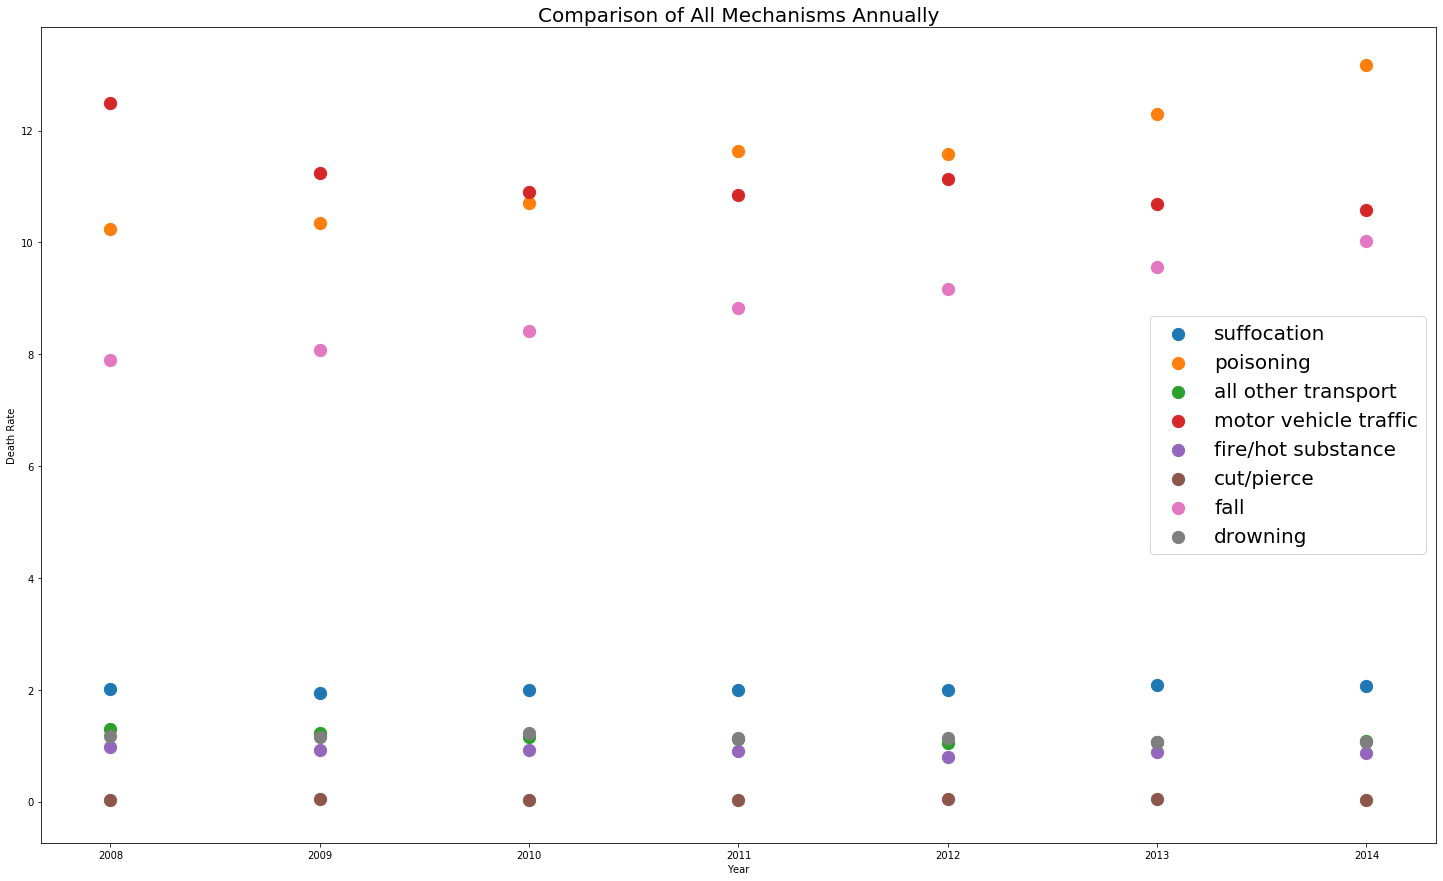

In [116]:
plt.figure(figsize=(25,15))
plt.scatter(labels, y_s, s=150, label = 'suffocation')
plt.scatter(labels, y_p, s=150, label = 'poisoning')
plt.scatter(labels, y_o, s=150, label = 'all other transport')
plt.scatter(labels, y_m, s=150, label = 'motor vehicle traffic')
plt.scatter(labels, y_fire, s=150, label = 'fire/hot substance')
plt.scatter(labels, y_cp, s=150, label = 'cut/pierce')
plt.scatter(labels, y_fall, s=150, label = 'fall')
plt.scatter(labels, y_drown, s=150, label = 'drowning')
plt.legend(loc='right', prop={'size': 20})
plt.ylabel('Death Rate')
plt.xlabel('Year')
plt.title('Comparison of All Mechanisms Annually', fontsize=20)
plt.show()

From our analysis, we can see that poisoning, motor vehicle traffic, and falls make the top 3 highest rates of death for unintentional injuries in the US. In poisoning and falls, we can see that the rates are steadily increasing with each year. Meanwhile, the rate for death by moter vehicle transport is decreasing across this time frame. The other 5 mechanisms are significantly lower in death rate and are constant across the interval.

### <a name="regression_ui"></a> d. Regression

In [117]:
import statsmodels.formula.api as smf

First, a multiple regression where we examine the factors of Age Group, Sex, and Race

In [118]:
reg = smf.ols('Q("Age Specific Rate") ~ Q("Age Group (Years)") + Sex + Race',mech).fit()
print(reg.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Age Specific Rate")   R-squared:                       0.898
Model:                                OLS   Adj. R-squared:                  0.896
Method:                     Least Squares   F-statistic:                     462.8
Date:                    Wed, 13 May 2020   Prob (F-statistic):          1.62e-277
Time:                            20:04:57   Log-Likelihood:                -2415.3
No. Observations:                     588   AIC:                             4855.
Df Residuals:                         576   BIC:                             4907.
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Next, a regression where we examine the effects of Age Group and Sex.

In [119]:
reg = smf.ols('Q("Age Specific Rate") ~ Q("Age Group (Years)") + Sex',race_mech).fit()
print(reg.summary())


                              OLS Regression Results                              
Dep. Variable:     Q("Age Specific Rate")   R-squared:                       0.989
Model:                                OLS   Adj. R-squared:                  0.988
Method:                     Least Squares   F-statistic:                     1509.
Date:                    Wed, 13 May 2020   Prob (F-statistic):          2.65e-130
Time:                            20:04:57   Log-Likelihood:                -463.44
No. Observations:                     147   AIC:                             944.9
Df Residuals:                         138   BIC:                             971.8
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Lastly, a regression where we examine the effects of Age Group

In [120]:
reg = smf.ols('Q("Age Specific Rate") ~ Q("Age Group (Years)")',race_sex_mech).fit()
print(reg.summary())

                              OLS Regression Results                              
Dep. Variable:     Q("Age Specific Rate")   R-squared:                       0.997
Model:                                OLS   Adj. R-squared:                  0.997
Method:                     Least Squares   F-statistic:                     2332.
Date:                    Wed, 13 May 2020   Prob (F-statistic):           2.50e-51
Time:                            20:04:57   Log-Likelihood:                -119.60
No. Observations:                      49   AIC:                             253.2
Df Residuals:                          42   BIC:                             266.4
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

Based off of the three regressions, we find that age group gives the highest R squared value of 0.997, indicating that there is a large positive correlation with the death rate of unintentional injury and age.

This could be attributed to factors such as that younger people are typically in better physical health, which assists them in recovering, or that younger people are less likely to have pre-existing conditions that may make one more likely to sustain injuries. However, this is all speculation, more research must be done in these areas.

### <a name="nycui"></a> e. NYC Unintentional Injuries

As seen in the analysis for the US, the top 3 unintentional injury mechanisms are poisoning, motor vehicle accidents, and falls. Now, we would like to examine these 3 mechanisms in the scope of New York City.

ui_deaths is a dataset of the number of deaths from 2012 to 2014 in NYC for the poisoning, motor vehicle accidents, and falls.

ui_hos is a dataset of the number of hospitalizations from 2012 to 2014 in NYC for poisoning, motor vehicle accidents, and falls.

Source: https://www1.nyc.gov/site/doh/data/data-sets/injury.page

In [121]:
ui_deaths = pd.read_csv("nyc_u_injury_death.csv")
ui_deaths

,Age Group,Motor Vehicle Accident,Poisoning,Fall
0,<1,NaN,NaN,NaN
1,1-4,NaN,NaN,NaN
2,5-9,NaN,NaN,NaN
3,10-14,1,NaN,NaN
4,15-24,4,4,NaN
5,25-34,3,10,NaN
6,35-44,3,14,2
7,45-54,3,21,3
8,55-64,4,16,5
9,65+,8,3,27


In [122]:
ui_deaths.dtypes

Age Group                 object
Motor Vehicle Accident    object
Poisoning                 object
Fall                      object
dtype: object

In [123]:
ui_deaths = ui_deaths.astype({'Motor Vehicle Accident': 'float64', 'Poisoning': 'float64', "Fall":"float64"})
ui_deaths.dtypes

Age Group                  object
Motor Vehicle Accident    float64
Poisoning                 float64
Fall                      float64
dtype: object

In [124]:
ui_hos = pd.read_csv("nyc_u_injury_hospitalizations.csv")
ui_hos

,Age Group,Motor Vehicle Accident,Poisoning,Fall
0,<1,NaN,24,188
1,1-4,9,45,115
2,5-9,23,9,101
3,10-14,40,9,79
4,15-24,72,27,69
5,25-34,59,35,86
6,35-44,56,61,124
7,45-54,62,126,240
8,55-64,66,107,401
9,65+,78,84,1690


In [125]:
ui_hos.dtypes

Age Group                 object
Motor Vehicle Accident    object
Poisoning                  int64
Fall                       int64
dtype: object

In [126]:
ui_hos = ui_hos.astype({'Motor Vehicle Accident': 'float64', 'Poisoning': 'float64', "Fall":"float64"})
ui_hos.dtypes

Age Group                  object
Motor Vehicle Accident    float64
Poisoning                 float64
Fall                      float64
dtype: object

Graphing Unintentional Injuries Resulting in Death in NYC 2012-2014

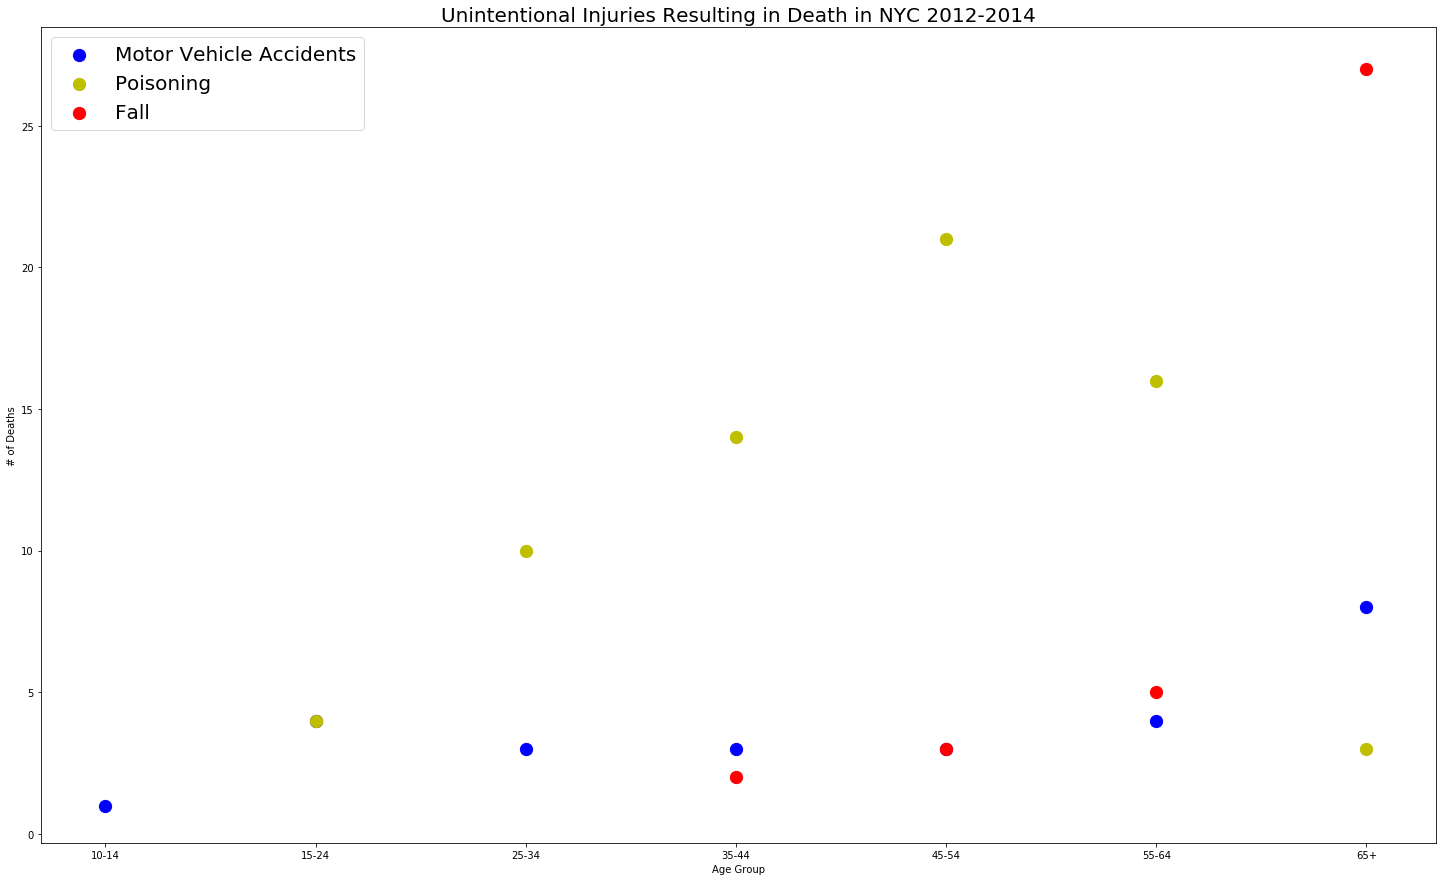

In [127]:
x = ui_deaths['Age Group']

d_mva = ui_deaths['Motor Vehicle Accident']
d_p = ui_deaths['Poisoning']
d_f = ui_deaths['Fall']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Age Group')
plt.title('Unintentional Injuries Resulting in Death in NYC 2012-2014', fontsize=20)

plt.scatter(x, d_mva, s=150, label = 'Motor Vehicle Accidents', color = 'b')
plt.scatter(x, d_p, s=150, label = 'Poisoning', color = 'y')
plt.scatter(x, d_f, s=150, label = 'Fall', color = 'r')
plt.legend(loc='upper left', prop={'size': 20})

Graphing Unintentional Injuries Resulting in Hospitalization in NYC 2012-2014

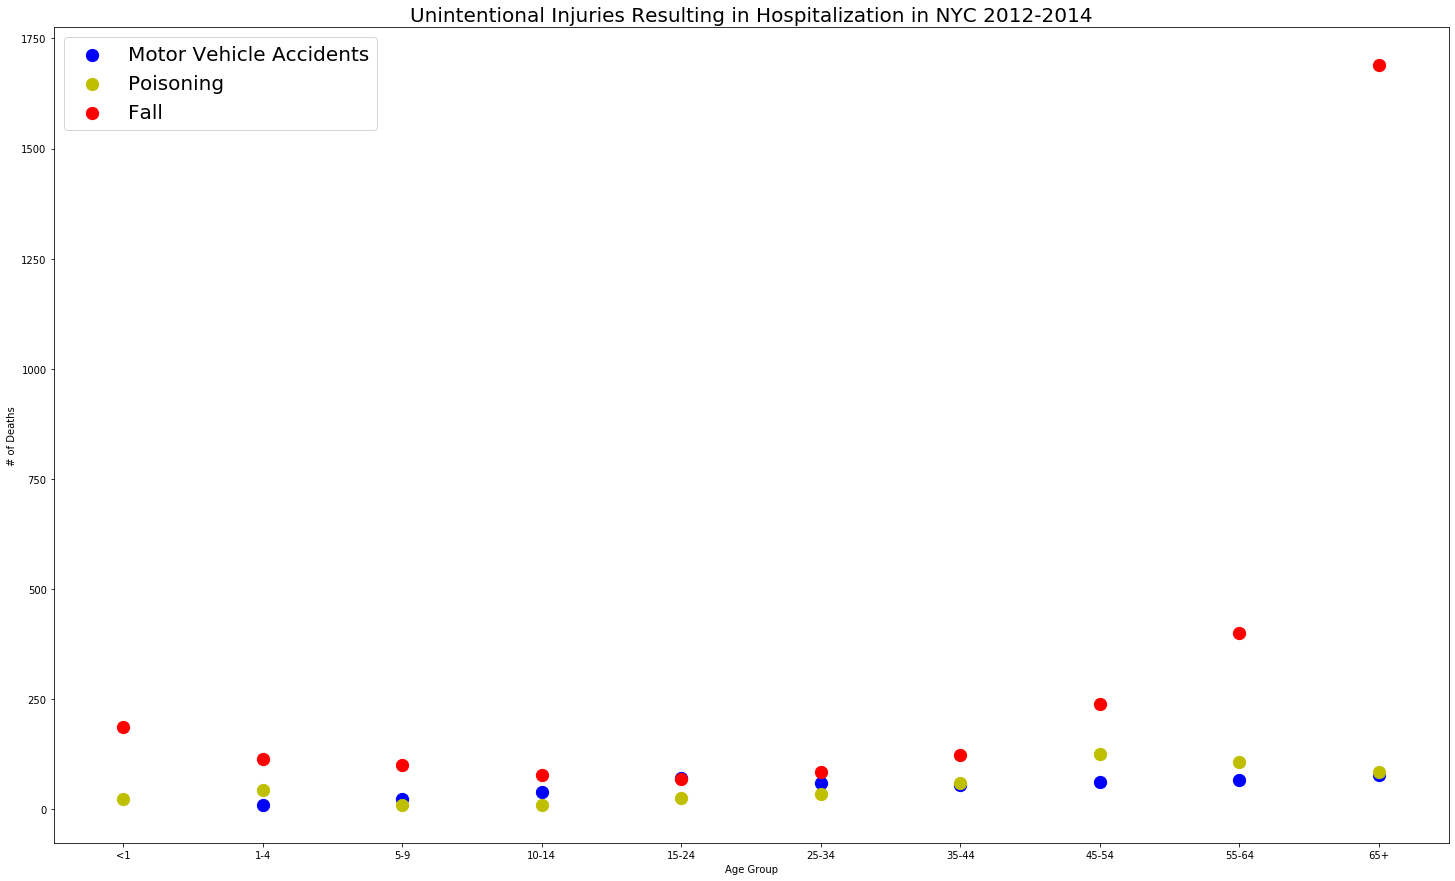

In [128]:
x = ui_hos['Age Group']

h_mva = ui_hos['Motor Vehicle Accident']
h_p = ui_hos['Poisoning']
h_f = ui_hos['Fall']

plt.figure(figsize=(25,15))
plt.ylabel('# of Deaths')
plt.xlabel('Age Group')
plt.title('Unintentional Injuries Resulting in Hospitalization in NYC 2012-2014', fontsize=20)

plt.scatter(x, h_mva, s=150, label = 'Motor Vehicle Accidents', color = 'b')
plt.scatter(x, h_p, s=150, label = 'Poisoning', color = 'y')
plt.scatter(x, h_f, s=150, label = 'Fall', color = 'r')
plt.legend(loc='upper left', prop={'size': 20})
plt.legend(fontsize=20)

In [129]:
mva_drate = round(((d_mva.sum())/(h_mva.sum()))*100,2)
p_drate = round(((d_p.sum())/(h_p.sum()))*100,2)
f_drate = round(((d_f.sum())/(h_f.sum()))*100,2)

In [130]:
print('These are the death rates for these hospitalized unintentional injuries from these 2 datasets in NYC for 2012-2014:')
print('Motor Vehicle Accidents:', str(mva_drate))
print('Poisoning:', str(p_drate))
print('Fall:', str(f_drate))

These are the death rates for these hospitalized unintentional injuries from these 2 datasets in NYC for 2012-2014:
Motor Vehicle Accidents: 5.59
Poisoning: 12.9
Fall: 1.2


In [131]:
m_both = m_both.loc[m_both['Year'] >=2012]
us_m = m_both['Age Specific Rate'].mean()

p_both = p_both.loc[p_both['Year'] >=2012]
us_p = p_both['Age Specific Rate'].mean()

fa_both = fa_both.loc[fa_both['Year'] >=2012]
us_fa = fa_both['Age Specific Rate'].mean()

In [132]:
print('These are the death rates for these unintentional injuries in the US for 2012-2014:')
print('Motor Vehicle Accidents:', str(round(us_m, 2)))
print('Poisoning:', str(round(us_p, 2)))
print('Fall:', str(round(us_fa, 2)))

These are the death rates for these unintentional injuries in the US for 2012-2014:
Motor Vehicle Accidents: 10.8
Poisoning: 12.35
Fall: 0.16


As we can see from the analysis, NYC has a similar death rate for accidental poisoning. However, NYC has a 50% lower death rate from motor vehicle accidents compared to that of the US, while NYC has about a 7 times higher death rate due to falls compared to the US.

We can interpret this through the fact that NYC is a densely populated area. The lack of square footage means that buildings must grow vertically and that streets are narrow and filled with slow moving cars. Cars must move slowly as there are numerous pedestrians, bicyclists, and traffic lights, along with the 25 mph speed limit. This could be why NYC has a significantly lower death rate for motor vehicle accidents, because even though these accidents do occur, they are not as severe due to the slower speeds vehicles must travel at in the city.

Meanwhile, the higher rate for falls is also unsurprising. NYC requires far more walking, which increases the risk of people tripping and falling on uneven sidewalks or in the plentiful construction zones in the city. Additionally, buildings in NYC are notoriously tall, with many apartment buildings lacking elevators, so falling simply from stairs is highly likely as well.

Another factor to consider is the proximity in NYC. Unlike other areas of the US, NYC is always full of people, which means that if someone is injured there is a high chance that there are witnesses who can help get the victim help quickly. That quick action could mean life saving differences. 

If we look at New York State and compare its injury deaths with the US, we find that NY is actually the healthiest state in this aspect with the lowest deaths due to injury per 100,000 population. This could be attributed to several factors, such as having a low obesity rate and a high rate of primary care physicians. These factors would help explain NYC's situation as well. Because people walk frequently in New York, this could contribute to the lower obesity rates. Meanwhile, anyone in New York City could tell you about the neverending sound of sirens, and this is partially due to the numerous physicians found throughout the city.

Source: https://www.americashealthrankings.org/explore/annual/measure/injury_deaths/state/NY?edition-year=2019

## <a name="conclusion_deathrate"></a> 4. Conclusions on Death Rate Disparities between New York City and National Averages

After analyzing these three causes of death, we found that NYC's differences cannot be fully explained by the tests here. In the case of heart disease, we dismissed this as statistical variance as the data suggests this.

In regards to influenza & pneumonia death rates, New Yorkers are at a higher risk to die from the flu. We have seen a combination of the city's density, as well as the amount of hospitals and urgent care units predict as much. One thing the city can do is build urgent care units (as these were stronger predictors than hospitals) in neighborhoods or areas that are hit the hardest by the virus. The disparity of deaths from the flu in New York City compared to the rest of the country is significnat, and neccessary measures can be taken to lower these needless deaths.

Meanwhile for unintentional injuries, NYC is seen to have a varying rates compared to the national mean. This could be attributed to the unique characteristics of NYC, such as being densely populated in such a small area, making motor vehicle accidents less fatal while also making falls significantly more fatal. However, there would have to be much more research conducted to reach a conclusive result. 

## <a name="race_gender"></a> III. Effect of Race and Gender on Death Rates

In [133]:
# prepare data for visualization
# get number of deaths by cause and gender
nyc_gender = nyc.dropna().groupby(['Leading Cause','Year','Sex'],as_index=False)['Deaths'].sum()

#target years 2008 - 2014
nyc_gender = nyc_gender.loc[nyc_gender['Year']>2007]
nyc_gender

,Leading Cause,Year,Sex,Deaths
1,Alzheimer's disease,2008,F,151.0
2,Alzheimer's disease,2009,F,354.0
3,Alzheimer's disease,2010,F,406.0
4,Alzheimer's disease,2011,F,435.0
5,Alzheimer's disease,2012,F,463.0
...,...,...,...,...
140,Unintentional injuries,2012,M,701.0
141,Unintentional injuries,2013,F,261.0
142,Unintentional injuries,2013,M,687.0
143,Unintentional injuries,2014,F,281.0


In [134]:
idx = nyc_pop_00_10.loc[nyc_pop_00_10["NAME"] == "New York city"].index[0]

# map years to population
nyc_pop = {
    #2007: nyc_pop_00_10["POPESTIMATE2007"][idx],
    2008: nyc_pop_00_10["POPESTIMATE2008"][idx],
    2009: nyc_pop_00_10["POPESTIMATE2009"][idx],
    2010: nyc_pop_00_10["CENSUS2010POP"][idx],
    2011: int(nyc_pop_10_18["respop72011"][1]),
    2012: int(nyc_pop_10_18["respop72012"][1]),
    2013: int(nyc_pop_10_18["respop72013"][1]),
    2014: int(nyc_pop_10_18["respop72014"][1])
}

# get per 1000 quotient
quotient = nyc_pop;
for key in nyc_pop.keys():
    quotient[key] = nyc_pop[key]/1000
    
quotient

{2008: 8068.195,
 2009: 8131.574,
 2010: 8175.133,
 2011: 8272.963,
 2012: 8348.032,
 2013: 8398.739,
 2014: 8437.387}

In [135]:
# calculate deaths per 1000 people
per1000 = [];
for index, row in nyc_gender.iterrows():
    q = quotient.get(row['Year'])
    per1000.append(row['Deaths']/q)
nyc_gender['per1000'] = per1000

nyc_gender

,Leading Cause,Year,Sex,Deaths,per1000
1,Alzheimer's disease,2008,F,151.0,0.018715
2,Alzheimer's disease,2009,F,354.0,0.043534
3,Alzheimer's disease,2010,F,406.0,0.049663
4,Alzheimer's disease,2011,F,435.0,0.052581
5,Alzheimer's disease,2012,F,463.0,0.055462
...,...,...,...,...,...
140,Unintentional injuries,2012,M,701.0,0.083972
141,Unintentional injuries,2013,F,261.0,0.031076
142,Unintentional injuries,2013,M,687.0,0.081798
143,Unintentional injuries,2014,F,281.0,0.033304


### <a name="nyc_vis_gen"></a> 1.  NYC Visualization of Death by Gender

In [136]:
nyc_2014 = nyc_gender.loc[nyc_gender['Year']==2014,:].set_index('Leading Cause')

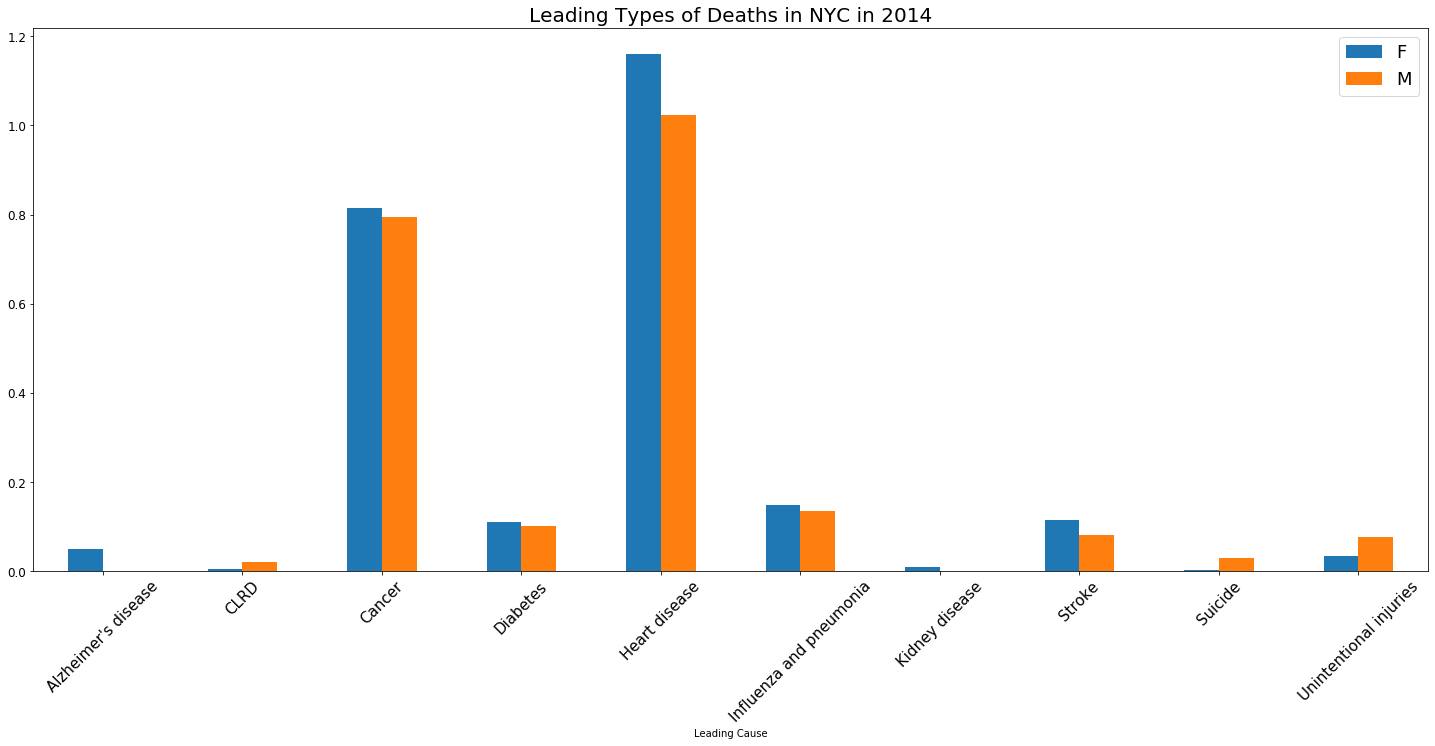

In [137]:
fig,ax = plt.subplots()
nyc_gender.pivot_table(values='per1000',index='Leading Cause',columns='Sex').plot.bar(ax=ax, figsize=(25,10))
ax.set_title("Leading Types of Deaths in NYC in 2014", size = 20)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=15, rotation=45)
ax.legend(prop=dict(size=18))

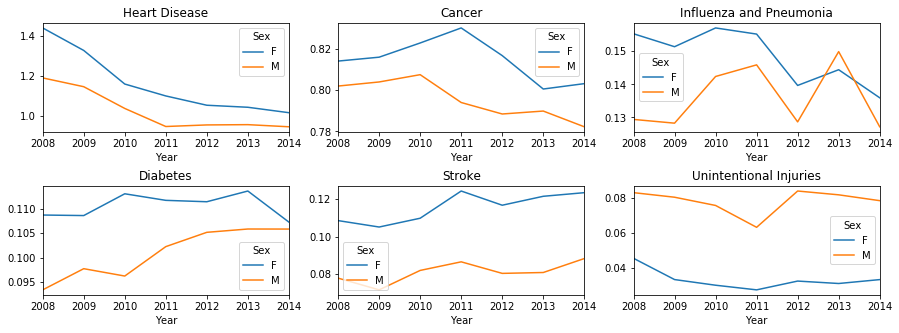

In [138]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
cause_gender = nyc_gender.pivot_table(values='per1000',index='Year',columns=['Leading Cause','Sex'])
cause_gender.plot(y='Heart disease', ax=ax[0][0], title='Heart Disease')
cause_gender.plot(y='Cancer', ax=ax[0][1], title='Cancer')
cause_gender.plot(y='Influenza and pneumonia', ax=ax[0][2], title='Influenza and Pneumonia')
cause_gender.plot(y='Diabetes', ax=ax[1][0], title='Diabetes')
cause_gender.plot(y='Stroke', ax=ax[1][1], title='Stroke')
cause_gender.plot(y='Unintentional injuries', ax=ax[1][2], title='Unintentional Injuries')

### <a name="nyc_race_dem"></a> 2. NYC Race Demographics

In [139]:
nyc['Race Ethnicity'].unique()

array(['Hispanic', 'White Non-Hispanic', 'Asian and Pacific Islander',
       'Other Race/ Ethnicity', 'Black Non-Hispanic',
       'Not Stated/Unknown'], dtype=object)

In [140]:
# nyc population dataset for 2010
nyc_pop = pd.read_excel('nyc_census.xlsx', encoding='latin-1').loc[pd.np.r_[121:123, 130:138]].drop(['Unnamed: 1','Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)
nyc_pop = nyc_pop.rename(columns={'DP-1 - New York City, New York: Profile of General Population and Housing Characteristics: 2010':'Subject: 2010','Unnamed: 2':'Population','Unnamed: 3':'Percent'})
nyc_pop = nyc_pop.astype({'Subject: 2010':str, 'Population':int, 'Percent':int})
nyc_pop

,Subject: 2010,Population,Percent
121,Total population,8175133,100
122,Hispanic or Latino,2336076,28
130,Not Hispanic or Latino,5839057,71
131,White alone,2722904,33
132,Black or African American alone,1861295,22
133,American Indian and Alaska Native alone,17427,0
134,Asian alone,1028119,12
135,Native Hawaiian and Other Pacific Island...,2795,0
136,Some Other Race alone,57841,0
137,Two or More Races,148676,1


In [141]:
nyc_pop_10 = {
    'Hispanic': nyc_pop.loc[122]['Population'],
    'White Non-Hispanic': nyc_pop.loc[131]['Population'],
    'Asian and Pacific Islander': nyc_pop.loc[134]['Population'] + nyc_pop.loc[135]['Population'],
    'Black Non-Hispanic': nyc_pop.loc[132]['Population'],
    'Other Race/ Ethnicity': nyc_pop.loc[133]['Population'] + nyc_pop.loc[136]['Population']
}

nyc_pop_10

{'Hispanic': 2336076,
 'White Non-Hispanic': 2722904,
 'Asian and Pacific Islander': 1030914,
 'Black Non-Hispanic': 1861295,
 'Other Race/ Ethnicity': 75268}

### <a name="nyc_vis_race"></a> 3. NYC Visualization by Race Ethnicity

In [142]:
nyc_race = nyc.dropna().groupby(['Leading Cause','Year','Race Ethnicity'],as_index=False)['Deaths'].sum()
nyc_race

,Leading Cause,Year,Race Ethnicity,Deaths
0,Alzheimer's disease,2007,Not Stated/Unknown,0.0
1,Alzheimer's disease,2007,White Non-Hispanic,107.0
2,Alzheimer's disease,2008,White Non-Hispanic,151.0
3,Alzheimer's disease,2009,Asian and Pacific Islander,14.0
4,Alzheimer's disease,2009,Black Non-Hispanic,79.0
...,...,...,...,...
380,Unintentional injuries,2014,Black Non-Hispanic,148.0
381,Unintentional injuries,2014,Hispanic,240.0
382,Unintentional injuries,2014,Not Stated/Unknown,0.0
383,Unintentional injuries,2014,Other Race/ Ethnicity,18.0


In [143]:
#remove Not Stated/Unknown
nyc_race = nyc_race.set_index('Race Ethnicity').drop(index='Not Stated/Unknown').reset_index()

In [144]:
nyc_race_2010 = nyc_race.loc[nyc_race['Year']==2010,:].set_index('Leading Cause')


ratio = []
for index, row in nyc_race_2010.iterrows():
    #population per 1000 quotient
    pop = nyc_pop_10.get(row['Race Ethnicity'])/1000
    ratio.append(row['Deaths']/pop)

nyc_race_2010['ratio'] = ratio

nyc_race_2010

,Race Ethnicity,Year,Deaths,ratio
Leading Cause,,,,
Alzheimer's disease,Black Non-Hispanic,2010,88.0,0.047279
Alzheimer's disease,Hispanic,2010,71.0,0.030393
Alzheimer's disease,White Non-Hispanic,2010,247.0,0.090712
CLRD,Asian and Pacific Islander,2010,18.0,0.017460
CLRD,Hispanic,2010,150.0,0.064210
CLRD,Other Race/ Ethnicity,2010,0.0,0.000000
Cancer,Asian and Pacific Islander,2010,940.0,0.911812
Cancer,Black Non-Hispanic,2010,3308.0,1.777257
Cancer,Hispanic,2010,2102.0,0.899799


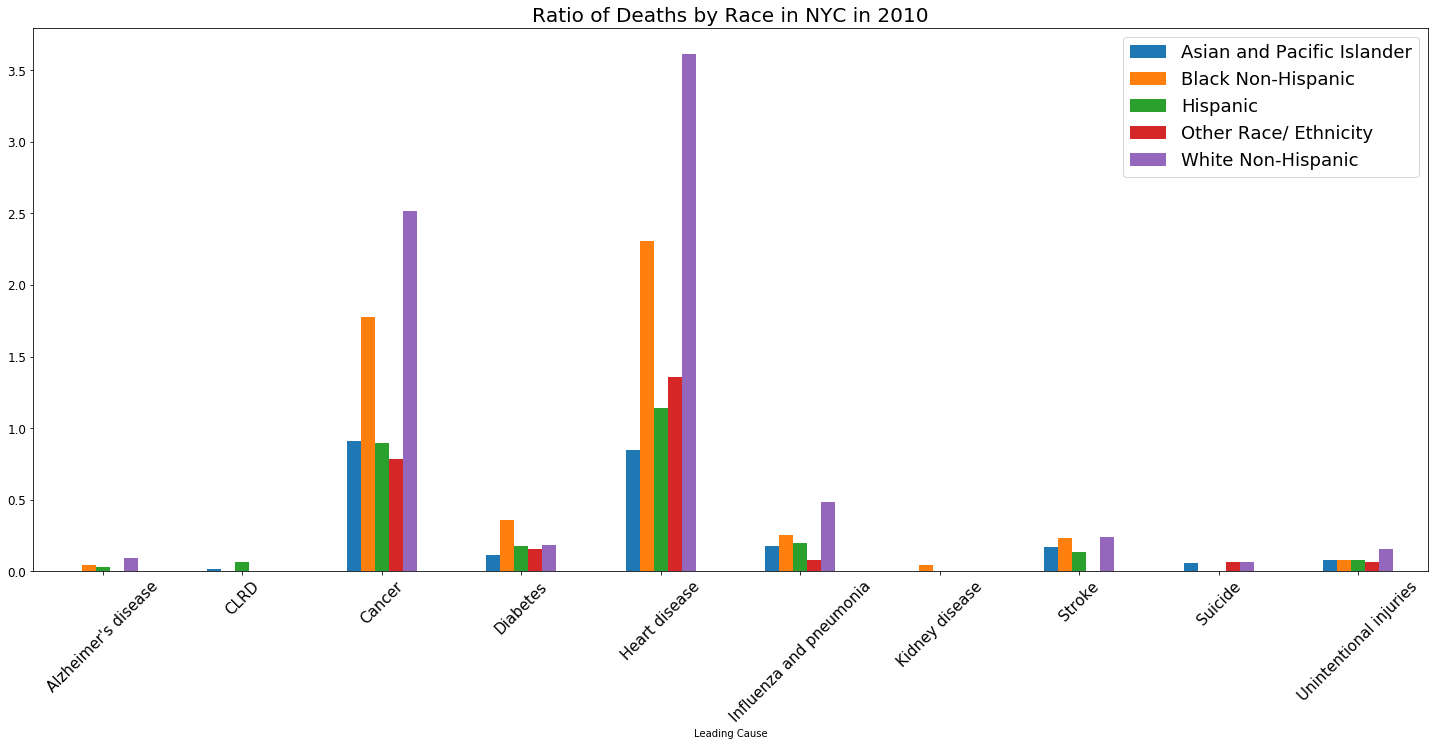

In [145]:
#plot
fig,ax = plt.subplots()
nyc_race_2010.pivot_table(values='ratio',index='Leading Cause',columns='Race Ethnicity').plot.bar(ax=ax, figsize=(25,10))
ax.set_title("Ratio of Deaths by Race in NYC in 2010", size = 20)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=15, rotation=45)
ax.legend(prop=dict(size=18))

### <a name="nusnyc_death_pop"></a> 4. US vs NYC Death to Population Ratio Comparison

In [146]:
city = nyc.dropna().groupby(['Leading Cause','Year'],as_index=False)['Deaths'].sum()
city = city.loc[city['Year']>2007]

ratio=[]
for index, row in city.iterrows():
    q = quotient.get(row['Year'])
    ratio.append(row['Deaths']/q)
    
city['ratio'] = ratio
    
city

,Leading Cause,Year,Deaths,ratio
1,Alzheimer's disease,2008,151.0,0.018715
2,Alzheimer's disease,2009,354.0,0.043534
3,Alzheimer's disease,2010,406.0,0.049663
4,Alzheimer's disease,2011,435.0,0.052581
5,Alzheimer's disease,2012,463.0,0.055462
...,...,...,...,...
75,Unintentional injuries,2010,865.0,0.105809
76,Unintentional injuries,2011,750.0,0.090657
77,Unintentional injuries,2012,972.0,0.116435
78,Unintentional injuries,2013,948.0,0.112874


In [147]:
# all deaths in the us by year and cuase
country = us.loc[~(us['Cause Name']=='All causes')].groupby(['Cause Name','Year'])[['Deaths']].sum()

# map years to population
us_pop = {
    #2007: nyc_pop_00_10["POPESTIMATE2007"][idx],
    2008: us_pop_00_10["TOT_POP"][98],
    2009: us_pop_00_10["TOT_POP"][110],
    2010: us_pop_10_19["CENSUS2010POP"][0],
    2011: us_pop_10_19["POPESTIMATE2011"][0],
    2012: us_pop_10_19["POPESTIMATE2012"][0],
    2013: us_pop_10_19["POPESTIMATE2013"][0],
    2014: us_pop_10_19["POPESTIMATE2014"][0]
}
 
# caluculate deaths to population ratio
ratio = [];
for index, row in country.reset_index().iterrows():
    q = us_pop.get(row['Year'])
    ratio.append(row['Deaths']/q)
country['ratio'] = ratio

country

Deaths     ratio
Cause Name             Year                    
Alzheimer's disease    2008  164870.0  0.000543
                       2009  158006.0  0.000515
                       2010  166988.0  0.000541
                       2011  169948.0  0.000545
                       2012  167274.0  0.000533
...                               ...       ...
Unintentional injuries 2010  241718.0  0.000783
                       2011  252876.0  0.000812
                       2012  255584.0  0.000814
                       2013  261114.0  0.000826
                       2014  271856.0  0.000854

[70 rows x 2 columns]

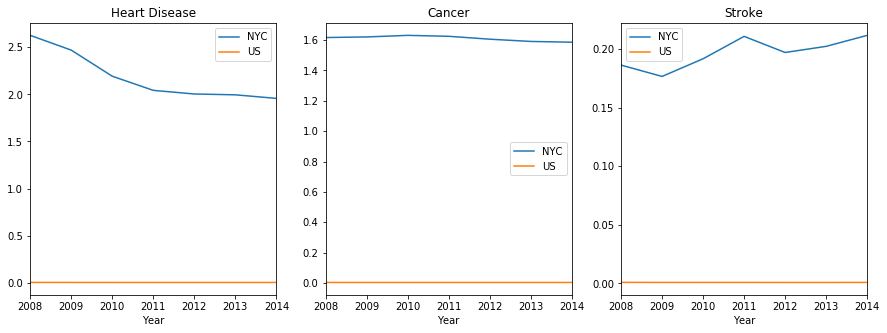

In [148]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
city_pt = city.pivot_table(values='ratio',index='Year',columns='Leading Cause')
country_pt = country.pivot_table(values='ratio',index='Year',columns='Cause Name')
city_pt.plot(y='Heart disease', ax=ax[0], title='Heart Disease')
country_pt.plot(y='Heart disease', ax=ax[0], title='Heart Disease')
ax[0].legend(["NYC","US"])
city_pt.plot(y='Cancer', ax=ax[1], title='Cancer')
country_pt.plot(y='Cancer', ax=ax[1], title='Cancer')
ax[1].legend(["NYC","US"])
city_pt.plot(y='Stroke', ax=ax[2], title='Stroke')
country_pt.plot(y='Stroke', ax=ax[2], title='Stroke')
ax[2].legend(["NYC","US"])

Note that while the US data appears to remain constant, it is not, the scale is just very close to zero.

### <a name="us_dem"></a> 5. US Demographics Dataset

data source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-detail.html

In [149]:
states = pd.read_csv('us_demographics.csv')
states.columns = states.iloc[0]
states = states.drop(columns=['Id'])[1:].loc[states['Year'].str.contains('July')]
states['Year'] = states['Year'].str[-4:].astype(int)
states

,Year,Sex,Hispanic Origin,Id2,Geography,Total,Race Alone - White,Race Alone - Black or African American,Race Alone - American Indian and Alaska Native,Race Alone - Asian,Race Alone - Native Hawaiian and Other Pacific Islander,Two or More Races
19,2010,Female,Hispanic,NaN,United States,25000565,22059599,1199204,705953,250719,85646,699444
20,2010,Female,Not Hispanic,NaN,United States,132248502,100322803,19897522,1150332,7744259,247821,2885765
21,2010,Female,Total,NaN,United States,157249067,122382402,21096726,1856285,7994978,333467,3585209
22,2010,Male,Hispanic,NaN,United States,25746906,22790195,1143433,777621,250028,92667,692962
23,2010,Male,Not Hispanic,NaN,United States,126330112,97063824,18116412,1118365,7017970,252068,2761473
...,...,...,...,...,...,...,...,...,...,...,...,...
5144,2018,Male,Not Hispanic,56,Wyoming,263944,245867,3985,6079,2662,201,5150
5145,2018,Male,Total,56,Wyoming,294534,272499,4492,8004,2897,302,6340
5146,2018,Both Sexes,Hispanic,56,Wyoming,58227,50690,959,3598,451,178,2351
5147,2018,Both Sexes,Not Hispanic,56,Wyoming,519510,484253,6598,12262,5762,394,10241


Text(0.5, 1.0, 'Total Number of deaths in the US')

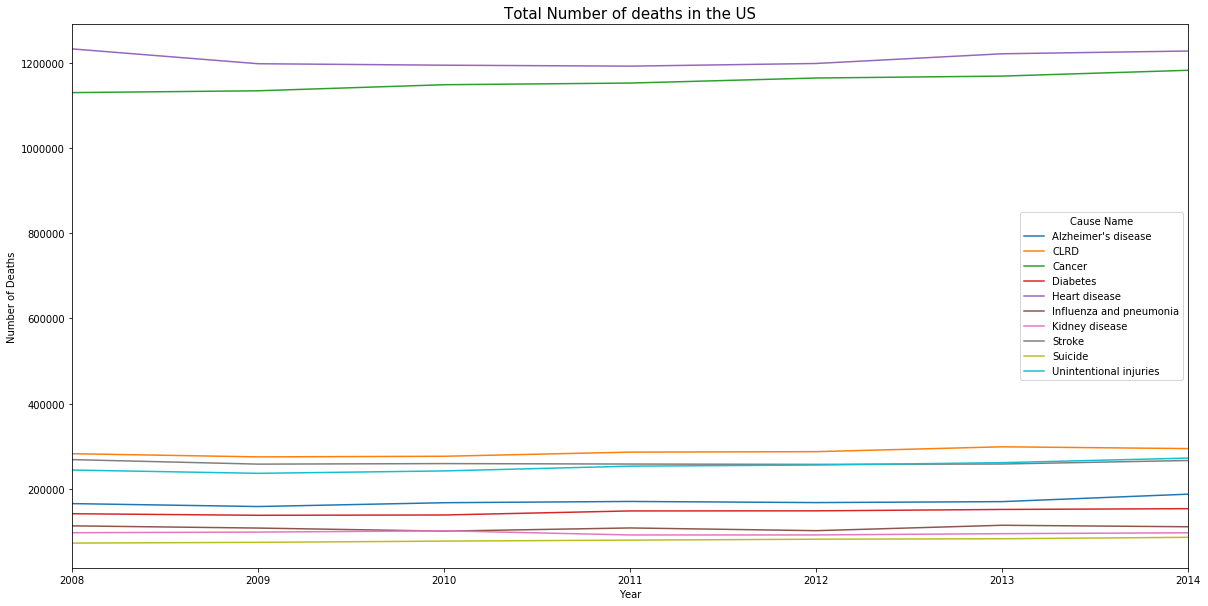

In [150]:
# plot us data
fig,ax = plt.subplots()
total_deaths = country.pivot_table(values='Deaths',index='Year',columns='Cause Name')
total_deaths.plot(ax=ax, figsize=(20,10))
ax.set_ylabel('Number of Deaths')
ax.set_title('Total Number of deaths in the US', size=15)

In [151]:
gb_states = states.groupby(['Year','Geography','Hispanic Origin'])['Total','Race Alone - White','Race Alone - Black or African American','Race Alone - American Indian and Alaska Native','Race Alone - Asian','Race Alone - Native Hawaiian and Other Pacific Islander','Two or More Races'].sum()
gb_states = gb_states.reset_index(['Hispanic Origin'])
gb_states


0              Hispanic Origin                  Total     Race Alone - White  \
Year Geography                                                                 
2010 Alabama          Hispanic      82417103789186206       6874486936155680   
     Alabama      Not Hispanic  238003422192084599242  163974115701043209845   
     Alabama             Total  246245123229974785448  170848516570403365525   
     Alaska           Hispanic        194602055940019        136381435627994   
     Alaska       Not Hispanic     322858351029673887     215621242341457962   
...                        ...                    ...                    ...   
2018 Wisconsin    Not Hispanic  272539926842145409613  237112323417714712894   
     Wisconsin           Total  292129528922735813568  254084525226815063526   
     Wyoming          Hispanic        276373059058227        240582663250690   
     Wyoming      Not Hispanic     255566263944519510     238386245867484253   
     Wyoming             Total     283203294534577737     262444272499534943   

0              Race Alone - Black or African American  \
Year Geography                                          
2010 Alabama                            6087686212949   
     Alabama                      6672015811211248322   
     Alabama                      6732885879831261271   
     Alaska                              117511442319   
     Alaska                            98501246222312   
...                                               ...   
2018 Wisconsin                     188609182300370909   
     Wisconsin                     197561191486389047   
     Wyoming                                452507959   
     Wyoming                             261339856598   
     Wyoming                             306544927557   

0              Race Alone - American Indian and Alaska Native  \
Year Geography                                                  
2010 Alabama                                     282639186744   
     Alabama                                  132721287026142   
     Alabama                                  160981678832886   
     Alaska                                      171519333648   
     Alaska                                  5105652008103064   
...                                                       ...   
2018 Wisconsin                                260352590251937   
     Wisconsin                                336363393567571   
     Wyoming                                     167319253598   
     Wyoming                                    6183607912262   
     Wyoming                                    7856800415860   

0              Race Alone - Asian  \
Year Geography                      
2010 Alabama           7069291635   
     Alabama      285422554854090   
     Alabama      292482647755725   
     Alaska            5226371159   
     Alaska       202871784238129   
...                           ...   
2018 Wisconsin   8897284099173071   
     Wisconsin   9046985678176147   
     Wyoming            216235451   
     Wyoming         310026625762   
     Wyoming         331628976213   

0              Race Alone - Native Hawaiian and Other Pacific Islander  \
Year Geography                                                           
2010 Alabama                                         125618873143        
     Alabama                                          97810442022        
     Alabama                                         223429315165        
     Alaska                                             207184391        
     Alaska                                          359137807371        
...                                                           ...        
2018 Wisconsin                                       101011202130        
     Wisconsin                                       153417093243        
     Wyoming                                             77101178        
     Wyoming                                            193201394        
 

In [152]:
state_pop = gb_states.loc[gb_states['Hispanic Origin']=='Total']['Total'].astype(float)
state_pop = state_pop.reset_index().rename(columns={'Total':'Total_pop'})
ratio = us.loc[us['Year']>2009].merge(state_pop.loc[state_pop['Year']<2015], left_on=['State','Year'], right_on=['Geography','Year'], how='inner')
ratio['Death_ratio'] = ratio['Deaths']/ratio['Total_pop']
ratio

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Geography,Total_pop,Death_ratio
0,2014,Unintentional injuries,Alabama,2463.0,49.3,Alabama,2.495006e+20,9.871719e-18
1,2014,All causes,Alabama,50215.0,909.1,Alabama,2.495006e+20,2.012620e-16
2,2014,Alzheimer's disease,Alabama,1885.0,35.3,Alabama,2.495006e+20,7.555091e-18
3,2014,Stroke,Alabama,2663.0,48.3,Alabama,2.495006e+20,1.067332e-17
4,2014,CLRD,Alabama,3050.0,53.6,Alabama,2.495006e+20,1.222442e-17
...,...,...,...,...,...,...,...,...
2855,2010,Heart disease,Wyoming,962.0,169.8,Wyoming,2.766993e+17,3.476699e-15
2856,2010,Influenza and pneumonia,Wyoming,109.0,19.5,Wyoming,2.766993e+17,3.939295e-16
2857,2010,Suicide,Wyoming,131.0,22.4,Wyoming,2.766993e+17,4.734382e-16
2858,2010,Cancer,Wyoming,1016.0,172.6,Wyoming,2.766993e+17,3.671856e-15


In [153]:
#ratio of white only population to overall population in each state
white_ratio = gb_states.loc[(gb_states['Hispanic Origin']=='Not Hispanic')]['Race Alone - White'].astype(float)/gb_states.loc[(gb_states['Hispanic Origin']=='Total')]['Total'].astype(float)
white_ratio = white_ratio.reset_index()

#add ratio to us death rate dataset
ratio = ratio.merge(white_ratio.loc[white_ratio['Year']<2015], on=['Geography','Year'], how='inner')
ratio = ratio.rename(columns={0 :'white_ratio'})
ratio = ratio.set_index('Cause Name').drop(index='All causes').reset_index()
ratio


,Cause Name,Year,State,Deaths,Age-adjusted Death Rate,Geography,Total_pop,Death_ratio,white_ratio
0,Unintentional injuries,2014,Alabama,2463.0,49.3,Alabama,2.495006e+20,9.871719e-18,0.656728
1,Alzheimer's disease,2014,Alabama,1885.0,35.3,Alabama,2.495006e+20,7.555091e-18,0.656728
2,Stroke,2014,Alabama,2663.0,48.3,Alabama,2.495006e+20,1.067332e-17,0.656728
3,CLRD,2014,Alabama,3050.0,53.6,Alabama,2.495006e+20,1.222442e-17,0.656728
4,Diabetes,2014,Alabama,1281.0,22.8,Alabama,2.495006e+20,5.134256e-18,0.656728
...,...,...,...,...,...,...,...,...,...
2595,Heart disease,2010,Wyoming,962.0,169.8,Wyoming,2.766993e+17,3.476699e-15,0.861546
2596,Influenza and pneumonia,2010,Wyoming,109.0,19.5,Wyoming,2.766993e+17,3.939295e-16,0.861546
2597,Suicide,2010,Wyoming,131.0,22.4,Wyoming,2.766993e+17,4.734382e-16,0.861546
2598,Cancer,2010,Wyoming,1016.0,172.6,Wyoming,2.766993e+17,3.671856e-15,0.861546


In [154]:
# ratio of hispanic only population to overall population in each state
his_ratio = gb_states.loc[(gb_states['Hispanic Origin']=='Hispanic')]['Total'].astype(float)/gb_states.loc[(gb_states['Hispanic Origin']=='Total')]['Total'].astype(float)
his_ratio = his_ratio.reset_index().rename(columns={'Total':'his_ratio'})
ratio = ratio.merge(his_ratio.loc[his_ratio['Year']<2015], on=['Geography','Year'], how='inner')

In [155]:
#ratio of Black or African American population to overall population in each state
black_ratio = (gb_states.loc[(gb_states['Hispanic Origin']=='Not Hispanic')]['Race Alone - Black or African American'].astype(float)/gb_states.loc[(gb_states['Hispanic Origin']=='Total')]['Total'].astype(float)).reset_index()
black_ratio = black_ratio.rename(columns={0 :'black_ratio'})
ratio = ratio.merge(black_ratio.loc[black_ratio['Year']<2015], on=['Geography','Year'], how='inner')

#ratio of Asian and pacific islander population to overall population in each state
asian_ratio = (gb_states.loc[gb_states['Hispanic Origin']=='Not Hispanic']['Race Alone - Asian'].astype(float)/gb_states.loc[(gb_states['Hispanic Origin']=='Total')]['Total'].astype(float)).reset_index()
asian_ratio = asian_ratio.rename(columns={0 :'asian_ratio'})
ratio = ratio.merge(asian_ratio.loc[asian_ratio['Year']<2015], on=['Geography','Year'], how='inner')

#without United States
ratio = ratio.loc[~(ratio['Geography']=='United States')]
ratio

,Cause Name,Year,State,Deaths,Age-adjusted Death Rate,Geography,Total_pop,Death_ratio,white_ratio,his_ratio,black_ratio,asian_ratio
0,Unintentional injuries,2014,Alabama,2463.0,49.3,Alabama,2.495006e+20,9.871719e-18,0.656728,0.000363,2.733719e-02,1.361091e-06
1,Alzheimer's disease,2014,Alabama,1885.0,35.3,Alabama,2.495006e+20,7.555091e-18,0.656728,0.000363,2.733719e-02,1.361091e-06
2,Stroke,2014,Alabama,2663.0,48.3,Alabama,2.495006e+20,1.067332e-17,0.656728,0.000363,2.733719e-02,1.361091e-06
3,CLRD,2014,Alabama,3050.0,53.6,Alabama,2.495006e+20,1.222442e-17,0.656728,0.000363,2.733719e-02,1.361091e-06
4,Diabetes,2014,Alabama,1281.0,22.8,Alabama,2.495006e+20,5.134256e-18,0.656728,0.000363,2.733719e-02,1.361091e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Heart disease,2010,Wyoming,962.0,169.8,Wyoming,2.766993e+17,3.476699e-15,0.861546,0.000867,6.271322e-07,8.963492e-07
2596,Influenza and pneumonia,2010,Wyoming,109.0,19.5,Wyoming,2.766993e+17,3.939295e-16,0.861546,0.000867,6.271322e-07,8.963492e-07
2597,Suicide,2010,Wyoming,131.0,22.4,Wyoming,2.766993e+17,4.734382e-16,0.861546,0.000867,6.271322e-07,8.963492e-07
2598,Cancer,2010,Wyoming,1016.0,172.6,Wyoming,2.766993e+17,3.671856e-15,0.861546,0.000867,6.271322e-07,8.963492e-07


In [156]:
ratio_2010 = ratio.loc[ratio['Year']==2010]
print(ratio_2010['Death_ratio'].min(),ratio_2010['Death_ratio'].max())

1.657586146147e-20 4.382618897551117e-15


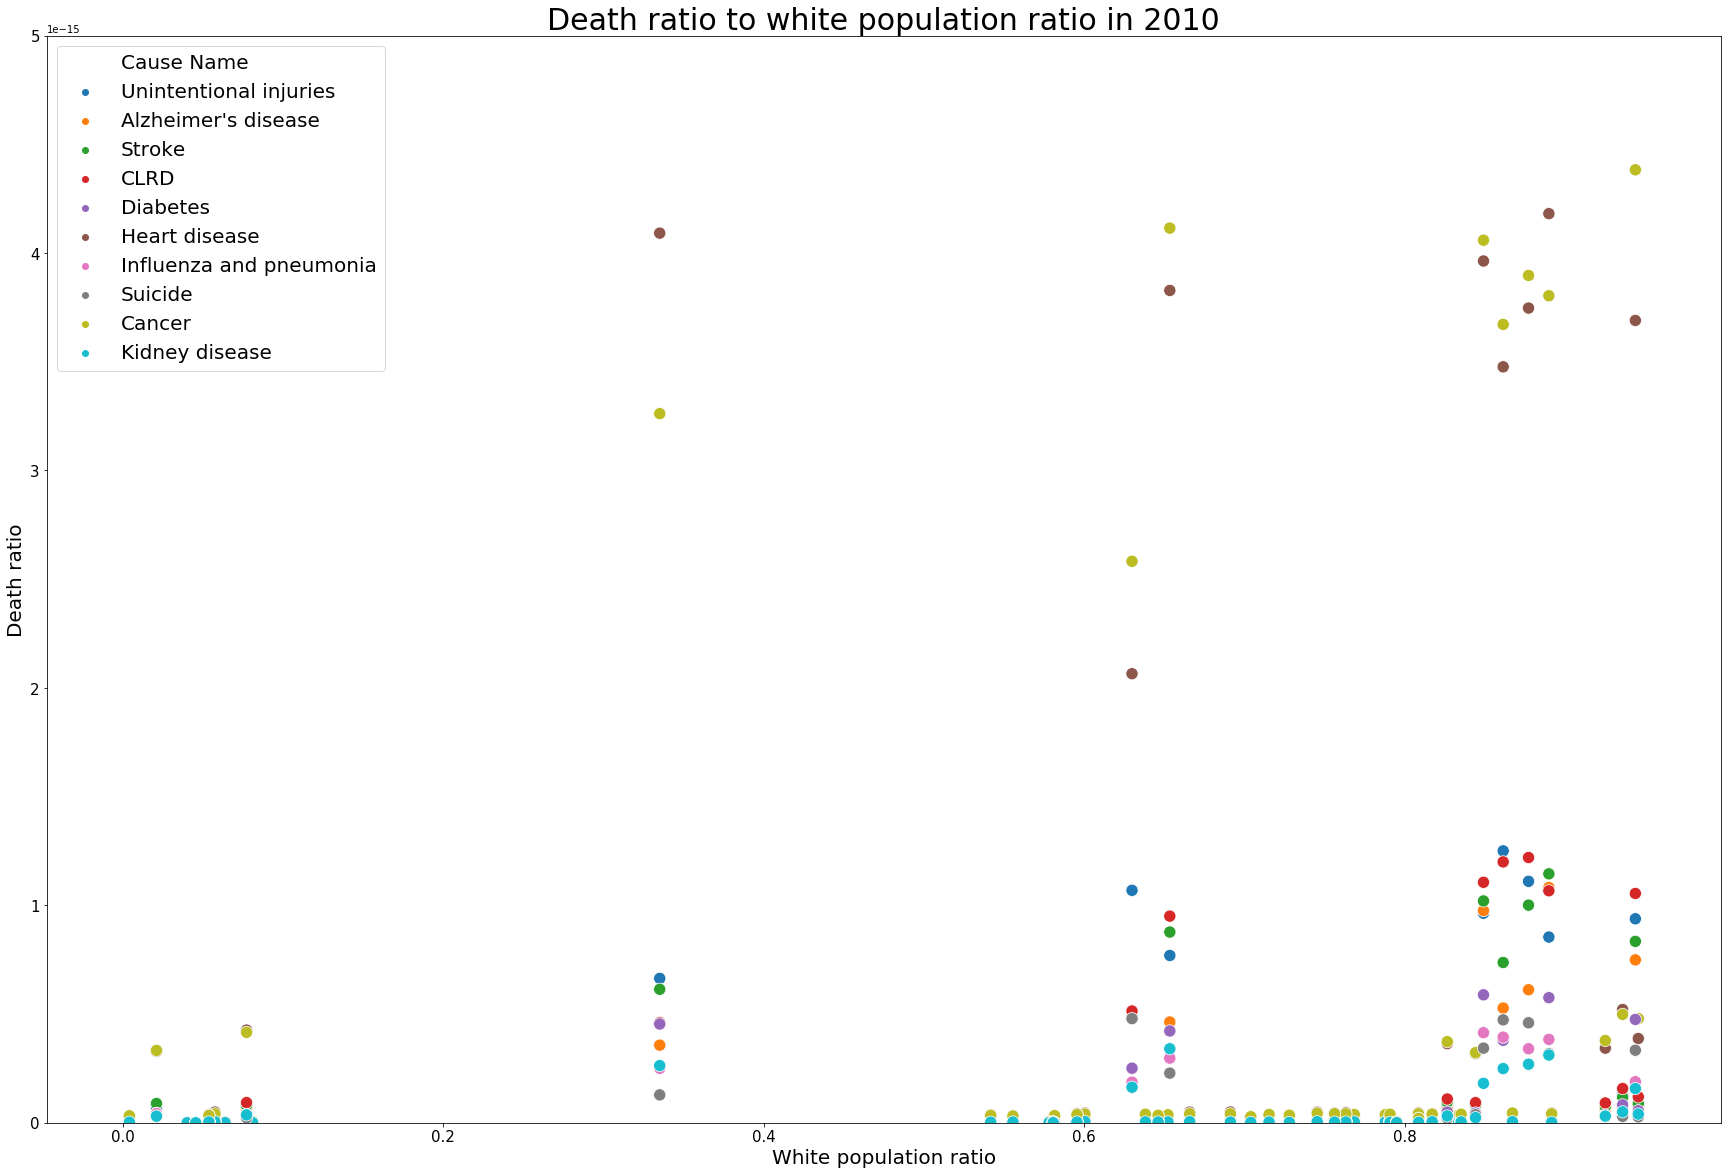

In [157]:
#plot
figure, ax = plt.subplots(figsize=(30,20))
sb.scatterplot(x='white_ratio',y='Death_ratio',data=ratio_2010, hue='Cause Name', s=150, ax=ax)

ax.tick_params(labelsize=15)
ax.set_xlabel('White population ratio',size=20)
ax.set_ylabel('Death ratio',size=20)
ax.set_title("Death ratio to white population ratio in 2010", size = 30)
ax.legend(prop={'size':20})

#set y limits based on max and min
ax.set_ylim(0,5e-15)

plt.show()

In [158]:
reg = smf.ols("Death_ratio ~ white_ratio + black_ratio + his_ratio + asian_ratio", data = ratio).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Death_ratio   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 13 May 2020   Prob (F-statistic):           2.22e-25
Time:                        20:05:08   Log-Likelihood:                 85663.
No. Observations:                2550   AIC:                        -1.713e+05
Df Residuals:                    2545   BIC:                        -1.713e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.765e-17    3.1e-17     -1.536      

(0, 5e-15)

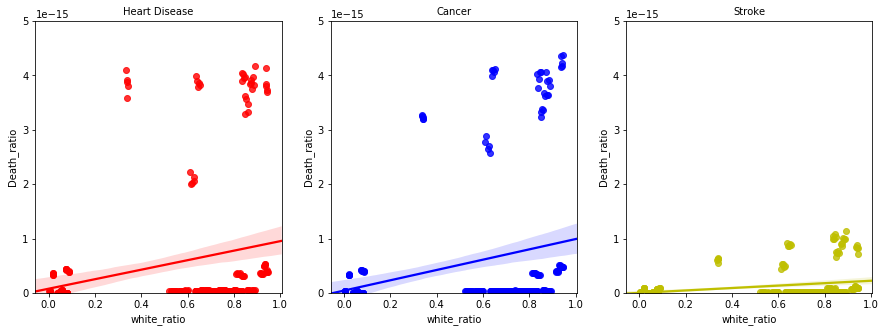

In [159]:
heart_d = ratio.loc[ratio['Cause Name']=='Heart disease']
cancer = ratio.loc[ratio['Cause Name']=='Cancer']
stroke = ratio.loc[ratio['Cause Name']=='Stroke']


#plot
fig,ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

sb.regplot(x="white_ratio", y="Death_ratio", data=heart_d, ax=ax[0],color='r')

sb.regplot(x="white_ratio", y="Death_ratio", data=cancer, ax=ax[1],color='b')

sb.regplot(x="white_ratio", y="Death_ratio", data=stroke, ax=ax[2],color='y')

ax[0].set_title("Heart Disease", size = 10)
ax[1].set_title("Cancer", size = 10)
ax[2].set_title("Stroke", size = 10)

#set y limits based on max and min
ax[0].set_ylim(0,5e-15)
ax[1].set_ylim(0,5e-15)
ax[2].set_ylim(0,5e-15)

Based on the regression and plots, we can see that population ratio of race does not have a lot of explanatory power in the cause of deaths in the US. R squared is only 0.047 and the p values for his_ratio and asian_ratio shows that they are not significant. From the scatter plots, we can see that for heart disease, cancer, and stroke, the regression line does not really go through the points and they have a pretty similar pattern. This may be a result of same states following the same pattern for different causes of death.

##  <a name="final_con"></a> IV. Conclusion

The goal of this project was to analyze the disparity between different causes of death in New York City and the rest of the country. What we discovered was the variables we found thought provoking and promising in terms of statistical significance did not paint the whole picture. If we had more time and resources, we could have investigated further into other variables that may provide a deeper explanation to the effects that we visualized. Overall, our analysis has brought us a deeper understanding of the causes of death in New York City and the rest of the country, the variables that do and do not effect them, and an idea of how further research can benefit society. Results from further research could potentially help local and federal government agencies, as well as private businesses, do a better job to create a more healthy and prepared country.